
# HR Analytics - Attrition Prediction

## Table of Content

1. [Problem Statement](#section1)<br>
2. [HR Dataset and its attributes](#section3)<br>
3. [HR Dataset (source, loading and description)](#section3)<br>
4. [Data Visualization](#section4)<br>
5. [Data Standardization](#section5)<br>
6. [Modelling and prediction](#section7)<br>
7. [Summary and Conclusion](#section7)<br>

<a id=section1></a>

## 1. Problem Statement

###My client is a large MNC and they have 9 broad verticals across the organisation. One of the problem my client is facing is around identifying the people who are at risk of "atrrition". 
#### Hence,the company needs a help in identifying the probable candidates at a particular checkpoint so that they can take preventive measures to mitigate the "attrition risk".


## 2. HR Dataset and its attributes

- The dataset comprises of 1470 observations with 35 columns.The data provided has no missing values.  Below is a table showing names of all the columns and their description.

| Column Name              | Description                                                                                   |
| -------------            |:-------------  
| Age                      | Age  Details
| Attrition                | Attrition  Details
| BusinessTravel           | BusinessTravel  Details
| DailyRate                | DailyRate  Details
| Department               | Department Details
| DistanceFromHome         | DistanceFromHome  Details
| Education                | Education  Details
| EducationField           | EducationField  Details
| EmployeeCount            | EmployeeCount Details
| EmployeeNumber           | EmployeeNumber  Details
| EnvironmentSatisfaction  | EnvironmentSatisfaction  Details
| Gender                   | Gender  Details
| HourlyRate               | HourlyRate Details
| JobInvolvement           | JobInvolvement  Details
| JobLevel                 | JobLevel  Details
| JobRole                  | JobRole  Details
| JobSatisfaction          | JobSatisfaction Details
| MaritalStatus            | MaritalStatus  Details
| MonthlyIncome            | MonthlyIncome  Details
| MonthlyRate              | MonthlyRate  Details
| NumCompaniesWorked       | NumCompaniesWorked Details
| Over18                   | Over18  Details
| OverTime                 | OverTime  Details
| PercentSalaryHike        | PercentSalaryHike  Details
| PerformanceRating        | PerformanceRating Details
| RelationshipSatisfaction | RelationshipSatisfaction  Details
| StandardHours            | StandardHours  Details
| StockOptionLevel         | StockOptionLevel Details
| TotalWorkingYears        | TotalWorkingYears  Details
| TrainingTimesLastYear    | TrainingTimesLastYear  Details
| WorkLifeBalance          | WorkLifeBalance Details
| YearsAtCompany           | YearsAtCompany  Details
| YearsInCurrentRole       | YearsInCurrentRole  Details
| YearsSinceLastPromotion  | YearsSinceLastPromotion Details
| YearsWithCurrManager     | YearsWithCurrManager Details


## 3. Dataset (Source, loading and description)


### Install & Import standard packages 

#### Installing TPOT, SHAP and ELI5

In [1]:
#Installing TPOT
!pip install tpot

     |████████████████████████████████| 81kB 9.2MB/s 
     |████████████████████████████████| 153kB 24.0MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11955 sha256=283e07cb5b189adcae4c1f2bd7c60527ec3e8ad19e0c80d050192d0ab43a3def
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [6]:
#Installing SHAP
!pip install shap

     |████████████████████████████████| 245kB 9.5MB/s 
  Created wheel for shap: filename=shap-0.30.2-cp36-cp36m-linux_x86_64.whl size=360637 sha256=b71a5fccbda7594890a798d8c842f3e7e7a7c54394d534cc7dc6215c7a3e5be0
  Stored in directory: /root/.cache/pip/wheels/97/46/c9/b9dc708249af7eaf0951b2be62e0f6191f4de385a48e1a4cb7
Successfully built shap


In [3]:
!pip install eli5

     |████████████████████████████████| 112kB 9.7MB/s 


In [2]:
!pip install category_encoders

     |████████████████████████████████| 102kB 9.0MB/s 


#### Import Standard Libraries

In [0]:
import pandas                 as pd             # For data manipulation and analysis
import pandas_profiling
import numpy                  as np              # Implemennts milti-dimensional array and matrices
import seaborn                as sns           # Provides a high level interface for drawing attractive and informative statistical graphics
import matplotlib.pyplot      as plt # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import matplotlib.gridspec    as gridspec
import os                     as osObj
import time
import category_encoders      as catencoders
from datetime                 import datetime

from sklearn                  import metrics
from subprocess               import check_output
%matplotlib inline              
# allow plots to appear directly in the notebook
#MLA
from sklearn.preprocessing   import LabelEncoder
from pylab                   import rcParams
from sklearn.metrics         import accuracy_score, precision_score, recall_score,f1_score,roc_auc_score,roc_curve
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import multilabel_confusion_matrix
from sklearn.model_selection import train_test_split

#Perform Cross Validation for DTRee, Random Forrest, Logistic and KNN
from sklearn.tree            import DecisionTreeClassifier    #D.Tree
from sklearn.ensemble        import RandomForestClassifier    #Forest
from sklearn.linear_model    import LogisticRegression        #Logistic Regression
from sklearn.linear_model    import LogisticRegressionCV      #Logistic Regression CV
from sklearn.neighbors       import KNeighborsClassifier      #KNN 
from sklearn                 import svm, datasets             #SVM 
from sklearn.svm             import SVR                       #SVR (Regression)
from sklearn.svm             import SVC                       #SVC (Classification)
from sklearn.svm             import SVC
from sklearn.svm             import NuSVC
from sklearn.svm             import LinearSVC

from xgboost.sklearn         import XGBClassifier

from sklearn.naive_bayes     import BernoulliNB
from sklearn.naive_bayes     import GaussianNB

from sklearn.tree            import ExtraTreeClassifier

from sklearn.ensemble        import AdaBoostClassifier
from sklearn.ensemble        import BaggingClassifier
from sklearn.ensemble        import ExtraTreesClassifier
from sklearn.ensemble        import GradientBoostingClassifier

from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.linear_model    import PassiveAggressiveClassifier
from sklearn.linear_model    import RidgeClassifierCV
from sklearn.linear_model    import SGDClassifier
from sklearn.linear_model    import Perceptron

from sklearn.model_selection import KFold                 #for K-fold cross validation
from sklearn.model_selection import cross_val_score       #score evaluation
from sklearn.model_selection import cross_val_predict     #prediction
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling  import SMOTE
from sklearn.decomposition   import PCA
from sklearn.cluster         import KMeans
from sklearn.preprocessing   import LabelEncoder
from sklearn.preprocessing   import StandardScaler
from sklearn.preprocessing   import MinMaxScaler
from sklearn.mixture         import GaussianMixture #For GMM clustering
from scipy.stats             import boxcox
from scipy                   import stats

#eli5 to check feature importance
import eli5
from eli5.sklearn            import PermutationImportance
import shap

#for TPOT
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from tpot                          import TPOTClassifier
from sklearn.pipeline              import make_pipeline, make_union
from tpot.builtins                 import OneHotEncoder, StackingEstimator, ZeroCount
from sklearn.preprocessing         import FunctionTransformer,PolynomialFeatures,RobustScaler
from copy                          import copy
from sklearn.kernel_approximation  import Nystroem
from sklearn.feature_selection     import SelectPercentile, f_classif


import warnings
warnings.filterwarnings('ignore')

### Define Custom Functions

<a id=section501></a>
#### User defined function to split the dataset into train and test

In [0]:
def split_data(cc, drop_list, testsize=0.2):
    #First drop the columns given in droplist
    cc = cc.drop(drop_list,axis=1)
    print("Columns Used for Prediction:", cc.columns)

    #test train split time
    from sklearn.model_selection import train_test_split
    y = cc[target].values               #target
    X = cc.drop([target],axis=1).values #features
    data_train, data_test, label_train, label_test = train_test_split(X, y, test_size=testsize, random_state=42, stratify=y)

    print("train-set size          : ", (data_train.shape),
          "\ntest-set size           : ", (data_test.shape))
    print(target, " cases in test-set : ", sum(label_test))
    return data_train, data_test, label_train, label_test

<a id=section502></a>
#### User defined function to fit and predict the model

In [0]:
def get_predictions(clf, data_train, label_train, data_test, PrintTrainScore=False,avg=None):
  
    print("*"*40, str(clf)[0:str(clf).find('(', 0)],"*"*40)
    # fit it to training data
    clf.fit(data_train, label_train)

    # predict using test data
    y_pred      = clf.predict(data_test)
    
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(data_test)
    
    #for fun: train-set predictions
    train_pred      = clf.predict(data_train)
    train_pred_prob = clf.predict_proba(data_train)

    print('train-set confusion matrix:\n', confusion_matrix(label_train,train_pred)) 
    if PrintTrainScore : print_scores(label_train,train_pred,train_pred_prob,False,avg)
    return y_pred, y_pred_prob

<a id=section503></a>
#### User defined function to print the classifier score

In [0]:
def print_scores(label_test,y_pred, y_pred_prob, PrintConfusionMatrix=True, avg=None):
    if PrintConfusionMatrix : print('test-set confusion matrix :\n', confusion_matrix(label_test,y_pred)) 
    if type(avg)!=type(None) : print("recall score    : ", recall_score(label_test,y_pred,average=avg))
    else : print("recall score    : ", recall_score(label_test,y_pred))
    if type(avg)!=type(None) : print("precision score : ", precision_score(label_test,y_pred,average=avg))
    else : print("precision score : ", precision_score(label_test,y_pred))
    if type(avg)!=type(None) : print("f1 score        : ", f1_score(label_test,y_pred,average=avg))
    else : print("f1 score        : ", f1_score(label_test,y_pred))
    print("accuracy score  : ", accuracy_score(label_test,y_pred))
    print("ROC AUC         :  {}".format(roc_auc_score(label_test, y_pred_prob[:,1])))
    print("*"*90)

#### User defined function to print all key metrics - accuracy, precision, recall and f1.

In [0]:
def PrintMetrics(ModelName, label_test,y_preds,avg=None):
  #averag can have one of these [None, 'micro', 'macro', 'weighted', 'samples']
  #Check the accuracy and precision and see the confusion matrix
  
  log_accuracy = accuracy_score(label_test,y_preds)
  print('Accuracy  score for the ',ModelName,' model :', log_accuracy)

  if type(avg)!=type(None) : log_accuracy = precision_score(label_test,y_preds)
  else : log_accuracy = precision_score(label_test,y_preds,average=avg)
  print('Precision score for the ',ModelName,' model :', log_accuracy)

  if type(avg)!=type(None) : log_accuracy = recall_score(label_test,y_preds)
  else : log_accuracy = recall_score(label_test,y_preds,average=avg)
  print('Recall    score for the ',ModelName,' model :', log_accuracy)

  if type(avg)!=type(None) : log_accuracy = f1_score(label_test,y_preds)
  else : log_accuracy = f1_score(label_test,y_preds,average=avg)
  print('F1        score for the ',ModelName,' model :', log_accuracy)

#### User defined function to print the confusion matrix

In [0]:
def PrintConfusionMatrix(label_test,y_preds):
  #Model evaluation using confustion matrix
  confusion_matrix_ret = pd.DataFrame(confusion_matrix(label_test, y_preds))

  #get the target data and initialise the list to store index and colname
  target_data          = np.unique(data1_y_bin)
  indexName            = list()
  colName              = list()
  for target_no in target_data:
    indexName.append('Act ' + str(target_no))
    colName.append('Pred ' + str(target_no))

  #print(indexName)
  confusion_matrix_ret.index = indexName
  confusion_matrix_ret.columns = colName
  print(confusion_matrix_ret)

#### User defined function to store the Model Evaluation Metrics in a dataframe

In [0]:
def Print_ModelEvaluation_Metrics( ModelName, Y_train, Y_test, Ypredict_train,  Ypredict_test, X_train, X_test,Parameters="",PrintScores=False):

  #Check the accuracy and precision and see the confusion matrix
  log_accuracy_score_train = accuracy_score(Y_train, Ypredict_train)
  if PrintScores == True: print('Accuracy Train score for the ',ModelName,' model :', log_accuracy_score_train)
  log_accuracy_score_test  = accuracy_score(Y_test, Ypredict_test)
  if PrintScores == True: print('Accuracy Test  score for the ',ModelName,' model :', log_accuracy_score_test)

  if PrintScores == True: print("*"*90)
  # log_precision_score_train = precision_score(Y_train, Ypredict_train,average='weighted')
  log_precision_score_train = precision_score(Y_train, Ypredict_train)
  if PrintScores == True: print('Precision Train score for the ',ModelName,' model :', log_precision_score_train)
  # log_precision_score_test = precision_score(Y_test, Ypredict_test,average='weighted')
  log_precision_score_test = precision_score(Y_test, Ypredict_test)
  if PrintScores == True: print('Precision Test  score for the ',ModelName,' model :', log_precision_score_test)

  if PrintScores == True: print("*"*90)
  # log_recall_score_train = recall_score(Y_train, Ypredict_train,average='weighted')
  log_recall_score_train = recall_score(Y_train, Ypredict_train)
  if PrintScores == True: print('Recall Train score for the ',ModelName,' model :', log_recall_score_train)
  # log_recall_score_test = recall_score(Y_test, Ypredict_test,average='weighted')
  log_recall_score_test = recall_score(Y_test, Ypredict_test)
  if PrintScores == True: print('Recall Test  score for the ',ModelName,' model :', log_recall_score_test)
  
  if PrintScores == True: print("*"*90)
  # f1_score_train = f1_score(Y_train, Ypredict_train,average='weighted')
  f1_score_train = f1_score(Y_train, Ypredict_train)
  if PrintScores == True: print('F1 Train score for the ',ModelName,' model :', f1_score_train)
  # f1_score_test = f1_score(Y_test, Ypredict_test,average='weighted')
  f1_score_test = f1_score(Y_test, Ypredict_test)
  if PrintScores == True: print('F1 Test  score for the ',ModelName,' model :', f1_score_test)
  
  df_model = pd.DataFrame({
    'Model Name'      : [ModelName],
    'Parameters'      : [Parameters],
    'Accurcay Train'  : [log_accuracy_score_train],
    'Accurcay Test'   : [log_accuracy_score_test],
    'Precision Train' : [log_precision_score_train],
    'Precision Test'  : [log_precision_score_test],
    'Recall Train'    : [log_recall_score_train],
    'Recall Test'     : [log_recall_score_test],
    'F1Score Train'   : [f1_score_train],
    'F1Score Test'    : [f1_score_test],
  }) 
  return df_model 

#### User defined function EstimatorSelectionHelper to print the GridSearch Result

In [0]:
# Helper Class for Initilizing GridSearch
class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models                = models
        self.params                = params
        self.keys                  = models.keys()
        self.grid_searches         = {}
        self.best_params           = {}
        self.feature_importance    = {}
        self.FeatureImportanceAlgo = ['DecisionTreeClassifier','RandomForestClassifier','ExtraTreesClassifier','GradientBoostingClassifier']

    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, scoring=None, refit=True):
        blnFirstModel = False
        df_bestmodel  = pd.DataFrame()
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model  = self.models[key]
            params = self.params[key]
            gs     = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,verbose=verbose, scoring=scoring, refit=refit, return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs  
            self.best_params[key]   = str(gs.best_params_)
            if key in self.FeatureImportanceAlgo:
              self.feature_importance[key]= gs.best_estimator_ .feature_importances_
            
            #Predict and print evaluation metrics
            y_pred_train = gs.predict(X)           # make predictions on the training set
            y_pred_test  = gs.predict(data_test)   # make predictions on the testing set
            if blnFirstModel == False:
              blnFirstModel = True
              #Store the model information
              df_bestmodel  = Print_ModelEvaluation_Metrics(key,label_train,label_test,y_pred_train,y_pred_test,data_train,
                                                            data_test,str(gs.best_params_))
            else:
              #Store the model information in temp and append it to df_mode
              df_bestmodel  = df_bestmodel.append(Print_ModelEvaluation_Metrics(key,label_train,label_test,y_pred_train,y_pred_test,data_train,data_test,str(gs.best_params_)),
                                                  ignore_index=True)
  
            # print (gs.best_params_.feature_importances_ )
            # try:
            #   print(gs.best_params_.feature_importances_ )
            #   self.feature_importance[key]= gs.best_params_.feature_importances_ 
            # except AttributeError:
            #   pass
        return df_bestmodel

    def returnBestParamDF(self):
      d           = self.best_params
      BestParamDF = pd.DataFrame.from_dict([d.keys(), d.values()]).T
      return BestParamDF

    # def Feature_Importance(self):
    #   for each

    # def returnFeatureImportance(self):

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator' : key,
                 'min_score' : min(scores),
                 'max_score' : max(scores),
                 'mean_score': np.mean(scores),
                 'std_score' : np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r   = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df      = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)
        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

#### User defined function to compute metric scores using grid search using default parameters

In [0]:
def ComputeScoresUsingGridSearchWithoutParameters(df_data, features, label, scoretype = 'f1', splits = 3, testsize = 0.3, trainsize = 0.7 ):
  ''' 
  This is the function to compute the scores of all the key metrics for all basic algorithms using the default parameters.
  '''
  MLA = [
      #Ensemble Methods
      RandomForestClassifier(),
    
      #GLM
      LogisticRegressionCV(),
      LogisticRegression(),

      #Navies Bayes
      BernoulliNB(),
      GaussianNB(),
      
      #Nearest Neighbor
      KNeighborsClassifier(),
      
      # #SVM
      # SVC(probability=True),
    
      #Trees    
      DecisionTreeClassifier(),
      
      #ExtraTreesClassifier
      ExtraTreesClassifier(),
      
      #AdaBoostClassifier     
      AdaBoostClassifier(),
      
      #GradientBoostingClassifier
      GradientBoostingClassifier()    
      ]

  #split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
  #note: this is an alternative to train_test_split
  cv_split = ShuffleSplit(n_splits = splits, test_size = testsize, train_size = trainsize, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

  #create table to compare MLA metrics
  MLA_columns = ['MLA Name', 'MLA Parameters',
                 'MLA Train '+scoretype+' Mean', 'MLA Test '+scoretype+' Mean', 'MLA Test '+scoretype+' 3*STD' ,
                 'MLA Time']
  MLA_compare = pd.DataFrame(columns = MLA_columns)

  #create table to compare MLA predictions
  MLA_predict = df_data[target]

  #index through MLA and save performance to table
  row_index = 0
  Feature_Importance = {}
  blnFirstModel = False
  df_bestmodel  = pd.DataFrame()
  for alg in MLA:
      # print(alg.__class__.__name__)
      #set name and parameters
      MLA_name = alg.__class__.__name__
      MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
      MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

      #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
      cv_results = cross_validate(alg, features, label, cv  = cv_split, return_train_score = True, scoring= scoretype, n_jobs=3)

      MLA_compare.loc[row_index, 'MLA Time']                     = cv_results['fit_time'].mean()
      MLA_compare.loc[row_index, 'MLA Train '+scoretype+' Mean'] = cv_results['train_score'].mean()
      MLA_compare.loc[row_index, 'MLA Test '+scoretype+' Mean']  = cv_results['test_score'].mean()   
      #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
      MLA_compare.loc[row_index, 'MLA Test '+scoretype+' 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
     
      #save MLA predictions - see section 6 for usage
      alg.fit(features, label)
      
      #Predict and print evaluation metrics
      y_pred_train = alg.predict(data_train)  # make predictions on the training set
      y_pred_test  = alg.predict(data_test)   # make predictions on the testing set

      if blnFirstModel == False:
        blnFirstModel = True
        #Store the model information
        df_bestmodel = pd.DataFrame({'Model Name'      : [MLA_name],'Parameters'      : [str(alg.get_params())],
                                 'Accurcay Train'  : 0         ,'Accurcay Test'   : 0,
                                 'Precision Train' : 0         ,'Precision Test'  : 0,
                                 'Recall Train'    : cv_results['train_score'].mean(),
                                 'Recall Test'     : cv_results['test_score'].mean(),
                                 'F1Score Train'   : 0         ,'F1Score Test'    : 0})
      else:
        #Store the model information in temp and append it to df_mode
        df_bestmodel  = df_bestmodel.append(pd.DataFrame({'Model Name'      : [MLA_name],'Parameters'      : [str(alg.get_params())],
                                                          'Accurcay Train'  : 0          ,'Accurcay Test'   : 0,
                                                          'Precision Train' : 0          ,'Precision Test'  : 0,
                                                          'Recall Train'    : cv_results['train_score'].mean(),
                                                          'Recall Test'     : cv_results['test_score'].mean() ,
                                                          'F1Score Train'   : 0         ,'F1Score Test'    : 0}),ignore_index=True)

      try:
        Feature_Importance[MLA_name] = alg.feature_importances_
      except AttributeError:
        pass
        
      MLA_predict[MLA_name] = alg.predict(features)
      
      row_index+=1
  print("prediction completed")
  return df_bestmodel, MLA_compare, MLA_predict

#### User defined function to define all the model(algorithms) and parameters to be used for grid search with parameters

In [0]:
def GetModelsAndParameters():
  '''
  Store the Models and the parameters for the grid search
  '''
  all_models = {
      'LogisticRegression'        : LogisticRegression(),
      'DecisionTreeClassifier'    : DecisionTreeClassifier(),
      'RandomForestClassifier'    : RandomForestClassifier(),
      'KNNClassifier'             : KNeighborsClassifier(),
      # 'SVC'                       : SVC(),
      'ExtraTreesClassifier'      : ExtraTreesClassifier(),
      'AdaBoostClassifier'        : AdaBoostClassifier(),
      'GradientBoostingClassifier': GradientBoostingClassifier()
      }
  all_params = {
      'LogisticRegression'        : { "C":np.logspace(-3,3,7), "penalty":["l1","l2"] },  # l1 lasso l2 ridge
      'DecisionTreeClassifier'    : {'criterion' : ['gini', 'entropy'], 'splitter' : ['random', 'best'], 'max_depth':[2,5,10], 'min_samples_leaf':[2,5,10]},
      'RandomForestClassifier'    : { 'n_estimators': [16, 32] },
      'ExtraTreesClassifier'      : { 'n_estimators': [16, 32] },
      'KNNClassifier'             : { 'n_neighbors' : [5,10,15,20], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']},
      'AdaBoostClassifier'        : { 'n_estimators': [16, 32] },
      'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] }
      # 'SVC'                       : [{'kernel': ['linear'], 'C': [1, 10]},
      #                               {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]}]
            }
  return all_models, all_params

#### User defined function to compute metric scores using grid search with different parameters

In [0]:
 def BuildTheClassifierWithParameters(classifier_name, best_params_values=""):
    '''
    Using the classfier and parameter information return the classifier
    '''
    #'AdaBoostClassifier': "{'n_estimators': 32}"
    # print(best_params_values)
    if best_params_values != "" :
      best_param_dict = eval(best_params_values)
      # print(type(best_param_dict))
      paramname = ''
      for key in best_param_dict:
        if best_param_dict[key] in (None,True,False): 
          paramname += str(key) + '=' + str(best_param_dict[key]) +','
        elif str(best_param_dict[key]).isnumeric(): 
          paramname += str(key) + '=' + str(best_param_dict[key]) +','
        else:
          paramname += str(key) + "='" + str(best_param_dict[key]) +"',"
      paramname = paramname[0:len(paramname)-1]
    # print(classifier_name)
    # if best_params_values != "" : print(paramname)
    
    if classifier_name == 'AdaBoostClassifier' :
      if best_params_values == "" :
        classifier_obj = AdaBoostClassifier()
      else:
        classifier_obj = AdaBoostClassifier(paramname)
    elif classifier_name == 'DecisionTreeClassifier':
      if best_params_values == "" :
        classifier_obj = DecisionTreeClassifier()
      else:
        classifier_obj = DecisionTreeClassifier(paramname)
    elif classifier_name == 'ExtraTreesClassifier' :
      if best_params_values == "" :
        classifier_obj = ExtraTreesClassifier()
      else:
        classifier_obj = ExtraTreesClassifier(paramname)
    elif classifier_name == 'GradientBoostingClassifier' :
      if best_params_values == "" :
        classifier_obj = GradientBoostingClassifier()
      else:
        classifier_obj = GradientBoostingClassifier(paramname)
    elif classifier_name == 'KNNClassifier' :
      if best_params_values == "" :
        classifier_obj = KNeighborsClassifier()
      else:
        classifier_obj = KNeighborsClassifier(paramname)
    elif classifier_name == 'LogisticRegression':
      if best_params_values == "" :
        classifier_obj = LogisticRegression()
      else:
        classifier_obj = LogisticRegression(paramname)
    elif classifier_name == 'RandomForestClassifier' :
      if best_params_values == "" :
        classifier_obj = RandomForestClassifier()
      else:
        classifier_obj = RandomForestClassifier(paramname)
    elif classifier_name == 'SVC' :
      if best_params_values == "" :
        classifier_obj = SVC()
      else:
        classifier_obj = SVC(paramname)

    return classifier_obj

In [0]:
def ComputeScoresUsingGridSearchWithParameters(helperobj_best_params_dict,label_train,label_test,data_train,data_test,use_default_parameter=False):
  '''
  Use the beest alogorithm's best parameter and Store all in a dataframe for comparison
  '''
  blnFirstModel = False
  df_bestmodel  = pd.DataFrame()
  for key in helperobj_best_params_dict:
    # print(str(key),str(helperobj_best_params_dict[key]))
    if use_default_parameter==True: 
      # clf = BuildTheClassifierWithParameters(classifier_name=str(key)).fit(data_train,label_train)
      if key == 'AdaBoostClassifier' : 
        clf = AdaBoostClassifier(algorithm= 'SAMME.R', base_estimator= None, learning_rate = 1.0, n_estimators = 50, random_state = None) .fit(data_train,label_train)
      elif key == 'ExtraTreesClassifier' :
        clf = ExtraTreesClassifier(bootstrap       = False , class_weight     = None, criterion               = 'gini', max_depth         = None, 
                                  max_features    = 'auto', max_leaf_nodes   = None, min_impurity_decrease   = 0.0   , min_impurity_split= None, 
                                  min_samples_leaf= 1     , min_samples_split= 2   , min_weight_fraction_leaf= 0.0   , n_estimators      = 'warn', 
                                  n_jobs          = None  , oob_score       = False, random_state            = None  , verbose           = 0, 
                                  warm_start      = False).fit(data_train,label_train)
      elif key == 'GradientBoostingClassifier' :
        clf = GradientBoostingClassifier(criterion         = 'friedman_mse', init            = None, learning_rate  = 0.1     , loss                  = 'deviance', 
                                        max_depth         = 3             , max_features    = None, max_leaf_nodes  = None   , min_impurity_decrease = 0.0, 
                                        min_impurity_split= None          , min_samples_leaf= 1   , min_samples_split= 2     , min_weight_fraction_leaf= 0.0, 
                                        n_estimators      = 100           , n_iter_no_change= None, presort          = 'auto', random_state       = None, 
                                        subsample         = 1.0           , tol             = 0.0001,validation_fraction= 0.1, verbose            = 0, 
                                        warm_start        = False).fit(data_train,label_train)
      elif key == 'DecisionTreeClassifier' :
        clf = DecisionTreeClassifier(class_weight     = None, criterion                = 'gini', max_depth          = None, max_features     = None,
                                    max_leaf_nodes   = None, min_impurity_decrease    = 0.0   , min_impurity_split = None, min_samples_leaf = 1   , 
                                    min_samples_split= 2   , min_weight_fraction_leaf = 0.0   , presort             = False, random_state    = None,   
                                    splitter         = 'best').fit(data_train,label_train)
      elif key == 'KNeighborsClassifier' :
        clf = KNeighborsClassifier(algorithm = 'auto', leaf_size   = 30, metric = 'minkowski', metric_params = None, 
                                  n_jobs    = None  , n_neighbors = 5 , p      = 2          , weights       = 'uniform').fit(data_train,label_train)
      elif key == 'LogisticRegression' :
        clf = LogisticRegression(C                 = 1,  class_weight  = None, dual       = False , fit_intercept = True,
                                 intercept_scaling = 1.0, l1_ratio    = None, max_iter   = 100 , multi_class = 'warn', n_jobs        = None,
                                 penalty           = 'l2',random_state = None, solver     = 'warn',
                                 tol               = 0.0001, verbose   = 0   , warm_start = False).fit(data_train,label_train)
      elif key == 'LogisticRegressionCV' :
        clf = LogisticRegressionCV(Cs                = 10,  class_weight = None, cv       = 'warn', dual      = False , fit_intercept = True, 
                                  intercept_scaling = 1.0, l1_ratios    = None, max_iter = 100 , multi_class = 'warn', n_jobs        = None, 
                                  penalty           = 'l2',  random_state = None, refit    = True, scoring     = None  , solver        = 'lbfgs', 
                                  tol               = 0.0001, verbose   = 0).fit(data_train,label_train)
      elif key == 'RandomForestClassifier' :
        clf = RandomForestClassifier(bootstrap   = True  , class_weight    = None, criterion            = 'gini', max_depth         = None, 
                                    max_features= 'auto', max_leaf_nodes  = None, min_impurity_decrease= 0.0   , min_impurity_split= None, 
                                    min_samples_leaf= 1 , min_samples_split= 2  , min_weight_fraction_leaf= 0.0, n_estimators      = 'warn', 
                                    n_jobs        = None, oob_score        = False,random_state           = None, verbose          = 0     , 
                                    warm_start    = False).fit(data_train,label_train)
      elif key == 'SVC' :
        clf = SVC(C                       = 1.0  , cache_size    = 200,  class_weight   = None            , coef0      = 0.0, 
                  decision_function_shape = 'ovr', degree        = 3  ,  gamma          = 'auto_deprecated', kernel    = 'rbf', 
                  max_iter                = -1   , probability   = True, random_state   = None             , shrinking  = True,
                  tol                     = 0.001, verbose       = False).fit(data_train,label_train)
      elif key == 'GaussianNB' :
        clf = GaussianNB(priors= None  , var_smoothing= 1e-09).fit(data_train,label_train)
      elif key == 'BernoulliNB' :
        clf = BernoulliNB(alpha= 1.0, binarize= 0.0, class_prior= None, fit_prior= True).fit(data_train,label_train)
    else:
      clf = BuildTheClassifierWithParameters(classifier_name=str(key),best_params_values=str(helperobj_best_params_dict[key])).fit(data_train,label_train)
    
    #Predict and print evaluation metrics
    y_pred_train = clf.predict(data_train)  # make predictions on the training set
    y_pred_test  = clf.predict(data_test)   # make predictions on the testing set
    if blnFirstModel == False:
      blnFirstModel = True
      #Store the model information
      df_bestmodel  = Print_ModelEvaluation_Metrics(key,label_train,label_test,y_pred_train,y_pred_test,data_train,data_test,helperobj_best_params_dict[key])
    else:
      #Store the model information in temp and append it to df_mode
      df_bestmodel  = df_bestmodel.append(Print_ModelEvaluation_Metrics(key,label_train,label_test,y_pred_train,y_pred_test,data_train,data_test,helperobj_best_params_dict[key]),ignore_index=True)
  
  return df_bestmodel

#### User defined function to compute metric scores(box plot)

In [0]:
def ShowMetricsUsingBoxPlot(dfData,
                            classifiers = ['Logistic Regression','Decision Tree','Random Forest','KNeighborsClassifier'],
                            modelsList  = [LogisticRegression(solver='lbfgs', multi_class='auto',max_iter=500),
                                           DecisionTreeClassifier(),RandomForestClassifier(n_estimators = 20),
                                           KNeighborsClassifier(n_neighbors = 20, p = 2, metric='minkowski')],
                            scoringtype = "accuracy", splits = 5, n_estim =20, n_neigh =7):
  kfold = KFold(n_splits =splits, random_state =22) # k=10, split the data into 10 equal parts
  scoremean =[]
  scoretype =[]
  scorestd  =[]

  #feature columns
  X   = dfData.loc[:,dfData.columns != target]

  #label column 
  Y   = dfData.loc[:,dfData.columns == target]

  for model in modelsList:
      cv_result  = cross_val_score(model, X, Y, cv = kfold, scoring = scoringtype)
      cv_result  = cv_result
      scoremean.append(cv_result.mean())
      scorestd.append(cv_result.std())
      scoretype.append(cv_result)
  
  #Store all the metrics in a dataframe
  new_models_dataframe =pd.DataFrame({'CV Mean': scoremean, 'Std':scorestd}, index = classifiers)   
  

  return new_models_dataframe,scoretype

#### User defined function to Drop columns where std dev is zero

In [0]:
def DropColumnsWithZeroStd(dfData):
  '''
  Remove the columns with standard deviation = 0 from test and value set.
  - Standard Deviation = 0 means that **every data point in a column is equal to its mean**. Also means that all of a column's values are **identical**.
  - Such columns really do not help us in prediction. So we will drop them
  '''
  print("Shape before dropping:",dfData.shape)
  drop_cols = []
  for colname in dfData.columns:
      if dfData[colname].dtype not in ['object']:
        if dfData[colname].std()==0:
            drop_cols.append(colname)
  print("Number of constant columns to be dropped: ", len(drop_cols))
  print(drop_cols)
  dfData.drop(drop_cols,axis=1, inplace = True)
  print("Shape after dropping :",dfData.shape)

  return dfData

#### User defined function to convert the data to standard scale

In [0]:
def GetDataIntoStandardScale(dfData,UseRangeScale=False):
  '''
  #GEt the data into standard scale using standard scaler
  '''
  dfTemp = pd.DataFrame()
  dfTemp = dfTemp.append(dfData, ignore_index=True)
  if UseRangeScale == True:
    sc = MinMaxScaler(feature_range=(0,5))
    colnames = list(dfTemp.columns)
    for col in colnames:
      if col != target :
        dfTemp[col]   = dfTemp[col].astype(float)
        dfTemp[[col]] = sc.fit_transformation(dfTemp[[col]])

    dfTemp[target] = pd.to_numeric(dfTemp[target],downcast='float') 
    dfData_scale   = dfTemp
  else:
    sc = StandardScaler()
    dfData_X = dfTemp.loc[:,dfTemp.columns != target]
    dfData_Y = dfTemp.loc[:,dfTemp.columns == target].copy()

    # print(dfData_Y.shape,dfData_X.shape)
    # print(dfData_Y)
    # print(dfData_X)

    # fit the data to Standardscaler
    sc.fit(dfData_X)                                                                         

    # transform the data
    dfData_scale         = sc.transform(dfData_X)  

    # Put it to dataframe
    dfData_scale         = pd.DataFrame(dfData_scale, columns = dfData_X.columns)       
    dfData_scale[target] = dfData_Y
  
  return dfData_scale                                                  


#### User defined function to convert categorical data to numeric using BackwardDifferenceEncoder

In [0]:
def ConvertCategoricalDataUsingBackwardDifference(df_data):
  '''
  Use the backward difference Encoder to covert categorical data
  '''
  df_data_objects = df_data.select_dtypes(include=['object']).copy()
  object_col_list = df_data.select_dtypes(include=['object']).columns.tolist()
  encoder = catencoders.BackwardDifferenceEncoder(cols=object_col_list)
  df_objects_BackDiffEnc = encoder.fit_transform(df_data_objects)

  return df_objects_BackDiffEnc

#### User defined function to convert categorical data to numeric using LabelEncoder

In [0]:
def ConvertCategoricalDataUsingLabelEncoder(df_data,object_colnames):
  # use an encoder for object columns to convert to numeric
  le  = LabelEncoder()

  for colname in object_colnames:
    df_data[colname] = le.fit_transform(df_data[colname].values)

  print("Converted the categorical information to numeric using labelEncoder")

  return df_data

### Import the dataset

In [0]:
#Read the HR raw data file
file = "https://raw.githubusercontent.com/VenkateshNarayana/HR-Analytics/master/Data/HR-Employee-Atrrition.csv"
print("Started Reading data from file ..",file)
hr_data = pd.read_csv(file)     # Importing training dataset using pd.read_csv
print("Reading data completed ..")

Started Reading data from file .. https://raw.githubusercontent.com/VenkateshNarayana/HR-Analytics/master/Data/HR-Employee-Atrrition.csv
Reading data completed ..


In [0]:
hr_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [0]:
#Store the target columns
target      = 'Attrition'
hr_data.head(5)

Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0   41       Yes  ...                       0                     5
1   49        No  ...                       1                     7
2   37       Yes  ...                       0                     0
3   33        No  ...                       3                     0
4   27        No  ...                       2                     2

[5 rows x 35 columns]

### Check the shape of dataset

In [0]:
hr_data.shape

(1470, 35)

### Check the columns present in the dataset

In [0]:
hr_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Check the descriptive statistics of the dataset

In [0]:
hr_data.describe()

Age    DailyRate  ...  YearsSinceLastPromotion  YearsWithCurrManager
count  1470.000000  1470.000000  ...              1470.000000           1470.000000
mean     36.923810   802.485714  ...                 2.187755              4.123129
std       9.135373   403.509100  ...                 3.222430              3.568136
min      18.000000   102.000000  ...                 0.000000              0.000000
25%      30.000000   465.000000  ...                 0.000000              2.000000
50%      36.000000   802.000000  ...                 1.000000              3.000000
75%      43.000000  1157.000000  ...                 3.000000              7.000000
max      60.000000  1499.000000  ...                15.000000             17.000000

[8 rows x 26 columns]

### Check the info of the dataset

In [0]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

### Check for presence of null values 

In [0]:
# hr_data.isnull().sum()
hr_data.isnull().sum().any()

False

- The dataset has no null values

In [0]:
hr_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

### Create numerical data for categorical columns

In [0]:
#clean up all the columns that is not required
df_hr_clean         = hr_data.copy()

# Get the object column names and transform them to numeric using label encoder
print(df_hr_clean.select_dtypes(include='object').columns)
colnames            = [target]
df_hr_clean         = ConvertCategoricalDataUsingLabelEncoder(df_hr_clean,colnames)
df_hr_clean_numeric = df_hr_clean.select_dtypes(exclude = ['object'])
df_hr_clean_numeric.head(2)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Converted the categorical information to numeric using labelEncoder


Age  Attrition  ...  YearsSinceLastPromotion  YearsWithCurrManager
0   41          1  ...                        0                     5
1   49          0  ...                        1                     7

[2 rows x 27 columns]

In [0]:
#User backward encoder to covert categorical data to numeric 
df_hr_obj_encoderdata   = ConvertCategoricalDataUsingBackwardDifference(df_hr_clean)
print(df_hr_obj_encoderdata.shape)
df_hr_obj_encoderdata.head(1)

(1470, 22)


intercept  BusinessTravel_0  ...  MaritalStatus_1  OverTime_0
0          1         -0.666667  ...        -0.333333        -0.5

[1 rows x 22 columns]

In [0]:
# use Label encoder for object columns to convert to numeric
colnames    = df_hr_clean.select_dtypes(include='object').columns
df_hr_clean = ConvertCategoricalDataUsingLabelEncoder(df_hr_clean,colnames)
df_hr_clean_numeric.describe()

Converted the categorical information to numeric using labelEncoder


Age    Attrition  ...  YearsSinceLastPromotion  YearsWithCurrManager
count  1470.000000  1470.000000  ...              1470.000000           1470.000000
mean     36.923810     0.161224  ...                 2.187755              4.123129
std       9.135373     0.367863  ...                 3.222430              3.568136
min      18.000000     0.000000  ...                 0.000000              0.000000
25%      30.000000     0.000000  ...                 0.000000              2.000000
50%      36.000000     0.000000  ...                 1.000000              3.000000
75%      43.000000     0.000000  ...                 3.000000              7.000000
max      60.000000     1.000000  ...                15.000000             17.000000

[8 rows x 27 columns]

In [0]:
# df_hr_clean.describe()
# df_hr_clean.select_dtypes(include='int').columns
df_hr_obj_encoderdata.describe()

intercept  BusinessTravel_0  ...  MaritalStatus_1   OverTime_0
count     1470.0       1470.000000  ...      1470.000000  1470.000000
mean         1.0         -0.376190  ...        -0.110884     0.217007
std          0.0          0.454137  ...         0.416033     0.450606
min          1.0         -0.666667  ...        -0.333333    -0.500000
25%          1.0         -0.666667  ...        -0.333333    -0.500000
50%          1.0         -0.666667  ...        -0.333333     0.500000
75%          1.0          0.333333  ...        -0.333333     0.500000
max          1.0          0.333333  ...         0.666667     0.500000

[8 rows x 22 columns]

In [0]:
df_hr_clean.isnull().sum().any(),df_hr_clean_numeric.isnull().sum().any(),df_hr_obj_encoderdata.isnull().sum().any()

(False, False, False)

In [0]:
print(df_hr_clean.dtypes.tolist())
print(df_hr_clean_numeric.dtypes.tolist())
print(df_hr_obj_encoderdata.dtypes.tolist())

[dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64')]
[dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64')]
[dtype

## 4. Data Visualization

### Check the class variable using pie chart

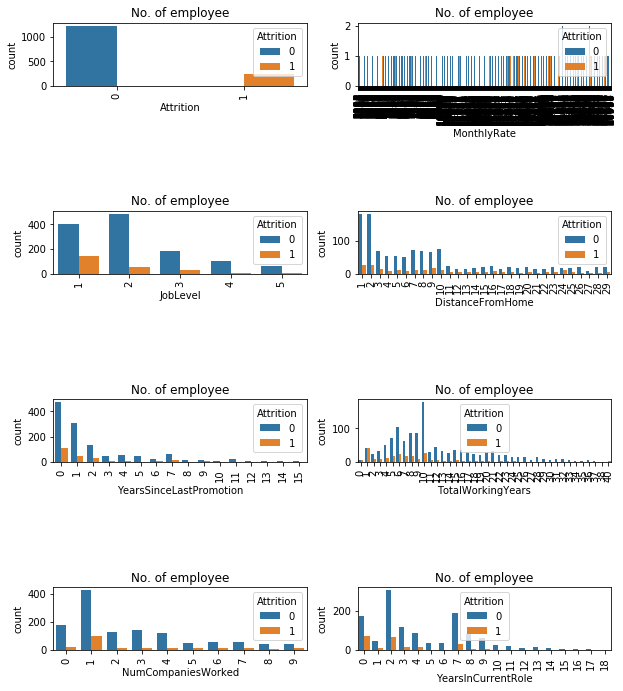

In [0]:
#//set(df_hr_clean_numeric.columns.to_list())
setallcols = set(['Attrition','MonthlyRate', 'NumCompaniesWorked' , 'DistanceFromHome', 'TotalWorkingYears', 'JobLevel', 'YearsInCurrentRole','YearsSinceLastPromotion'])
setplotcol = setallcols - set(target) - set(['EmployeeNumber'])
features   = list(setplotcol) 
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(round(len(features)/2,0)+1, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=j,data = df_hr_clean_numeric, hue = target)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

Attrition  as pie chart:


Text(0, 0.5, '')

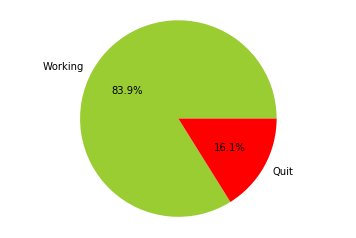

In [0]:
# Check Class variables that has 0 value for Genuine transactions and 1 for Fraud
print(target," as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(df_hr_clean[target].value_counts(),autopct='%1.1f%%', labels=['Working','Quit'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

#### Observation:
 - Here, we can see data is skewed, class 0(Working) is in majority.

### Plot histogram to see if there is any trend in MonthlyIncome or MonthlyRate variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc039955128>,
      dtype=object)

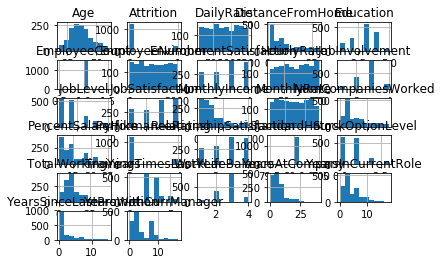

In [0]:
df_hr_clean_numeric.hist()

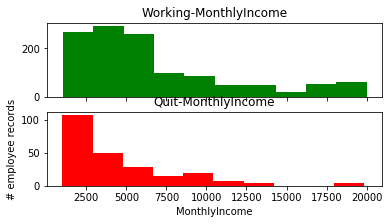

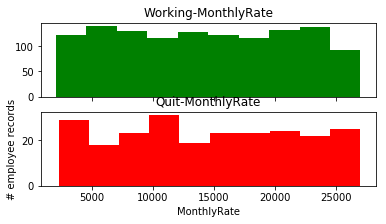

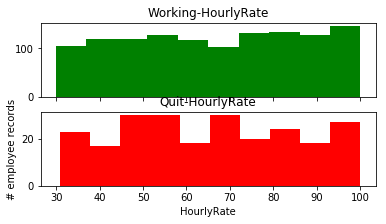

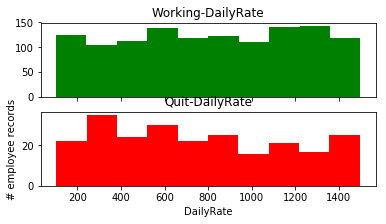

In [0]:
#plot MonthlyIncome to see if there is any trend
plotcolname = ['MonthlyIncome','MonthlyRate','HourlyRate','DailyRate']

for i in range(len(plotcolname)):
  # print(plotcolname[i]," variable")
  # print(hr_data[plotcolname[i]].tail(5))
  fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
  ax1.hist(df_hr_clean[plotcolname[i]][df_hr_clean[target]==0],color='g')
  ax1.set_title('Working-'+plotcolname[i])

  ax2.hist(df_hr_clean[plotcolname[i]][df_hr_clean[target]==1],color='r')
  ax2.set_title('Quit-'+plotcolname[i])
  plt.xlabel(plotcolname[i])
  plt.ylabel('# employee records')

#### Observations:

This 'MonthlyIncome','MonthlyRate','HourlyRate','DailyRate' feature have almost similar dependence for both the classes(working & quit).  So, I believe this feature does not yield any predictive power to distinguish between the two classes. But ofcourse we will later test this assumption. 

For now, I'll keep this feature in hr data frame and We will drop after we check for metric scores.

### Plot histogram to see if there is any trend with other variables

In [0]:
# cc = cc.drop(['Time'],axis=1)
setallcol  = set(df_hr_clean.columns)
setplotcol = setallcol - set(plotcolname) - set([target]) - set(['Over18','EmployeeCount','EmployeeNumber','StandardHours'])
print(list(setplotcol)[0],type(setplotcol),len(setallcol),len(setplotcol))

Gender <class 'set'> 35 26


In [0]:
#let us check correlations and shapes of other features as well.

colno = len(setplotcol)
gs = gridspec.GridSpec((colno), 1)
# plt.figure(figsize=(6,(colno)*4))
# for i, col in enumerate(df_hr_clean[list(setplotcol)]):
#     ax5 = plt.subplot(gs[i])
#     sns.distplot(df_hr_clean[col][df_hr_clean[target] == 1], bins=50, color='r')
#     sns.distplot(df_hr_clean[col][df_hr_clean[target] == 0], bins=50, color='g')
#     ax5.set_xlabel('')
#     ax5.set_title('feature: ' + str(col))
# plt.show()

### Perform pandas profiling

In [0]:
profile = pandas_profiling.ProfileReport(hr_data)
profile.to_file(outputfile="hrdata_before_preprocessing.html")

### Creating a scatter plot and pairplot to check distribution of data.

#### Pair plot and Scatter plot

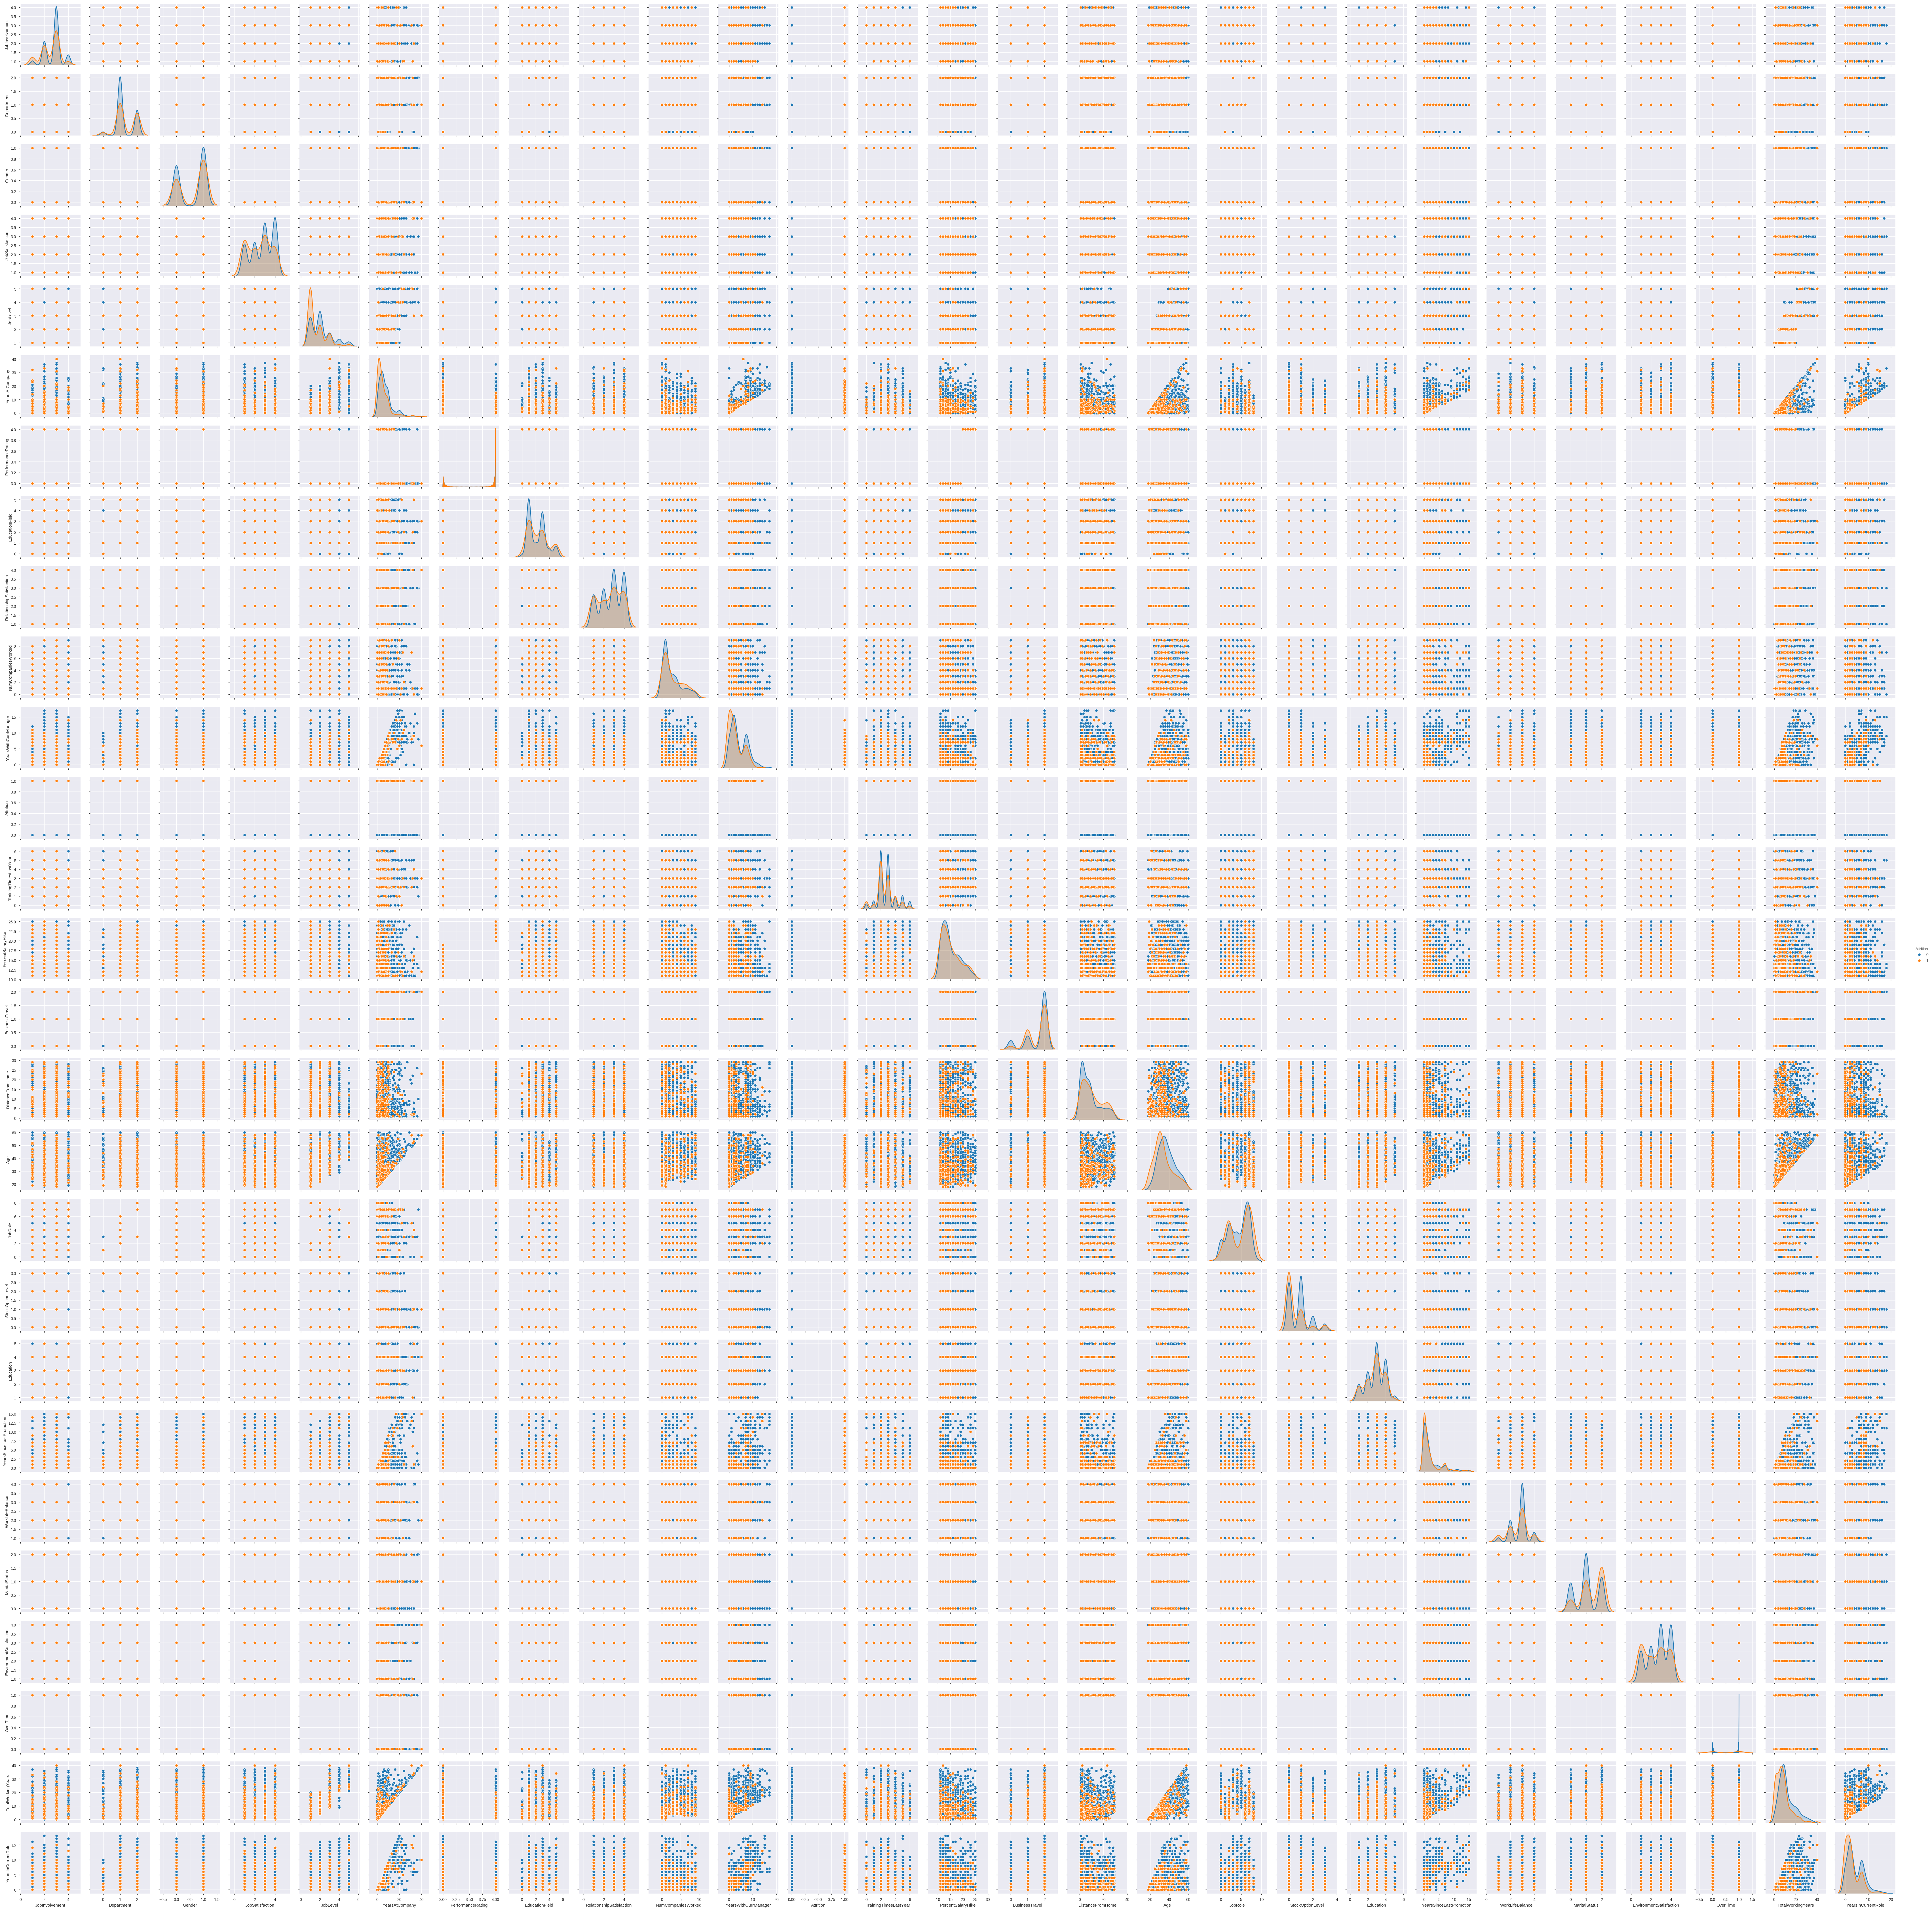

In [0]:
setplotcol = setallcol - set(plotcolname) - set(['Over18','EmployeeCount','EmployeeNumber','StandardHours'])
sns.pairplot(df_hr_clean[list(setplotcol)],hue = target)

#### Heatmap

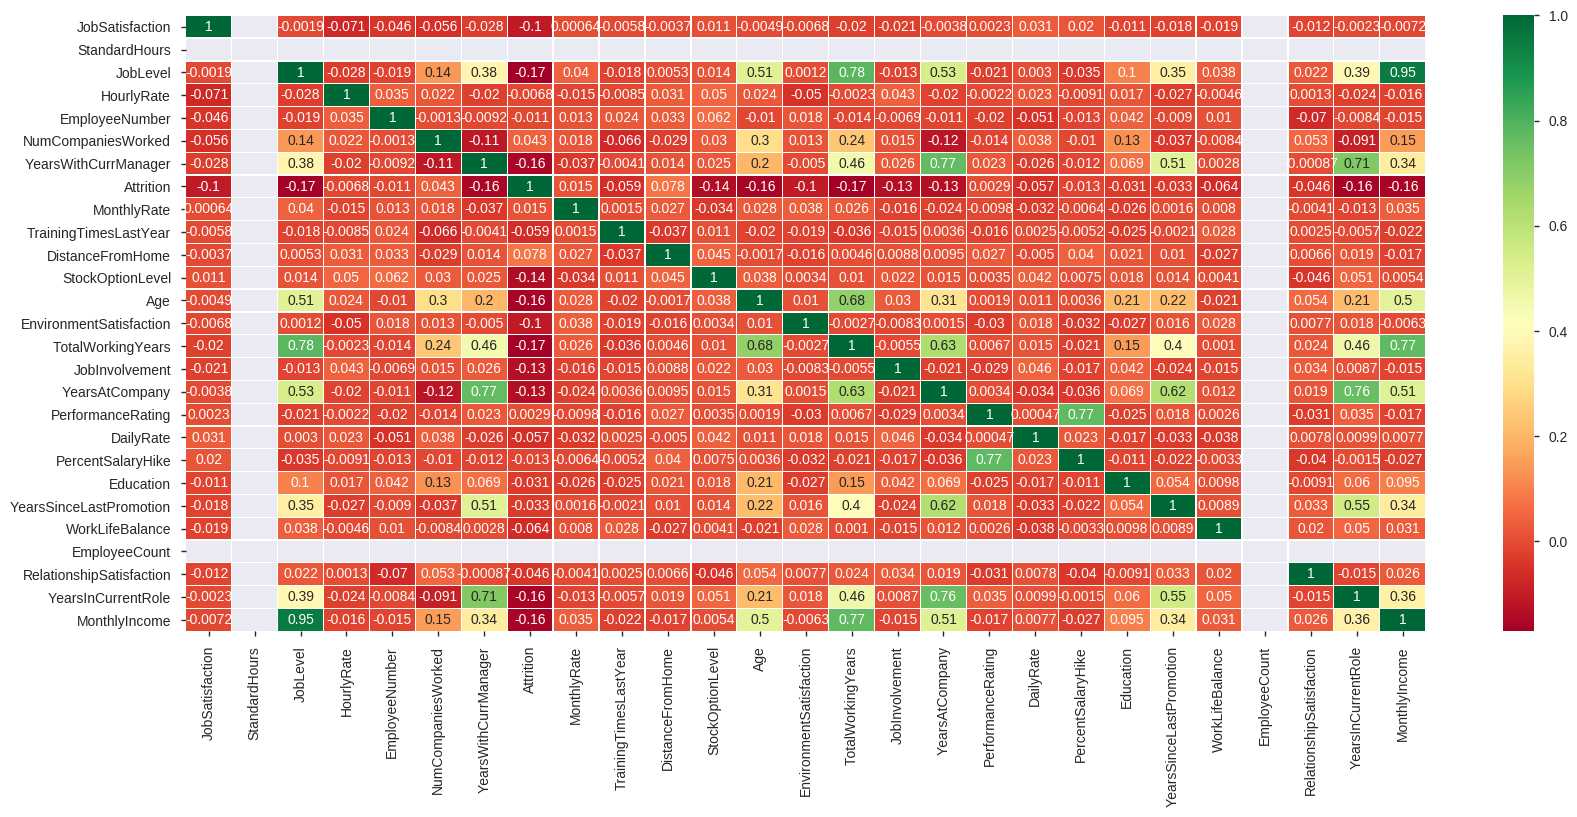

In [0]:
# plotting heatmap
plotallcolnames = set(df_hr_clean_numeric.columns)
plotsubcolnames = set(['Attrition','MonthlyRate', 'NumCompaniesWorked' , 'DistanceFromHome', 'TotalWorkingYears', 'JobLevel', 'YearsInCurrentRole'])
plotcolnames    = plotallcolnames #-( plotsubcolnames - set(['Attrition']) )
sns.heatmap(df_hr_clean_numeric[plotcolnames].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.show()
# ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True,linewidths=1)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=90,horizontalalignment='right')

#### Observation
As shown above, __“Monthly Rate”, “Number of Companies Worked” and “Distance From Home”__ are __positively__ correlated to Attrition; while __"Job Involvement","Monthly Income", “Job Level”,"Years at company", “Total Working Years”, "Stock Option Level", “Years In Current Role”, "Years with Current Manager" and "Environment Satisfaction"__ are __negatively__ correlated to __Attrition__.

## 5. Data Standardization

### Compute the skewness of the data

In [0]:
df_hr_clean.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

### Using StandardScaler to standardize the data

In [0]:
### Remove the columns with standard deviation = 0 
df_hr_clean         = DropColumnsWithZeroStd(df_hr_clean)
df_hr_clean_numeric = DropColumnsWithZeroStd(df_hr_clean_numeric)

Shape before dropping: (1470, 35)
Number of constant columns to be dropped:  3
['EmployeeCount', 'Over18', 'StandardHours']
Shape after dropping : (1470, 32)
Shape before dropping: (1470, 27)
Number of constant columns to be dropped:  2
['EmployeeCount', 'StandardHours']
Shape after dropping : (1470, 25)


In [0]:
#GEt the data into standard scale using standard scaler
df_hr_clean_numeric_scale = GetDataIntoStandardScale(df_hr_clean_numeric)
df_hr_clean_scale         = GetDataIntoStandardScale(df_hr_clean)
print('After standardizing our features, the first 5 rows of our data now look like this:\n')   # print the first 5 value after standardization
print(df_hr_clean_scale.head(2))                                                     
print(df_hr_clean_numeric_scale.head(2))


After standardizing our features, the first 5 rows of our data now look like this:

        Age  BusinessTravel  ...  YearsWithCurrManager  Attrition
0  0.446350        0.590048  ...              0.245834          1
1  1.322365       -0.913194  ...              0.806541          0

[2 rows x 32 columns]
        Age  DailyRate  ...  YearsWithCurrManager  Attrition
0  0.446350   0.742527  ...              0.245834          1
1  1.322365  -1.297775  ...              0.806541          0

[2 rows x 25 columns]


In [0]:
df_hr_clean_combine       = pd.concat([df_hr_clean_numeric_scale,df_hr_obj_encoderdata],axis=1)
print("combined data set after scaling")
print(df_hr_clean_combine.shape)
print(df_hr_clean_combine.columns)
print(df_hr_clean_combine.head(2))

combined data set after scaling
(1470, 47)
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'intercept', 'BusinessTravel_0', 'BusinessTravel_1', 'Department_0',
       'Department_1', 'EducationField_0', 'EducationField_1',
       'EducationField_2', 'EducationField_3', 'EducationField_4', 'Gender_0',
       'JobRole_0', 'JobRole_1', 'JobRole_2', 'JobRole_3', 'JobRole_4',
       'JobRole_5', 'JobRole_6', 'JobRole_7', 'MaritalStatus_0',
       'MaritalStatus_1', 'OverTime_0'],
      dtype='object')
        Age  Dai

### Compute skewness after StandardScaler

In [0]:
pd.DataFrame(df_hr_clean_scale).skew()

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

## 6. Modelling and prediction

- Our aim is to come up with a model which acts as a tool to predict the attrition before hand to the HR team so that they take appropriate measures to mitigate the risk.
- Here our goal is to __FOCUS__ on the __recall__ score as it is important to correctly predict all the employees who are at risk of attrition. 
- We may have to trade off on __precision__ as the HR should still be fine to take pre-emptive measures on those few employees who might not be at risk but are still identified as at RISK. This should be fine as long as the number of such employees are "low" (within 5-10%)

### Using UNDER SAMPLING to balance the data

- Since the data is imbalanced we __FIRST__ make an attempt to try to balance the data using the under sampling technique to see if a model can be created with a high recall score.
- Next we will also try with SMOTE to see if that helps.

#### Creating the new data set using Under Sampling
- Use the minority(attrition) class and then populate the majority(using random sampling) to the same size as that of minority class.

In [0]:
### Remove the columns with standard deviation = 0 from test and value set.
# df_hr_clean         = DropColumnsWithZeroStd(df_hr_clean)
df_hr_clean_combine = DropColumnsWithZeroStd(df_hr_clean_combine)
# df_hr_clean[target].value_counts()
df_hr_clean_combine[target].value_counts()

Shape before dropping: (1470, 47)
Number of constant columns to be dropped:  1
['intercept']
Shape after dropping : (1470, 46)


0    1233
1     237
Name: Attrition, dtype: int64

In [0]:
#get number of minority class records
# minority_class_len = len(df_hr_clean[df_hr_clean[target]==1])
minority_class_len = len(df_hr_clean_combine[df_hr_clean_combine[target]==1])

#get index of majority class records
# majority_class_indices = df_hr_clean[df_hr_clean[target]==0].index 
majority_class_indices = df_hr_clean_combine[df_hr_clean_combine[target]==0].index 

#get radom majority class records equaivelenet to number of minority class records
random_maj_indices = np.random.choice(majority_class_indices,minority_class_len,replace=False)

#get index of minority classe records   
# minority_class_indices = df_hr_clean[df_hr_clean[target]==1].index  
minority_class_indices = df_hr_clean_combine[df_hr_clean_combine[target]==1].index  

#combine both min and maj indices 
under_sample_indices = np.concatenate([minority_class_indices,random_maj_indices]) 

#get under sampled records 
# df_hr_us = df_hr_clean.loc[under_sample_indices]
df_hr_us = df_hr_clean_combine.loc[under_sample_indices]

print("Under sample data created,size=",df_hr_us.shape)

Under sample data created,size= (474, 46)


1    237
0    237
Name: Attrition, dtype: int64
(474, 46)


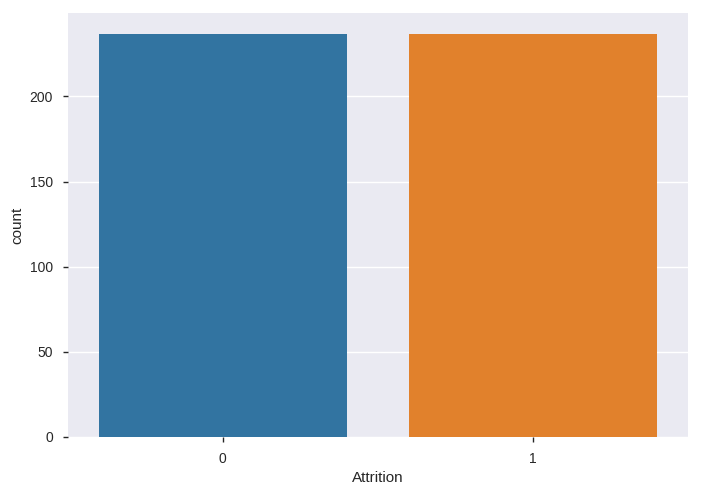

In [0]:
#Let's see the class distribution after under sampling
ax=sns.countplot(x = target, data = df_hr_us)
print(df_hr_us[target].value_counts())
print(df_hr_us.shape)

In [0]:
df_hr_us.head(2)

Age  DailyRate  ...  MaritalStatus_1  OverTime_0
0  0.446350   0.742527  ...        -0.333333        -0.5
2  0.008343   1.414363  ...        -0.333333        -0.5

[2 rows x 46 columns]

In [0]:
#GEt the data into standard scale using standard scaler
df_hr_us_scale = df_hr_us   #GetDataIntoStandardScale(df_hr_us)
print('After standardizing our features, the first 5 rows of our data now look like this:\n')   # print the first 5 value after standardization
print(df_hr_us_scale.head(10))
print(df_hr_us_scale[target].value_counts())

After standardizing our features, the first 5 rows of our data now look like this:

         Age  DailyRate  ...  MaritalStatus_1  OverTime_0
0   0.446350   0.742527  ...        -0.333333        -0.5
2   0.008343   1.414363  ...        -0.333333        -0.5
14 -0.977174  -1.734097  ...        -0.333333        -0.5
21 -0.101159   1.030102  ...        -0.333333         0.5
24 -0.320163  -0.256552  ...        -0.333333         0.5
26 -0.539166   0.799546  ...        -0.333333        -0.5
33  0.227347   0.229352  ...        -0.333333         0.5
34 -1.415181   0.026066  ...        -0.333333        -0.5
36  1.431867   0.164896  ...        -0.333333        -0.5
42 -1.196177   1.374698  ...        -0.333333         0.5

[10 rows x 46 columns]
1    237
0    237
Name: Attrition, dtype: int64


1    237
0    237
Name: Attrition, dtype: int64
(474, 46)


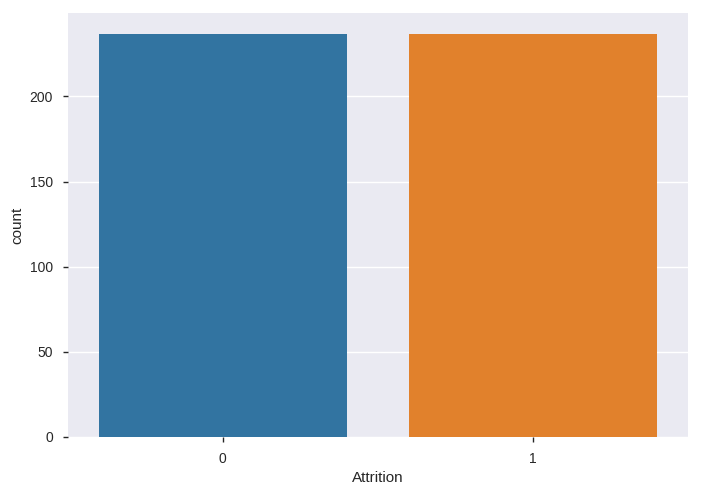

In [0]:
#Let's see the class distribution of the scaled data
ax=sns.countplot(x=target,data=df_hr_us_scale)
print(df_hr_us_scale[target].value_counts())
print(df_hr_us_scale.shape)

In [0]:
#Prepare X and y using pandas
#Prepare the data using standard scale
data1_x_bin = df_hr_us_scale.loc[:,df_hr_us_scale.columns != target]
data1_y_bin = df_hr_us_scale.loc[:,df_hr_us_scale.columns == target]

print("Spliting the data into train and test using undersampled data ")
# data_train, data_test, label_train, label_test = train_test_split(data_x_pca24, data1_y_bin, test_size=0.20, random_state=1)
drop_list                                      = []
data_train, data_test, label_train, label_test = split_data(df_hr_us_scale, drop_list,testsize=0.2)

Spliting the data into train and test using undersampled data 
Columns Used for Prediction: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'BusinessTravel_0', 'BusinessTravel_1', 'Department_0', 'Department_1',
       'EducationField_0', 'EducationField_1', 'EducationField_2',
       'EducationField_3', 'EducationField_4', 'Gender_0', 'JobRole_0',
       'JobRole_1', 'JobRole_2', 'JobRole_3', 'JobRole_4', 'JobRole_5',
       'JobRole_6', 'JobRole_7', 'MaritalStatus_0', 'MaritalStatus_1',
       'OverTime_0'],
  

#### Checking Scores of basic algorithms using BoxPlot

In [0]:
#List all the classifiers
classifiers=['Logistic Regression','Decision Tree','Random Forest','KNeighborsClassifier']

#List all the models
modelsList =[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]

scoringtype = 'recall'

#call the metrics
df_metrics,scoretype = ShowMetricsUsingBoxPlot(df_hr_us_scale, classifiers, modelsList, scoringtype = scoringtype, splits = 10, n_estim = 20, n_neigh = 7)
df_metrics

CV Mean       Std
Logistic Regression   0.330556  0.333828
Decision Tree         0.152083  0.234604
Random Forest         0.160417  0.197214
KNeighborsClassifier  0.232361  0.234864

Text(0.5, 1.0, 'Metric recall Score')

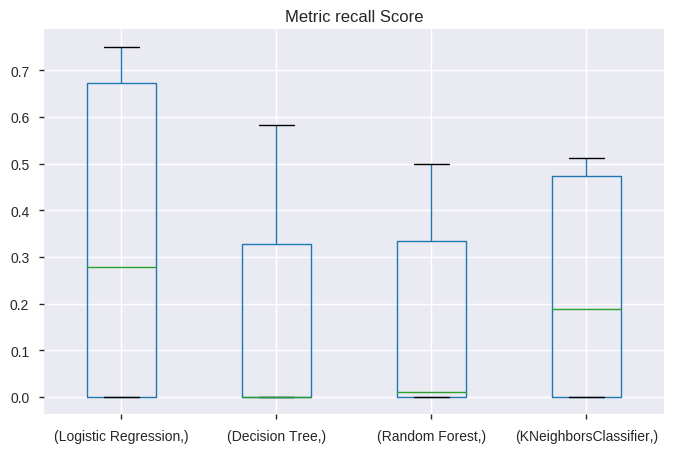

In [0]:
#Show the data in boxplot
fig, ax1 = plt.subplots(figsize=(8,5))
box      = pd.DataFrame(scoretype, index = [df_metrics.index])
box.T.boxplot(ax = ax1)
plt.title('Metric '+ scoringtype + ' Score')

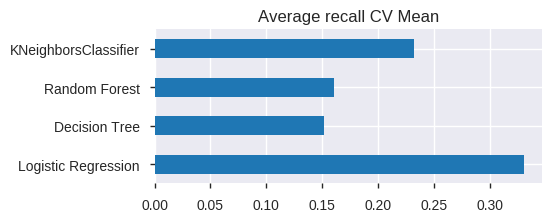

In [0]:
  #Show the scores in bar graph
  df_metrics['CV Mean'].plot.barh(width=0.5)
  plt.title('Average ' + scoringtype + ' CV Mean')
  fig = plt.gcf()
  fig.set_size_inches(5,2)
  plt.show()

#### Checking the scores using basic algorithms

In [0]:
#Instantiate KNN and fit
y_pred, y_pred_prob = get_predictions(KNeighborsClassifier(n_neighbors = 5, p=2, metric='minkowski'), data_train, label_train, data_test,False,avg=None)
print_scores(label_test,y_pred,y_pred_prob,avg=None)
#Instantiate Logistic Regression and fit
y_pred, y_pred_prob = get_predictions(LogisticRegression(), data_train, label_train, data_test,False,avg=None)
print_scores(label_test,y_pred,y_pred_prob,avg=None)

#Instantiate DecisionTreeClassifier and fit
y_pred, y_pred_prob = get_predictions(DecisionTreeClassifier() , data_train, label_train, data_test,False,avg=None)
print_scores(label_test,y_pred,y_pred_prob,avg=None)
#Instantiate RandomForrest and fit
y_pred, y_pred_prob = get_predictions(RandomForestClassifier() , data_train, label_train, data_test,False,avg=None)
print_scores(label_test,y_pred,y_pred_prob,avg=None)

**************************************** KNeighborsClassifier ****************************************
train-set confusion matrix:
 [[160  29]
 [ 48 142]]
test-set confusion matrix :
 [[37 11]
 [20 27]]
recall score    :  0.574468085106383
precision score :  0.7105263157894737
f1 score        :  0.6352941176470589
accuracy score  :  0.6736842105263158
ROC AUC         :  0.708776595744681
******************************************************************************************
**************************************** LogisticRegression ****************************************
train-set confusion matrix:
 [[149  40]
 [ 33 157]]
test-set confusion matrix :
 [[32 16]
 [18 29]]
recall score    :  0.6170212765957447
precision score :  0.6444444444444445
f1 score        :  0.6304347826086957
accuracy score  :  0.6421052631578947
ROC AUC         :  0.7814716312056738
******************************************************************************************
************************************

In [0]:
#Get the best algorithms
exported_pipeline = LogisticRegression()
exported_pipeline.fit(data_train, label_train)

#Get the feature importance for the best algorithm
perm = PermutationImportance(exported_pipeline,random_state=42).fit(data_test,label_test)
allcolname = set(list(df_hr_us_scale.columns))-set([target])

data_test = pd.DataFrame(data=data_test,columns =list(allcolname))
eli5.show_weights(perm,feature_names = data_test.columns.values)

- Recall scores seems to be moderate__les than 60%__ for all the models except __Logistic Regression__ where it is __76%__ with precision __80%__.
- Let us see if a Grid Search on recall can improve this scores further?

#### Checking Using Grid Search basic algorithms with default parameters

In [0]:
df_comp_results,df_comp_resut_output,df_predict_info = ComputeScoresUsingGridSearchWithoutParameters(df_hr_us_scale,data1_x_bin, data1_y_bin,
                                                                                                      'recall',splits=15,testsize=0.2,trainsize=0.8)

df_comp_resut_output['Deviation From Train'] = df_comp_resut_output['MLA Test recall Mean'] - df_comp_resut_output['MLA Train recall Mean'] 
df_comp_resut_output.sort_values(by = ['MLA Test recall Mean'], ascending = False)
# df_comp_results.sort_values(by = ['Recall Test'], ascending = False)


prediction completed


MLA Name  ... Deviation From Train
1        LogisticRegressionCV  ...           -0.0652076
2          LogisticRegression  ...           -0.0686323
3                 BernoulliNB  ...           -0.0316009
8          AdaBoostClassifier  ...            -0.175966
4                  GaussianNB  ...           -0.0356123
9  GradientBoostingClassifier  ...            -0.292792
7        ExtraTreesClassifier  ...            -0.379311
6      DecisionTreeClassifier  ...            -0.437479
5        KNeighborsClassifier  ...            -0.174393
0      RandomForestClassifier  ...            -0.423405

[10 rows x 7 columns]

In [0]:
#Get the best algorithms
exported_pipeline = LogisticRegression(C = 1.0, class_weight = None, dual = False)
exported_pipeline.fit(data_train, label_train)

#Get the feature importance for the best algorithm
perm = PermutationImportance(exported_pipeline,random_state=42).fit(data_test,label_test)
allcolname = set(list(df_hr_us_scale.columns))-set([target])

data_test = pd.DataFrame(data=data_test,columns =list(allcolname))
eli5.show_weights(perm,feature_names = data_test.columns.values)

- Below are the best with Gridsearch for default parameters 
  - GaussianNB (76% Train vs 74% Test) which seems to stable (deviation of 2% only).
  - LogisticRegressionCV (79% Train vs 75% Test) which also seems to stable (deviation of 4% only).
  - And, LogisticRegression (79% Train vs 75% Test) with deviation of 4%.
- Note, we did find DecisionTreeClassifier and ExtraTreesClassifier with 100% recall score in Train but when it was tested in Test set the scores droped to 60% this means they are __UNDERFIT__ hence not selected.
- Now, we also try to see the precision scores for the best algorithms.

In [0]:
#Create a dictionary of modelname and parameter values
param_key_list    =  df_comp_resut_output['MLA Name'].tolist()
param_vaues_list  =  df_comp_resut_output['MLA Parameters'].tolist()
param_dict = dict(zip(param_key_list, param_vaues_list))
param_dict

{'AdaBoostClassifier': "{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}",
 'BernoulliNB': "{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}",
 'DecisionTreeClassifier': "{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}",
 'ExtraTreesClassifier': "{'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}",
 'GaussianNB': "{'p

In [0]:
df_bestmodel = ComputeScoresUsingGridSearchWithParameters(param_dict,label_train,label_test,data_train,data_test,use_default_parameter=True)
df_bestmodel[df_bestmodel['Model Name'].isin(['AdaBoostClassifier','LogisticRegressionCV','LogisticRegression'])].sort_values(by = ['Recall Test'], ascending = False)

Model Name  ... F1Score Test
8    AdaBoostClassifier  ...     0.700000
1  LogisticRegressionCV  ...     0.645833
2    LogisticRegression  ...     0.630435

[3 rows x 10 columns]

In [0]:
#Instantiate the best model and get the feature importance
exported_pipeline = AdaBoostClassifier(algorithm = 'SAMME.R', base_estimator = None, learning_rate = 1.0, n_estimators = 50, random_state= None)
exported_pipeline.fit(data_train, label_train)

#Get the feature importance for the best algorithm
perm = PermutationImportance(exported_pipeline,random_state=42).fit(data_test,label_test)
allcolname = set(list(df_hr_us_scale.columns))-set([target])

data_test = pd.DataFrame(data=data_test,columns =list(allcolname))
eli5.show_weights(perm,feature_names = data_test.columns.values)

- Below are the best having __recall and precision__ scores(Gridsearch for default parameters)
  - LogisticRegressionCV (74% recall and 70% precision)
  - LogisticRegression   (74% recall and 68% precision).
- Note, we are not selecting __AdaBoostClassifier__ which had the best recall score(80%) becuase its precision dropped to 69% which actually would add an overhead to HR team in counselling employees who actually are not at attrition risk.
- Now let us try Grid Search with different permutations of parameters to see if we can improve this score further?

#### Checking Using Grid Search basic algorithms with all possible combination of parameters

In [0]:
all_model,all_param = GetModelsAndParameters()
helper1             = EstimatorSelectionHelper(all_model, all_param)
print("Retrieved the Model and Parameters and instantiatel the Helper1 class object")

Retrieved the Model and Parameters and instantiatel the Helper1 class object


In [0]:
df_bestmodel = helper1.fit(X=data_train, y=label_train, cv=15, n_jobs=-1, verbose=1, scoring='recall', refit=True)

Running GridSearchCV for LogisticRegression.
Fitting 15 folds for each of 14 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    3.8s finished


Running GridSearchCV for DecisionTreeClassifier.
Fitting 15 folds for each of 36 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 491 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    2.9s finished


Running GridSearchCV for RandomForestClassifier.
Fitting 15 folds for each of 2 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.0s finished


Running GridSearchCV for KNNClassifier.
Fitting 15 folds for each of 16 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    3.4s


Running GridSearchCV for ExtraTreesClassifier.
Fitting 15 folds for each of 2 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for AdaBoostClassifier.
Fitting 15 folds for each of 2 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.2s finished


Running GridSearchCV for GradientBoostingClassifier.
Fitting 15 folds for each of 4 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.6s finished


In [0]:
# helper1.best_params
df_bestmodel.sort_values(by = ['Recall Test'], ascending = False)

Model Name  ... F1Score Test
0          LogisticRegression  ...     0.691589
5          AdaBoostClassifier  ...     0.711538
6  GradientBoostingClassifier  ...     0.680000
1      DecisionTreeClassifier  ...     0.702128
2      RandomForestClassifier  ...     0.694737
4        ExtraTreesClassifier  ...     0.717391
3               KNNClassifier  ...     0.635294

[7 rows x 10 columns]

In [0]:
#Instantiate the best model and get the feature importance
exported_pipeline = ExtraTreesClassifier(n_estimators = 32)
exported_pipeline.fit(data_train, label_train)

#Get the feature importance for the best algorithm
perm = PermutationImportance(exported_pipeline,random_state=42).fit(data_test,label_test)
allcolname = set(list(df_hr_us_scale.columns))-set([target])

data_test = pd.DataFrame(data=data_test,columns =list(allcolname))
eli5.show_weights(perm,feature_names = data_test.columns.values)

In [0]:
#Instantiate the best model and get the feature importance
exported_pipeline = GradientBoostingClassifier(learning_rate = 1.0,n_estimators = 16)
exported_pipeline.fit(data_train, label_train)

#Get the feature importance for the best algorithm
perm = PermutationImportance(exported_pipeline,random_state=42).fit(data_test,label_test)
allcolname = set(list(df_hr_us_scale.columns))-set([target])

data_test = pd.DataFrame(data=data_test,columns =list(allcolname))
eli5.show_weights(perm,feature_names = data_test.columns.values)

##### Observation:
 - The recall scores seems to have improved with DecisionTreeClassifer(91%).
 - Below are the best having __recall and precision__ scores(Gridsearch  with parameters)
  - DecisionTreeClassifer (85% recall and 57% precision)
  - LogisticRegression (78% recall vs 63% precision).
  - AdaBoostClassifier (78% recall vs 71% precision).
- Note, we are not selecting __ExtraTreesClassifier, GradientBoostingClassifier and RandomForrestClassifire__ which had the best recall score(100%) in __Train__ becuase there is lot of deviation between its __Test scores__ 74% and 72% respectively which means its an __UNDERFIT__ and hence will __NOT be STABLE__.
- Now let us Test these 3 models with __ACTUAL TEST__ data to see how they perform with a larger dataset?

#### Testing the scores of best algorithm from under sampling data against the full data set 

In [0]:
#Prepare the data using standard scale
data1_x_bin = df_hr_clean_combine.loc[:,df_hr_clean_combine.columns != target]
data1_y_bin = df_hr_clean_combine.loc[:,df_hr_clean_combine.columns == target]

print("Spliting the data into train and test using undersampled data ")
# data_train, data_test, label_train, label_test = train_test_split(data_x_pca24, data1_y_bin, test_size=0.20, random_state=1)
drop_list                                      = []
data_train, data_test, label_train, label_test = split_data(df_hr_clean_combine, drop_list,testsize=0.2)

Spliting the data into train and test using undersampled data 
Columns Used for Prediction: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'BusinessTravel_0', 'BusinessTravel_1', 'Department_0', 'Department_1',
       'EducationField_0', 'EducationField_1', 'EducationField_2',
       'EducationField_3', 'EducationField_4', 'Gender_0', 'JobRole_0',
       'JobRole_1', 'JobRole_2', 'JobRole_3', 'JobRole_4', 'JobRole_5',
       'JobRole_6', 'JobRole_7', 'MaritalStatus_0', 'MaritalStatus_1',
       'OverTime_0'],
  

In [0]:
# df_bestmodel['Parameters']
# df_bestmodel[df_bestmodel['Model Name'].isin(['DecisionTreeClassifier','LogisticRegression','AdaBoostClassifier'])]['Parameters']

#Create a dictionary of modelname and parameter values
param_key_list    =  df_bestmodel['Model Name'].tolist()
param_vaues_list  =  df_bestmodel['Parameters'].tolist()
param_dict = dict(zip(param_key_list, param_vaues_list))
param_dict

{'AdaBoostClassifier': "{'n_estimators': 32}",
 'DecisionTreeClassifier': "{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'splitter': 'random'}",
 'ExtraTreesClassifier': "{'n_estimators': 16}",
 'GradientBoostingClassifier': "{'learning_rate': 1.0, 'n_estimators': 16}",
 'KNNClassifier': "{'algorithm': 'auto', 'n_neighbors': 5}",
 'LogisticRegression': "{'C': 0.001, 'penalty': 'l2'}",
 'RandomForestClassifier': "{'n_estimators': 32}"}

In [0]:
#Instantiate DTree and fit
y_pred, y_pred_prob = get_predictions(DecisionTreeClassifier(criterion= 'entropy', max_depth = 2, 
                                                             min_samples_leaf = 2, splitter = 'best'), data_train, label_train, data_test,False,avg=None)
print_scores(label_test,y_pred,y_pred_prob,avg=None)
#Instantiate AdaBootClassifier
y_pred, y_pred_prob = get_predictions(AdaBoostClassifier(n_estimators = 32), data_train, label_train, data_test,False,None)
print_scores(label_test,y_pred,y_pred_prob,avg=None)
#Instantiate LogisticRegression
y_pred, y_pred_prob = get_predictions(LogisticRegression(C = 0.001, penalty = 'l2'), data_train, label_train, data_test,False,None)
print_scores(label_test,y_pred,y_pred_prob,avg=None)

**************************************** DecisionTreeClassifier ****************************************
train-set confusion matrix:
 [[960  26]
 [147  43]]
test-set confusion matrix :
 [[234  13]
 [ 45   2]]
recall score    :  0.0425531914893617
precision score :  0.13333333333333333
f1 score        :  0.06451612903225806
accuracy score  :  0.8027210884353742
ROC AUC         :  0.6930398828495133
******************************************************************************************
**************************************** AdaBoostClassifier ****************************************
train-set confusion matrix:
 [[962  24]
 [101  89]]
test-set confusion matrix :
 [[233  14]
 [ 34  13]]
recall score    :  0.2765957446808511
precision score :  0.48148148148148145
f1 score        :  0.35135135135135137
accuracy score  :  0.8367346938775511
ROC AUC         :  0.8092858988715652
******************************************************************************************
********************

In [0]:
#Instantiate the best model and get the feature importance
exported_pipeline = AdaBoostClassifier (n_estimators = 32)
exported_pipeline.fit(data_train, label_train)

#Get the feature importance for the best algorithm
perm = PermutationImportance(exported_pipeline,random_state=42).fit(data_test,label_test)
allcolname = set(list(df_hr_us_scale.columns))-set([target])

data_test = pd.DataFrame(data=data_test,columns =list(allcolname))
eli5.show_weights(perm,feature_names = data_test.columns.values)

##### Observation:
- Major drawback of Under sampling is, lossing out the important information of majority class becuase reduces data of majority class to macth with minority class and this can be seen with the results of our recall and precision scores.
 - The recall scores dropped very much when tested with FULL train and test dataset for the best algorithms. The precision also dropped for AdaBoostClassifier and DecisionTreeClassifier considerably.
 - None of the models can be chosen at this point. However, we will use __Logistic Regression's Score of recall(27%) and precision(48%) as our __BENCHMARK__
- Next we will try SMOTE technique to see if this can help improving recall scores?

### Use SMOTE (Synthetic Minority Oversampling Technique) to check if it improves recall score

#### Creating the new sample using SMOTE
- Create random or atificial minority class samples to macth up the majority class
- Random: Creates new sample by taking the random sample from the minority samples
- SMOTE: First creates lines by searching the nearest neighbourwood for each data min data points and then creates new data points among the links/structure drawn b/w the nearest neighbourwood
- After synthesising the new min isntances the imbalance exist in our ds go dwon considerably  

0    1233
1     237
Name: Attrition, dtype: int64


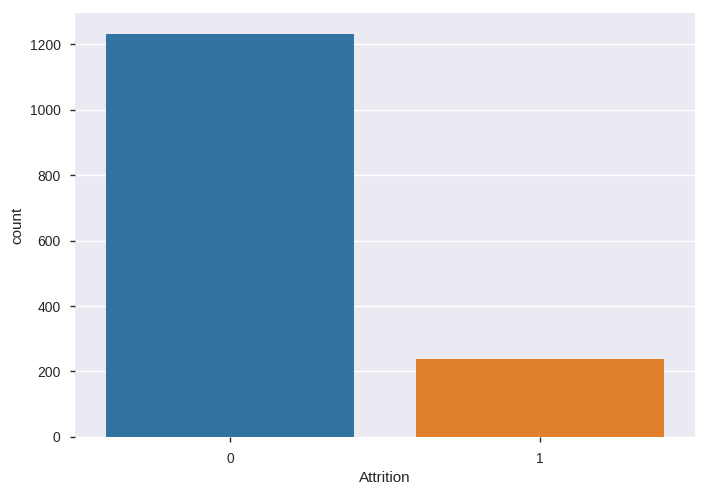

In [0]:
#Let's see the class distribution 
ax=sns.countplot(x = target, data = df_hr_clean)
print(df_hr_clean[target].value_counts())
#print(df_hr_us.is_promoted.value_counts(normalize=True)*100)

In [0]:
print("Spliting the data into train and test to be used for smoting data ")
drop_list                                      = []
data_train, data_test, label_train, label_test = split_data(df_hr_clean, drop_list, testsize=0.2)

Spliting the data into train and test to be used for smoting data 
Columns Used for Prediction: Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
train-set size          :  (1176, 31) 
test-set size           :  (294, 31)
Attrition  cases in test-set :  47


In [0]:
#Using SMOTE to get the split
sm                     =   SMOTE(random_state = 12,ratio = 1.0)
x_train_sm, y_train_sm = sm.fit_sample(data_train,label_train)
print("Smoting of data completed")

Smoting of data completed


In [0]:
print("Check for distribution after smoting")
unique, count          = np.unique(y_train_sm, return_counts = True)

y_train_sm_value_count = {k:v for (k,v) in zip(unique,count)}

print(y_train_sm_value_count)

Check for distribution after smoting
{0: 986, 1: 986}


1    986
0    986
Name: Attrition, dtype: int64
(1972, 32)


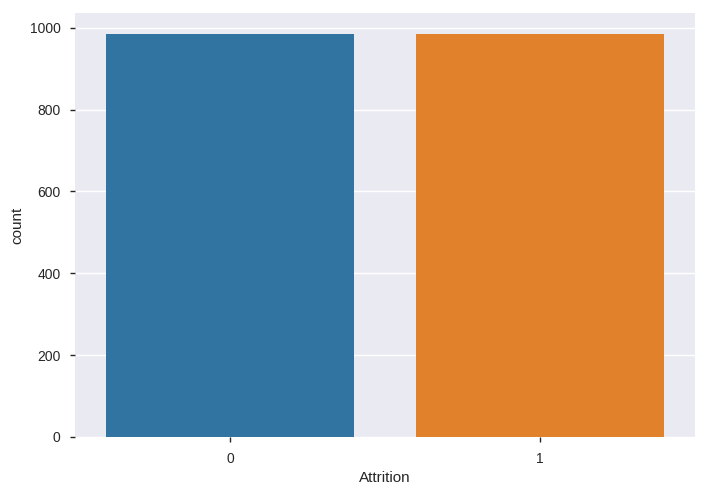

In [0]:
setallcols           = set(df_hr_clean.columns)
setdatacols          = setallcols - set([target])
data_x_smote         = pd.DataFrame(data = x_train_sm, columns = list(setdatacols))
data_x_smote[target] = y_train_sm

#Let's see the class distribution after smoting
ax=sns.countplot(x = target, data = data_x_smote)
print(data_x_smote[target].value_counts())
print(data_x_smote.shape)


After standardizing our features, the first 5 rows of our data now look like this:

1    986
0    986
Name: Attrition, dtype: int64
(1972, 32)


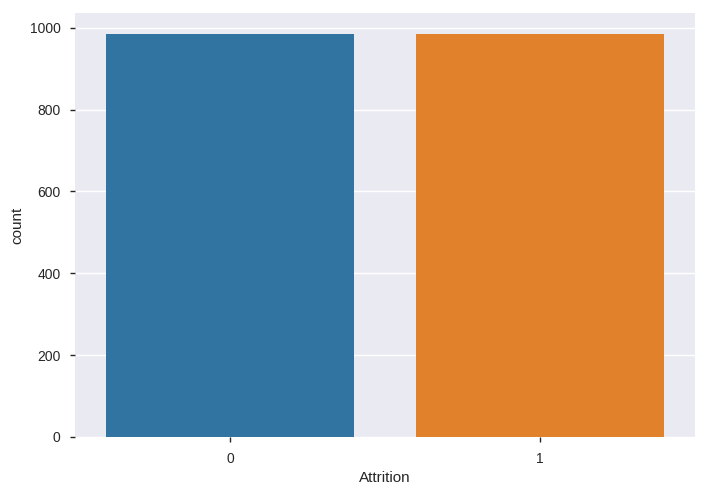

In [0]:
#GEt the data into standard scale using standard scaler
data_x_smote_scale = GetDataIntoStandardScale(data_x_smote)
print('After standardizing our features, the first 5 rows of our data now look like this:\n')   # print the first 5 value after standardization

#Let's see the class distribution of the data after scaling
ax=sns.countplot(x=target,data=data_x_smote_scale)
print(data_x_smote_scale[target].value_counts())
print(data_x_smote_scale.shape)

In [0]:
print("Spliting the data into train and test using smote data ")
drop_list                                      = []
data_train, data_test, label_train, label_test = split_data(data_x_smote_scale, drop_list, testsize=0.2)

Spliting the data into train and test using smote data 
Columns Used for Prediction: Index(['Department', 'JobSatisfaction', 'JobLevel', 'HourlyRate',
       'YearsInCurrentRole', 'EducationField', 'EmployeeNumber',
       'NumCompaniesWorked', 'YearsWithCurrManager', 'MonthlyRate',
       'TrainingTimesLastYear', 'BusinessTravel', 'DistanceFromHome', 'Age',
       'JobRole', 'StockOptionLevel', 'EnvironmentSatisfaction',
       'TotalWorkingYears', 'JobInvolvement', 'Gender', 'YearsAtCompany',
       'PerformanceRating', 'DailyRate', 'PercentSalaryHike', 'Education',
       'YearsSinceLastPromotion', 'WorkLifeBalance', 'MaritalStatus',
       'RelationshipSatisfaction', 'OverTime', 'MonthlyIncome', 'Attrition'],
      dtype='object')
train-set size          :  (1577, 31) 
test-set size           :  (395, 31)
Attrition  cases in test-set :  197


#### Checking Scores of basic algorithms using BoxPlot

In [0]:
#List all the classifiers
classifiers=['Logistic Regression','Decision Tree','Random Forest','KNeighborsClassifier']

#List all the models
modelsList =[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]

scoringtype = 'recall'

#call the metrics
df_metrics,scoretype = ShowMetricsUsingBoxPlot(data_x_smote, classifiers, modelsList, scoringtype = scoringtype, splits = 10, n_estim = 20, n_neigh = 7)
df_metrics

CV Mean       Std
Logistic Regression   0.692320  0.139624
Decision Tree         0.707589  0.170252
Random Forest         0.705535  0.209594
KNeighborsClassifier  0.918808  0.036349

Text(0.5, 1.0, 'Metric recall Score')

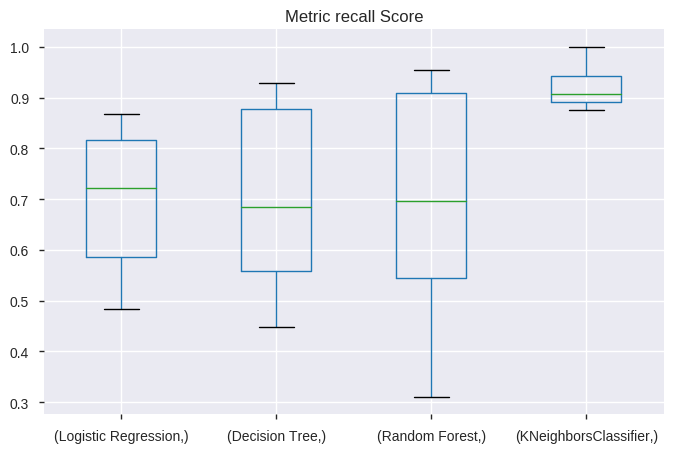

In [0]:
#Show the data in boxplot
fig, ax1 = plt.subplots(figsize=(8,5))
box      = pd.DataFrame(scoretype, index = [df_metrics.index])
box.T.boxplot(ax = ax1)
plt.title('Metric '+ scoringtype + ' Score')

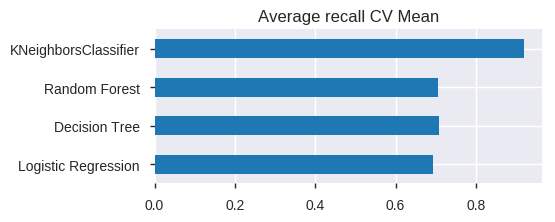

In [0]:
  #Show the scores in bar graph
  df_metrics['CV Mean'].plot.barh(width=0.5)
  plt.title('Average ' + scoringtype + ' CV Mean')
  fig = plt.gcf()
  fig.set_size_inches(5,2)
  plt.show()

#### Checking the scores using basic algorithms

In [0]:
#Instantiate KNN and fit
y_pred, y_pred_prob = get_predictions(KNeighborsClassifier(n_neighbors = 5, p=2, metric='minkowski'), data_train, label_train, data_test,False)
print_scores(label_test,y_pred,y_pred_prob)
#Instantiate Logistic Regression and fit
y_pred, y_pred_prob = get_predictions(LogisticRegression(), data_train, label_train, data_test,False)
print_scores(label_test,y_pred,y_pred_prob)
#Instantiate Logistic Regression CV and fit
# y_pred, y_pred_prob = get_predictions( LogisticRegressionCV(), data_train, label_train, data_test,False)
# print_scores(label_test,y_pred,y_pred_prob)
# #Instantiate Gaussian NB and fit
# y_pred, y_pred_prob = get_predictions(GaussianNB(), data_train, label_train, data_test,False)
# print_scores(label_test,y_pred,y_pred_prob)
# #Instantiate Bernouli and fit
# y_pred, y_pred_prob = get_predictions(BernoulliNB() , data_train, label_train, data_test,False)
# print_scores(label_test,y_pred,y_pred_prob)
#Instantiate DecisionTreeClassifier and fit
y_pred, y_pred_prob = get_predictions(DecisionTreeClassifier() , data_train, label_train, data_test,False)
print_scores(label_test,y_pred,y_pred_prob)
#Instantiate RandomForrest and fit
y_pred, y_pred_prob = get_predictions(RandomForestClassifier() , data_train, label_train, data_test,False)
print_scores(label_test,y_pred,y_pred_prob)

**************************************** KNeighborsClassifier ****************************************
train-set confusion matrix:
 [[621 167]
 [  8 781]]
test-set confusion matrix :
 [[144  54]
 [  3 194]]
recall score    :  0.9847715736040609
precision score :  0.782258064516129
f1 score        :  0.8719101123595505
accuracy score  :  0.8556962025316456
ROC AUC         :  0.9637748038763267
******************************************************************************************
**************************************** LogisticRegression ****************************************
train-set confusion matrix:
 [[670 118]
 [120 669]]
test-set confusion matrix :
 [[166  32]
 [ 31 166]]
recall score    :  0.8426395939086294
precision score :  0.8383838383838383
f1 score        :  0.8405063291139241
accuracy score  :  0.8405063291139241
ROC AUC         :  0.9136543095933959
******************************************************************************************
***************************

- Recall scores seems to have improved using SMOTE for all the models and are showing greater than __85%__ with precision __78%__.
- The best result was for __RandomForrestClassifier__ with __87%__ with precision __87%__. The others were KNN with __98%__ recall and LogisticRegression with __84%__. 
- Let us see if a Grid Search on recall can improve this scores further?

#### Checking Using Grid Search basic algorithms with default parameters

In [0]:
df_comp_results,df_comp_resut_output,df_predict_info = ComputeScoresUsingGridSearchWithoutParameters(data_x_smote,data_train, label_train,
                                                                                                      'recall',splits=15,testsize=0.2,trainsize=0.8)
# df_comp_results.sort_values(by = ['Recall Test'], ascending = False)
df_comp_resut_output['Deviation From Train'] = df_comp_resut_output['MLA Train recall Mean'] - df_comp_resut_output['MLA Test recall Mean'] 
df_comp_resut_output.sort_values(by= ['MLA Test recall Mean','Deviation From Train'], ascending = [False,True])

prediction completed


MLA Name  ... Deviation From Train
5        KNeighborsClassifier  ...            0.0138963
9  GradientBoostingClassifier  ...            0.0690516
8          AdaBoostClassifier  ...            0.0276879
7        ExtraTreesClassifier  ...             0.135855
0      RandomForestClassifier  ...             0.144276
1        LogisticRegressionCV  ...            0.0200636
2          LogisticRegression  ...            0.0235329
6      DecisionTreeClassifier  ...              0.17176
4                  GaussianNB  ...          -0.00397926
3                 BernoulliNB  ...          -0.00465282

[10 rows x 7 columns]

In [0]:
#Create a dictionary of modelname and parameter values
param_key_list    =  df_comp_resut_output['MLA Name'].tolist()
param_vaues_list  =  df_comp_resut_output['MLA Parameters'].tolist()
param_dict = dict(zip(param_key_list, param_vaues_list))
param_dict

{'AdaBoostClassifier': "{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}",
 'BernoulliNB': "{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}",
 'DecisionTreeClassifier': "{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}",
 'ExtraTreesClassifier': "{'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}",
 'GaussianNB': "{'p

In [0]:
#Extracting the top3 models
df_bestmodel = ComputeScoresUsingGridSearchWithParameters(param_dict,label_train,label_test,data_train,data_test,use_default_parameter=True)
df_bestmodel[df_bestmodel['Model Name'].isin(['KNeighborsClassifier','AdaBoostClassifier','LogisticRegression'])].sort_values(by = ['Recall Test'], ascending = False)

Model Name  ... F1Score Test
5  KNeighborsClassifier  ...     0.871910
8    AdaBoostClassifier  ...     0.847716
2    LogisticRegression  ...     0.840506

[3 rows x 10 columns]

- Below are the models having best __recall and precision__ scores(Gridsearch for default parameters)
  - KNeighborsClassifier (98% recall and 82% precision)
  - LogisticRegression   (84% recall and 83% precision)
  - AdaBoostClassifier   (84% recall and 84% precision)
- Note, we are not selecting __DecisionTreeClassifier and ExtraTreesClassifier__ which had the best recall score(100%) becuase its an __OVERFIT__ with deviation of 18% and 13% respectively.
- Now let us try Grid Search with different permutations of parameters to see if we can improve this score further?

#### Checking Using Grid Search basic algorithms with all possible combination of parameters

In [0]:
all_model,all_param = GetModelsAndParameters()
helper1             = EstimatorSelectionHelper(all_model, all_param)
print("Retrieved the Model and Parameters and instantiatel the Helper1 class object")

Retrieved the Model and Parameters and instantiatel the Helper1 class object


In [0]:
df_bestmodel = helper1.fit(X=data_train, y=label_train, cv=15, n_jobs=-1, verbose=1, scoring='recall', refit=True)

Running GridSearchCV for LogisticRegression.
Fitting 15 folds for each of 14 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    2.9s finished


Running GridSearchCV for DecisionTreeClassifier.
Fitting 15 folds for each of 36 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 462 tasks      | elapsed:    4.3s


Running GridSearchCV for RandomForestClassifier.
Fitting 15 folds for each of 2 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.9s finished


Running GridSearchCV for KNNClassifier.
Fitting 15 folds for each of 16 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   30.4s finished


Running GridSearchCV for ExtraTreesClassifier.
Fitting 15 folds for each of 2 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.6s finished


Running GridSearchCV for AdaBoostClassifier.
Fitting 15 folds for each of 2 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.3s finished


Running GridSearchCV for GradientBoostingClassifier.
Fitting 15 folds for each of 4 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.7s finished


In [0]:
# helper1.best_params
df_bestmodel.sort_values(by = ['Recall Test'], ascending = False)

Model Name  ... F1Score Test
3               KNNClassifier  ...     0.871910
2      RandomForestClassifier  ...     0.923077
4        ExtraTreesClassifier  ...     0.923077
6  GradientBoostingClassifier  ...     0.886650
5          AdaBoostClassifier  ...     0.862245
0          LogisticRegression  ...     0.842105
1      DecisionTreeClassifier  ...     0.781327

[7 rows x 10 columns]

##### Observation:
 - The recall scores seems to have improved with KNNClassifer(98%) and looks very stable too(deviation is 0.005).
 - Below are the best having __recall and precision__ scores(Gridsearch  with parameters)
  - KNNClassifer           (98% recall and 78% precision)
  - RandomForestClassifier (89% recall and 90% precision).
  - ExtraTreesClassifier   (90% recall and 95% precision).
- Note, we are not selecting __GradientBoostingClassifier__ becuase there is lot of deviation which means its an __OVERFIT__ and hence will __NOT be STABLE__.
- Now let us Test these 3 models with __ACTUAL TEST__ data to see how they perform with a larger dataset?

#### Testing the score of best algorithm from under sampling data against the full data set 

In [0]:
#Prepare the data using standard scale
data1_x_bin = df_hr_clean_scale.loc[:,df_hr_clean_scale.columns != target]
data1_y_bin = df_hr_clean_scale.loc[:,df_hr_clean_scale.columns == target]

print("Spliting the data into train and test using undersampled data ")
# data_train, data_test, label_train, label_test = train_test_split(data_x_pca24, data1_y_bin, test_size=0.20, random_state=1)
drop_list                                      = []
data_train, data_test, label_train, label_test = split_data(df_hr_clean_scale, drop_list,testsize=0.2)

Spliting the data into train and test using undersampled data 
Columns Used for Prediction: Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype='object')
train-set size          :  (1176, 31) 
test-set size           :  (294, 31)
Attrition  cases in test-set :  47


In [0]:
#Instantiate KNN and fit
y_pred, y_pred_prob = get_predictions(KNeighborsClassifier(algorithm = 'auto', n_neighbors = 5), data_train, label_train, data_test,False)
print_scores(label_test,y_pred,y_pred_prob)
#Instantiate RandomForestClassifier
y_pred, y_pred_prob = get_predictions(RandomForestClassifier(n_estimators = 32), data_train, label_train, data_test,False)
print_scores(label_test,y_pred,y_pred_prob)
#Instantiate ExtraTreesClassifier
y_pred, y_pred_prob = get_predictions(ExtraTreesClassifier(n_estimators = 32), data_train, label_train, data_test,False)
print_scores(label_test,y_pred,y_pred_prob)

**************************************** KNeighborsClassifier ****************************************
train-set confusion matrix:
 [[980   6]
 [145  45]]
test-set confusion matrix :
 [[243   4]
 [ 43   4]]
recall score    :  0.0851063829787234
precision score :  0.5
f1 score        :  0.14545454545454545
accuracy score  :  0.8401360544217688
ROC AUC         :  0.6791713325867861
******************************************************************************************
**************************************** RandomForestClassifier ****************************************
train-set confusion matrix:
 [[986   0]
 [  1 189]]
test-set confusion matrix :
 [[244   3]
 [ 43   4]]
recall score    :  0.0851063829787234
precision score :  0.5714285714285714
f1 score        :  0.14814814814814814
accuracy score  :  0.8435374149659864
ROC AUC         :  0.7548453785855801
******************************************************************************************
***********************************

##### Observation:
- Major drawback of SMOTE is lossing out the important information of majority class becuase it reduces data of majority class
- The recall scores dropped very much when tested with FULL train and test dataset for the best algorithms. The precision also dropped for AdaBoostClassifier and DecisionTreeClassifier considerably.
 - None of the models can be chosen because it was not even able to better our  __BENCHMARK__ of __Logistic Regression's [recall(27%) and precision(48%)] 
- Next we will try using the entire dataset to see if this can help improving recall scores?

### Use the complete Data set where we just drop the columns with standard deviation as zero

#### Prepare the data and split into train and test

In [0]:
### Remove the columns with standard deviation = 0 from test and value set.
df_hr_clean_combine = DropColumnsWithZeroStd(df_hr_clean_combine)

###convert data to standard scale
df_hr_clean_scale = df_hr_clean_combine # GetDataIntoStandardScale(df_hr_clean)

#Prepare the data using standard scale
data1_x_bin = df_hr_clean_scale.loc[:,df_hr_clean_scale.columns != target]
data1_y_bin = df_hr_clean_scale.loc[:,df_hr_clean_scale.columns == target]

# Split the data into train and test without dropping any columns
print("Spliting the data into train and test without dropping any columns")
drop_list                                      = []
data_train, data_test, label_train, label_test = split_data(df_hr_clean_scale, drop_list, testsize=0.2)


Shape before dropping: (1470, 46)
Number of constant columns to be dropped:  0
[]
Shape after dropping : (1470, 46)
Spliting the data into train and test without dropping any columns
Columns Used for Prediction: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'BusinessTravel_0', 'BusinessTravel_1', 'Department_0', 'Department_1',
       'EducationField_0', 'EducationField_1', 'EducationField_2',
       'EducationField_3', 'EducationField_4', 'Gender_0', 'JobRole_0',
       'JobRole_1', 'JobRole_2', 'JobRole_3', '

#### Checking Scores of basic algorithms using BoxPlot

In [0]:
#List all the classifiers
classifiers=['Logistic Regression','Decision Tree','Random Forest','KNeighborsClassifier']

#List all the models
modelsList =[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]

scoringtype = 'recall'

#call the metrics
df_metrics,scoretype = ShowMetricsUsingBoxPlot(df_hr_clean_scale, classifiers, modelsList, scoringtype = scoringtype, splits = 10, n_estim = 20, n_neigh = 7)
df_metrics

CV Mean       Std
Logistic Regression   0.440114  0.107508
Decision Tree         0.399705  0.095856
Random Forest         0.154340  0.076363
KNeighborsClassifier  0.122542  0.070371

Text(0.5, 1.0, 'Metric recall Score')

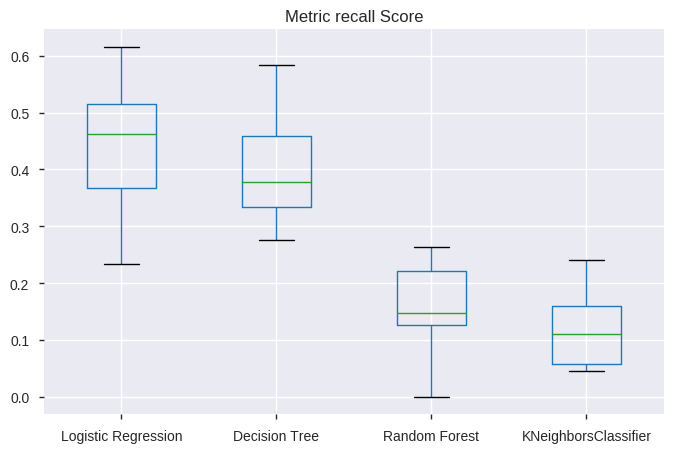

In [0]:
#Show the data in boxplot
fig, ax1 = plt.subplots(figsize=(8,5))
box      = pd.DataFrame(scoretype, index = df_metrics.index)
box.T.boxplot(ax = ax1)
plt.title('Metric '+ scoringtype + ' Score')

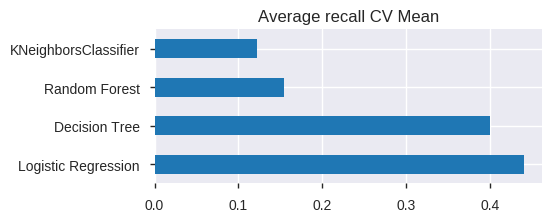

In [0]:
  #Show the scores in bar graph
  df_metrics['CV Mean'].plot.barh(width=0.5)
  plt.title('Average ' + scoringtype + ' CV Mean')
  fig = plt.gcf()
  fig.set_size_inches(5,2)
  plt.show()

#### Checking Using Grid Search basic algorithms with default parameters

In [0]:
df_comp_results,df_comp_resut_output,df_predict_info = ComputeScoresUsingGridSearchWithoutParameters(df_hr_clean_scale,data1_x_bin,data1_y_bin,
                                                                                                           'recall',splits=3,testsize=0.2,trainsize=0.8)
# df_comp_results.sort_values(by = ['Recall Test'], ascending = False)
df_comp_resut_output['Deviation From Train'] = df_comp_resut_output['MLA Test recall Mean'] - df_comp_resut_output['MLA Train recall Mean'] 
df_comp_resut_output.sort_values(by= ['MLA Test recall Mean','Deviation From Train'], ascending = [False,True])


prediction completed


MLA Name  ... Deviation From Train
4                  GaussianNB  ...           -0.0877698
3                 BernoulliNB  ...            0.0166473
2          LogisticRegression  ...            0.0112727
1        LogisticRegressionCV  ...            0.0151463
8          AdaBoostClassifier  ...           -0.0721418
6      DecisionTreeClassifier  ...            -0.671818
9  GradientBoostingClassifier  ...            -0.445535
7        ExtraTreesClassifier  ...            -0.831563
0      RandomForestClassifier  ...            -0.743537
5        KNeighborsClassifier  ...            -0.120075

[10 rows x 7 columns]

In [0]:
#Create a dictionary of modelname and parameter values
param_key_list    =  df_comp_resut_output['MLA Name'].tolist()
param_vaues_list  =  df_comp_resut_output['MLA Parameters'].tolist()
param_dict = dict(zip(param_key_list, param_vaues_list))
param_dict

{'AdaBoostClassifier': "{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}",
 'BernoulliNB': "{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}",
 'DecisionTreeClassifier': "{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}",
 'ExtraTreesClassifier': "{'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}",
 'GaussianNB': "{'p

In [0]:
#Extracting the top3 models
df_bestmodel = ComputeScoresUsingGridSearchWithParameters(param_dict,label_train,label_test,data_train,data_test,use_default_parameter=True)
df_bestmodel[df_bestmodel['Model Name'].isin(['GaussianNB','BernoulliNB','AdaBoostClassifier'])].sort_values(by = ['Recall Test'], ascending = False)

Model Name  ... F1Score Test
4          GaussianNB  ...     0.448000
3         BernoulliNB  ...     0.525253
8  AdaBoostClassifier  ...     0.371429

[3 rows x 10 columns]

- Below are the models having best __recall and precision__ scores(better than our benchmark scores of 27% recall)
  - GaussianNB         (59% recall and 35% precision)
  - BernouliNB         (55% recall and 50% precision)
  - AdaBoostClassifier (27% recall and 56% precision)
- Note, we are not selecting __DecisionTreeClassifier and ExtraTreesClassifier__ which had the best recall score(100%) in Train becuase its an __UNDERFIT__ with deviation of 67% and 82% respectively.
- Now let us try Grid Search with different permutations of parameters to see if we can improve this score further?

#### Checking Using Grid Search basic algorithms with all possible combination of parameters

In [0]:
all_model,all_param = GetModelsAndParameters()
helper1             = EstimatorSelectionHelper(all_model, all_param)
print("Retrieved the Model and Parameters and instantiatel the Helper1 class object")

Retrieved the Model and Parameters and instantiatel the Helper1 class object


In [0]:
df_bestmodel = helper1.fit(X=data_train, y=label_train, cv= 10, n_jobs=-1, verbose=1, scoring='recall', refit=True)

Running GridSearchCV for LogisticRegression.
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    7.2s finished


Running GridSearchCV for DecisionTreeClassifier.
Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for RandomForestClassifier.
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.1s finished


Running GridSearchCV for KNNClassifier.
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   15.7s finished


Running GridSearchCV for ExtraTreesClassifier.
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for AdaBoostClassifier.
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.4s finished


Running GridSearchCV for GradientBoostingClassifier.
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.2s finished


In [0]:
# helper1.best_params
df_bestmodel.sort_values(by = ['Recall Test'], ascending = False)

Model Name  ... F1Score Test
1      DecisionTreeClassifier  ...     0.413043
0          LogisticRegression  ...     0.438356
6  GradientBoostingClassifier  ...     0.390244
5          AdaBoostClassifier  ...     0.351351
4        ExtraTreesClassifier  ...     0.275862
3               KNNClassifier  ...     0.190476
2      RandomForestClassifier  ...     0.137931

[7 rows x 10 columns]

##### Observation:
 - The recall scores and precision seems to have improved for DecisionTreeClassifier with recall is 42% and 43% precision from our __BENCHMARK__ [recall(29%) and precision(48%)]. However, all the other models had poor score less than 35%. 
  - We will mark this as our new __BENCHMARK__ with __recall = 42% and precision = 43%__ for __DecisionTreeClassifier__. 
 - Next step ,we continue to drop few more columns to see if that helps in improving the recall scores which has a new bench mark of 42% recall score.

### Use a dataset by dropping few more columns(all salary related columns)

#### Prepare the data and split into train and test

In [0]:
#Let us remove salary related columns to see if there is any improvement/change in recall scores
setdropcol = set(['EmployeeNumber','MonthlyIncome','MonthlyRate','HourlyRate','DailyRate'])
setallcol  = set(df_hr_clean_combine.columns)
setnewcol  = setallcol - setdropcol

#Prepare the data using standard scale
data1_x_bin = df_hr_clean_combine[setnewcol].loc[:,df_hr_clean_combine[setnewcol].columns != target]
data1_y_bin = df_hr_clean_combine[setnewcol].loc[:,df_hr_clean_combine[setnewcol].columns == target]

# Split the data into train and test by dropping few columns
print("Spliting the data into train and test by dropping columns",list(setdropcol))
drop_list                                      = list(setdropcol)
data_train, data_test, label_train, label_test = split_data(df_hr_clean_combine, drop_list,testsize=0.2)

Spliting the data into train and test by dropping columns ['DailyRate', 'MonthlyRate', 'HourlyRate', 'EmployeeNumber', 'MonthlyIncome']
Columns Used for Prediction: Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'BusinessTravel_0', 'BusinessTravel_1', 'Department_0', 'Department_1',
       'EducationField_0', 'EducationField_1', 'EducationField_2',
       'EducationField_3', 'EducationField_4', 'Gender_0', 'JobRole_0',
       'JobRole_1', 'JobRole_2', 'JobRole_3', 'JobRole_4', 'JobRole_5',
       'JobRole_6', 'JobRole_7', 'MaritalStatus_0', 'MaritalStatus_1',
       'OverTime_0'],
      dtype='

#### Checking Scores of basic algorithms using BoxPlot

In [0]:
#List all the classifiers
classifiers=['Logistic Regression','Decision Tree','Random Forest','KNeighborsClassifier']

#List all the models
modelsList =[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]

scoringtype = 'recall'

#call the metrics
df_metrics,scoretype = ShowMetricsUsingBoxPlot(df_hr_clean_scale[setnewcol], classifiers, modelsList, scoringtype = scoringtype, splits = 10, n_estim = 20, n_neigh = 7)
df_metrics

CV Mean       Std
Logistic Regression   0.433761  0.097816
Decision Tree         0.349338  0.076102
Random Forest         0.157624  0.034774
KNeighborsClassifier  0.123182  0.036870

Text(0.5, 1.0, 'Metric recall Score')

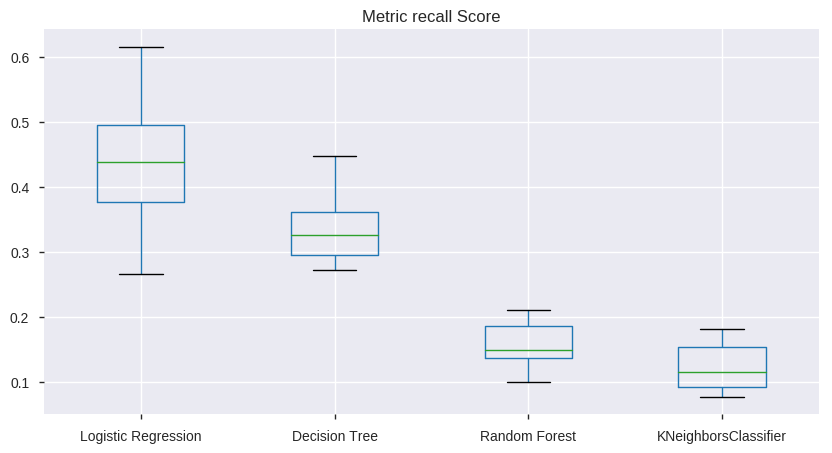

In [0]:
#Show the data in boxplot
fig, ax1 = plt.subplots(figsize=(10,5))
box      = pd.DataFrame(scoretype, index = df_metrics.index)
box.T.boxplot(ax = ax1)
plt.title('Metric '+ scoringtype + ' Score')

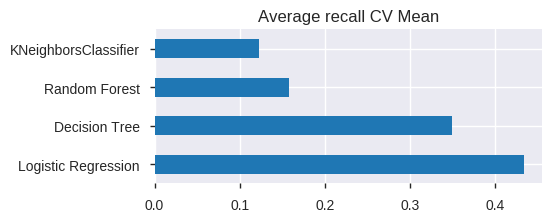

In [0]:
  #Show the scores in bar graph
  df_metrics['CV Mean'].plot.barh(width=0.5)
  plt.title('Average ' + scoringtype + ' CV Mean')
  fig = plt.gcf()
  fig.set_size_inches(5,2)
  plt.show()

#### Checking the basic algorithms

In [0]:
#Instantiate KNN and fit
y_pred, y_pred_prob = get_predictions(KNeighborsClassifier(n_neighbors = 5, p=2, metric='minkowski'), data_train, label_train, data_test,False)
print_scores(label_test,y_pred,y_pred_prob)
#Instantiate Logistic Regression and fit
y_pred, y_pred_prob = get_predictions(LogisticRegression(), data_train, label_train, data_test,False)
print_scores(label_test,y_pred,y_pred_prob)
#Instantiate Logistic Regression CV and fit
# y_pred, y_pred_prob = get_predictions( LogisticRegressionCV(), data_train, label_train, data_test,False)
# print_scores(label_test,y_pred,y_pred_prob)
# #Instantiate Gaussian NB and fit
# y_pred, y_pred_prob = get_predictions(GaussianNB(), data_train, label_train, data_test,False)
# print_scores(label_test,y_pred,y_pred_prob)
# #Instantiate Bernouli and fit
# y_pred, y_pred_prob = get_predictions(BernoulliNB() , data_train, label_train, data_test,False)
# print_scores(label_test,y_pred,y_pred_prob)
#Instantiate DecisionTreeClassifier and fit
y_pred, y_pred_prob = get_predictions(DecisionTreeClassifier() , data_train, label_train, data_test,False)
print_scores(label_test,y_pred,y_pred_prob)
#Instantiate RandomForrest and fit
y_pred, y_pred_prob = get_predictions(RandomForestClassifier() , data_train, label_train, data_test,False)
print_scores(label_test,y_pred,y_pred_prob)

**************************************** KNeighborsClassifier ****************************************
train-set confusion matrix:
 [[976  10]
 [140  50]]
test-set confusion matrix :
 [[243   4]
 [ 43   4]]
recall score    :  0.0851063829787234
precision score :  0.5
f1 score        :  0.14545454545454545
accuracy score  :  0.8401360544217688
ROC AUC         :  0.6678869842363684
******************************************************************************************
**************************************** LogisticRegression ****************************************
train-set confusion matrix:
 [[968  18]
 [ 97  93]]
test-set confusion matrix :
 [[238   9]
 [ 30  17]]
recall score    :  0.3617021276595745
precision score :  0.6538461538461539
f1 score        :  0.4657534246575342
accuracy score  :  0.8673469387755102
ROC AUC         :  0.8197949866482902
******************************************************************************************
****************************************

##### Observation:
 - After dropping the 'HourlyRate', 'DailyRate', 'Over18', 'EmployeeNumber', 'StandardHours', 'MonthlyIncome', 'EmployeeCount', 'MonthlyRate' we can see that the scores for recall are __not improving__ beyond 36% for Logistic(36% recall & 65% precision)
 - Let us check the Grid Search score to see if it helps in improving the recall score of 42%?

#### Checking Using Grid Search basic algorithms with default parameters

In [0]:
df_comp_results,df_comp_resut_output,df_feature_importance = ComputeScoresUsingGridSearchWithoutParameters(df_hr_clean_combine[setnewcol],data1_x_bin,data1_y_bin,
                                                                                                           'recall',splits=3,testsize=0.2,trainsize=0.8)
# df_comp_results.sort_values(by = ['Recall Test'], ascending = False)
df_comp_resut_output['Deviation From Train'] = df_comp_resut_output['MLA Test recall Mean'] - df_comp_resut_output['MLA Train recall Mean'] 
df_comp_resut_output.sort_values(by= ['MLA Test recall Mean','Deviation From Train'], ascending = [False,True])


prediction completed


MLA Name  ... Deviation From Train
8          AdaBoostClassifier  ...           -0.0370145
2          LogisticRegression  ...           0.00533743
4                  GaussianNB  ...           -0.0713232
1        LogisticRegressionCV  ...            0.0309757
3                 BernoulliNB  ...           -0.0048223
6      DecisionTreeClassifier  ...            -0.597804
9  GradientBoostingClassifier  ...            -0.346253
7        ExtraTreesClassifier  ...            -0.773753
0      RandomForestClassifier  ...            -0.716829
5        KNeighborsClassifier  ...            -0.103647

[10 rows x 7 columns]

In [0]:
#Create a dictionary of modelname and parameter values
param_key_list    =  df_comp_resut_output['MLA Name'].tolist()
param_vaues_list  =  df_comp_resut_output['MLA Parameters'].tolist()
param_dict = dict(zip(param_key_list, param_vaues_list))
param_dict

{'AdaBoostClassifier': "{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}",
 'BernoulliNB': "{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}",
 'DecisionTreeClassifier': "{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}",
 'ExtraTreesClassifier': "{'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}",
 'GaussianNB': "{'p

In [0]:
#Extracting the top3 models
df_bestmodel = ComputeScoresUsingGridSearchWithParameters(param_dict,label_train,label_test,data_train,data_test,use_default_parameter=True)
df_bestmodel[df_bestmodel['Model Name'].isin(['GaussianNB','BernoulliNB','AdaBoostClassifier'])].sort_values(by = ['Recall Test'], ascending = False)

Model Name  ... F1Score Test
4          GaussianNB  ...     0.444444
3         BernoulliNB  ...     0.500000
8  AdaBoostClassifier  ...     0.473684

[3 rows x 10 columns]

- Below 2 models show the best __recall and precision__ scores(better than our benchmark scores of 42% recall)
  - GaussianNB         (55% recall and 36% precision)
  - BernouliNB         (51% recall and 48% precision)
- Note, we are not selecting __AdaBoostClassifier__ becuase its an __UNDERFIT__ with deviation of 16% and and a poor recall of 38% (lower than our Benchmark).
- Now let us try Grid Search with different permutations of parameters to see if we can improve this score further?

#### Checking Using Grid Search basic algorithms with all possible combination of parameters

In [0]:
all_model,all_param = GetModelsAndParameters()
helper1             = EstimatorSelectionHelper(all_model, all_param)
print("Retrieved the Model and Parameters and instantiatel the Helper1 class object")

Retrieved the Model and Parameters and instantiatel the Helper1 class object


In [0]:
df_bestmodel = helper1.fit(X=data_train, y=label_train, cv= 10, n_jobs=-1, verbose=1, scoring='recall', refit=True)

Running GridSearchCV for LogisticRegression.
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    6.6s finished


Running GridSearchCV for DecisionTreeClassifier.
Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 336 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    2.8s finished


Running GridSearchCV for RandomForestClassifier.
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.0s finished


Running GridSearchCV for KNNClassifier.
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   15.0s finished


Running GridSearchCV for ExtraTreesClassifier.
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.0s finished


Running GridSearchCV for AdaBoostClassifier.
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.1s finished


Running GridSearchCV for GradientBoostingClassifier.
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.9s finished


In [0]:
# helper1.best_params
df_bestmodel.sort_values(by = ['Recall Test'], ascending = False)

Model Name  ... F1Score Test
5          AdaBoostClassifier  ...     0.467532
6  GradientBoostingClassifier  ...     0.395604
0          LogisticRegression  ...     0.453333
1      DecisionTreeClassifier  ...     0.256410
4        ExtraTreesClassifier  ...     0.245614
2      RandomForestClassifier  ...     0.181818
3               KNNClassifier  ...     0.145455

[7 rows x 10 columns]

##### Observation:
 - We dont see any improvement in the recall scores and precision when we run the grid search with parameters, the best is 38% and 60% precision for __AdaBoostClassifer__. However, this is lower than what we were able to achieve with GaussianNB(55% recall and 36% precision) and BernouliNB (51% recall and 48% precision). 
 - We will mark this as our new __BENCHMARK__ with __recall = 55% and precision = 36%__ for GaussianNB. 
 - Next step ,we use PCA to reduce the features and see if that helps in improving the recall scores which has a new bench mark of 55% recall score with GaussianNB or 46% with BernouliNB.

### Use a dataset by using Dimensionality Reduction (PCA)
- One of the major problems with this dataset is that there are more than few columns which do not help in prediction. To go through each of these predictors and see which ones are significant for the model is going to be little tedious task. Hence, we use one of the all-time favourite dimensionality reduction technique - Principle Component Analysis.
- Before we can use PCA, we need to **STANDARDISE** the data (Standardisation and Normalization are used inter-dependently. Standardisation is moulding the data to between -1 and +1 data points. Normalisation is normalising the data so that the data points lie along the mean.)

Since df_hr_clean_scale is already scaled, we shall use __PCA__ using this dataset.

#### Prepare the data and use PCA to find the number of components 

In [0]:
#Prepare the data using standard scale
data1_x_bin = df_hr_clean_combine.loc[:,df_hr_clean_combine.columns != target]
data1_y_bin = df_hr_clean_combine.loc[:,df_hr_clean_combine.columns == target]

In [0]:
#lets use PCA to see if we can compress the columns
pca = PCA(0.95).fit(data1_x_bin)

#### Variance Graph

[<matplotlib.lines.Line2D at 0x7fc023cd2fd0>]

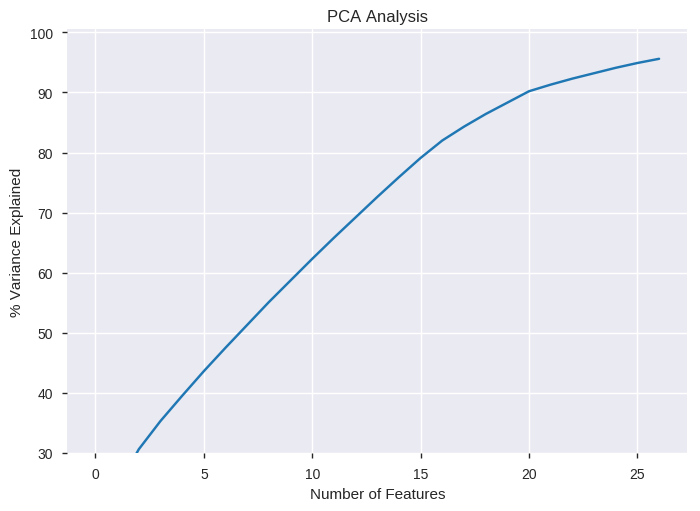

In [0]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [0]:
no_of_components = pca.n_components_
print('%d components explain 95%% of the variation in data' % no_of_components)

27 components explain 95% of the variation in data


We can see that the first __27 Principal Components attribute for about 95% variation__ in the data. We shall use these 24 for our prediction 

In [0]:
pca = PCA(n_components=no_of_components, random_state = 0)
pca.fit(data1_x_bin)
data_x_pca24 = pca.transform(data1_x_bin)
print("Orignal Shape :",data1_x_bin.shape)
print("PCA     Shape :",data_x_pca24.shape)

Orignal Shape : (1470, 45)
PCA     Shape : (1470, 27)


In [0]:
#creating dataframe for the pca columns 
data_x_pca         = pd.DataFrame(data = data_x_pca24 ,columns=data1_x_bin.columns.tolist()[0:no_of_components])
data_x_pca[target] = data1_y_bin
data_x_pca.head(5)

Age  DailyRate  ...  Department_0  Attrition
0 -0.428815   1.385555  ...      0.127865          1
1  0.498150  -2.173820  ...     -0.439908          0
2 -2.460419   1.192944  ...      0.480215          1
3 -0.960658  -0.169819  ...      0.759364          0
4 -1.913868   0.999577  ...     -0.200127          0

[5 rows x 28 columns]

#### Split the data in train and test data

In [0]:
# Split the data into train and test 
print("Spliting the data into train and test using pca columns")
# data_train, data_test, label_train, label_test = train_test_split(data_x_pca24, data1_y_bin, test_size=0.20, random_state=1)
drop_list                                      = []
data_train, data_test, label_train, label_test = split_data(data_x_pca, drop_list,testsize=0.2)

Spliting the data into train and test using pca columns
Columns Used for Prediction: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_0',
       'BusinessTravel_1', 'Department_0', 'Attrition'],
      dtype='object')
train-set size          :  (1176, 27) 
test-set size           :  (294, 27)
Attrition  cases in test-set :  47


#### Checking the basic algorithms

In [0]:
#Instantiate KNN and fit
y_pred, y_pred_prob = get_predictions(KNeighborsClassifier(n_neighbors = 5, p=2, metric='minkowski'), data_train, label_train, data_test,False)
print_scores(label_test,y_pred,y_pred_prob)
#Instantiate Logistic Regression and fit
y_pred, y_pred_prob = get_predictions(LogisticRegression(), data_train, label_train, data_test,False)
print_scores(label_test,y_pred,y_pred_prob)

#Instantiate DecisionTreeClassifier and fit
y_pred, y_pred_prob = get_predictions(DecisionTreeClassifier() , data_train, label_train, data_test,False)
print_scores(label_test,y_pred,y_pred_prob)
#Instantiate RandomForrest and fit
y_pred, y_pred_prob = get_predictions(RandomForestClassifier() , data_train, label_train, data_test,False)
print_scores(label_test,y_pred,y_pred_prob)

**************************************** KNeighborsClassifier ****************************************
train-set confusion matrix:
 [[979   7]
 [136  54]]
test-set confusion matrix :
 [[237  10]
 [ 42   5]]
recall score    :  0.10638297872340426
precision score :  0.3333333333333333
f1 score        :  0.16129032258064516
accuracy score  :  0.8231292517006803
ROC AUC         :  0.6239555517271083
******************************************************************************************
**************************************** LogisticRegression ****************************************
train-set confusion matrix:
 [[966  20]
 [126  64]]
test-set confusion matrix :
 [[240   7]
 [ 33  14]]
recall score    :  0.2978723404255319
precision score :  0.6666666666666666
f1 score        :  0.4117647058823529
accuracy score  :  0.8639455782312925
ROC AUC         :  0.7997243517960204
******************************************************************************************
************************

##### Observation:
 - After using PCA also we dont seem to have improve the scores of recall beyond 29% for LogisticRegression and with 66% precision. 
 - Let us try the Grid Search without using parameters to see if it improves our recall score and better the new benchmark of 55% recall for GaussianNB or 51% recall for BernouliNB?

#### Checking Using Grid Search basic algorithms with default parameters

In [0]:
df_comp_results,df_comp_resut_output,df_predict_info = ComputeScoresUsingGridSearchWithoutParameters(data_x_pca,data_x_pca24, data1_y_bin,
                                                                                                           'recall',splits=5,testsize=0.2,trainsize=0.8)
# df_comp_results.sort_values(by = ['Recall Test'], ascending = False)
df_comp_resut_output['Deviation From Train'] = df_comp_resut_output['MLA Test recall Mean'] - df_comp_resut_output['MLA Train recall Mean'] 
df_comp_resut_output.sort_values(by= ['MLA Test recall Mean','Deviation From Train'], ascending = [False,True])


prediction completed


MLA Name  ... Deviation From Train
6      DecisionTreeClassifier  ...            -0.621474
8          AdaBoostClassifier  ...            -0.155424
2          LogisticRegression  ...            0.0263646
1        LogisticRegressionCV  ...            0.0315186
4                  GaussianNB  ...           -0.0298881
9  GradientBoostingClassifier  ...             -0.51671
5        KNeighborsClassifier  ...             -0.12082
0      RandomForestClassifier  ...            -0.771081
7        ExtraTreesClassifier  ...            -0.918964
3                 BernoulliNB  ...           -0.0593788

[10 rows x 7 columns]

In [0]:
#Create a dictionary of modelname and parameter values
param_key_list    =  df_comp_resut_output['MLA Name'].tolist()
param_vaues_list  =  df_comp_resut_output['MLA Parameters'].tolist()
param_dict = dict(zip(param_key_list, param_vaues_list))
param_dict

{'AdaBoostClassifier': "{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}",
 'BernoulliNB': "{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}",
 'DecisionTreeClassifier': "{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}",
 'ExtraTreesClassifier': "{'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}",
 'GaussianNB': "{'p

In [0]:
#Extracting the top3 models
df_bestmodel = ComputeScoresUsingGridSearchWithParameters(param_dict,label_train,label_test,data_train,data_test,use_default_parameter=True)
df_bestmodel[df_bestmodel['Model Name'].isin(['DecisionTreeClassifier','LogisticRegression','AdaBoostClassifier'])].sort_values(by = ['Recall Test'], ascending = False)

Model Name  ... F1Score Test
8      AdaBoostClassifier  ...     0.404762
2      LogisticRegression  ...     0.411765
6  DecisionTreeClassifier  ...     0.237624

[3 rows x 10 columns]

- None of the above models are able to beat our benchmark of __56% recall for GaussianNB or 46% for Bernaouli__.
- Now let us try Grid Search with different permutations of parameters to see if we can beat this benchmark score ?

#### Checking Using Grid Search basic algorithms with all possible combination of parameters

In [0]:
all_model,all_param = GetModelsAndParameters()
helper1             = EstimatorSelectionHelper(all_model, all_param)
print("Retrieved the Model and Parameters and instantiatel the Helper1 class object")

Retrieved the Model and Parameters and instantiatel the Helper1 class object


In [0]:
df_bestmodel = helper1.fit(X=data_train, y=label_train, cv=15, n_jobs=-1, verbose=1, scoring='f1', refit=True)

Running GridSearchCV for LogisticRegression.
Fitting 15 folds for each of 14 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    2.3s finished


Running GridSearchCV for DecisionTreeClassifier.
Fitting 15 folds for each of 36 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 491 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    7.0s finished


Running GridSearchCV for RandomForestClassifier.
Fitting 15 folds for each of 2 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.9s finished


Running GridSearchCV for KNNClassifier.
Fitting 15 folds for each of 16 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   17.7s finished


Running GridSearchCV for ExtraTreesClassifier.
Fitting 15 folds for each of 2 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.4s finished


Running GridSearchCV for AdaBoostClassifier.
Fitting 15 folds for each of 2 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.0s finished


Running GridSearchCV for GradientBoostingClassifier.
Fitting 15 folds for each of 4 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    5.2s finished


In [0]:
# helper1.best_params
df_bestmodel.sort_values(by = ['F1Score Test'], ascending = False)

Model Name  ... F1Score Test
5          AdaBoostClassifier  ...     0.415584
0          LogisticRegression  ...     0.411765
1      DecisionTreeClassifier  ...     0.291667
6  GradientBoostingClassifier  ...     0.285714
2      RandomForestClassifier  ...     0.178571
3               KNNClassifier  ...     0.161290
4        ExtraTreesClassifier  ...     0.080000

[7 rows x 10 columns]

##### Observation:
 - The best recall score with parameters is 34% for __AdaBoostingClassifier__ and __DecisionTreeClassifier__ and both are __UNDERFIT__. The Logistic and GradientBoosting are giveng 29% recall with 25% precision which is __not greater than__ our Benchmark score of __56% for GaussianNB and 51% of BernouliNB__.

### Use a dataset by dropping all columns which dont show any correlation(either positive or negative) and also binning the MonthlyIncome, MonthlyRate, DailyRate and Age

#### Prepare the data and split into train and test

In [0]:
df_hr_copy = hr_data.copy()

In [0]:
colname  = 'PerformanceRating'
df_hr_copy[colname].unique(),df_hr_copy[colname].unique().min(),df_hr_copy[colname].unique().max(),df_hr_copy[colname].unique().mean()


(array([3, 4]), 3, 4, 3.5)

In [0]:
#“Monthly Rate”, “Number of Companies Worked” , “Distance From Home” , "Job Involvement","Monthly Income", “Job Level”,"Years at company", 
#“Total Working Years”, "Stock Option Level", “Years In Current Role”, "Years with Current Manager" and "Environment Satisfaction"
# bins = pd.IntervalIndex.from_tuples([(0, 1), (2, 3), (4, 5)])
# pd.cut([0, 0.5, 1.5, 2.5, 4.5], bins)
# bins = pd.IntervalIndex.from_tuples([(0, 35), (36, 55), (56, 100)])
df_hr_copy['Age']                     = pd.cut(df_hr_copy['Age'], 3,labels=["youngadults", "midadults", "oldadults"])                #-0.16
df_hr_copy['MonthlyIncome']           = pd.cut(df_hr_copy['MonthlyIncome'], 3,labels=["low", "medium", "high"])                      #-0.16
df_hr_copy['MonthlyRate']             = pd.cut(df_hr_copy['MonthlyRate'], 3,labels=["low", "medium", "high"])                        #+0.015
df_hr_copy['DailyRate']               = pd.cut(df_hr_copy['DailyRate'], 3,labels=["low", "medium", "high"])                          #-0.057
df_hr_copy['HourlyRate']              = pd.cut(df_hr_copy['HourlyRate'], 3,labels=["low", "medium", "high"])                         #-0.0068
df_hr_copy['YearsSinceLastPromotion'] = pd.cut(df_hr_copy['YearsSinceLastPromotion'], 3,labels=["low", "medium", "high"])            #-0.033
df_hr_copy['YearsWithCurrManager']    = pd.cut(df_hr_copy['YearsWithCurrManager'], 3,labels=["low", "medium", "high"])               #-0.16
df_hr_copy['YearsAtCompany']          = pd.cut(df_hr_copy['YearsAtCompany'], 3,labels=["low", "medium", "high"])                     #-0.13
df_hr_copy['NumCompaniesWorked']      = pd.cut(df_hr_copy['NumCompaniesWorked'], 3,labels=["low", "medium", "high"])                 #-0.1
df_hr_copy['YearsInCurrentRole']      = pd.cut(df_hr_copy['YearsInCurrentRole'], 3,labels=["low", "medium", "high"])                 #-0.16
df_hr_copy['RelationshipSatisfaction']= pd.cut(df_hr_copy['RelationshipSatisfaction'], 3,labels=["low", "medium", "high"])           #-0.046
df_hr_copy['DistanceFromHome']        = pd.cut(df_hr_copy['DistanceFromHome'], 3,labels=["low", "medium", "high"])                   #+0.078
df_hr_copy['PercentSalaryHike']       = pd.cut(df_hr_copy['PercentSalaryHike'], 3,labels=["low", "medium", "high"])                  #-0.013
df_hr_copy['StockOptionLevel']        = pd.cut(df_hr_copy['StockOptionLevel'], 4,labels=["none", "low", "medium","high"])            #-0.14
df_hr_copy['Education']               = pd.cut(df_hr_copy['Education'], 5,labels=["verylow", "low", "medium","high","veryhigh"])     #-0.031
df_hr_copy['EnvironmentSatisfaction'] = pd.cut(df_hr_copy['EnvironmentSatisfaction'], 4,labels=["verylow", "low", "medium","high"])  #-0.1
df_hr_copy['JobInvolvement']          = pd.cut(df_hr_copy['JobInvolvement'], 4,labels=["verylow", "low", "medium","high"])           #-0.13
df_hr_copy['TotalWorkingYears']       = pd.cut(df_hr_copy['TotalWorkingYears'], 4,labels=["verylow", "low", "medium","high"])        #-0.17
df_hr_copy['JobSatisfaction']         = pd.cut(df_hr_copy['JobSatisfaction'], 4,labels=["verylow", "low", "medium","high"])          #-0.1
df_hr_copy['TrainingTimesLastYear']   = pd.cut(df_hr_copy['TrainingTimesLastYear'], 3,labels=["low", "medium","high"])	             #-0.059
df_hr_copy['WorkLifeBalance']         = pd.cut(df_hr_copy['WorkLifeBalance'], 4,labels=["verylow", "low", "medium","high"])	         #-0.064
df_hr_copy['JobLevel']                = pd.cut(df_hr_copy['JobLevel'], 5,labels=["verylow", "low", "medium","high","veryhigh"])      #-0.17
df_hr_copy['PerformanceRating']       = pd.cut(df_hr_copy['PerformanceRating'], 2,labels=["low", "high"])                            #-0.0029

df_hr_copy['Age']                     = df_hr_copy['Age'].astype(str)
df_hr_copy['MonthlyRate']             = df_hr_copy['MonthlyRate'].astype(str)
df_hr_copy['MonthlyIncome']           = df_hr_copy['MonthlyIncome'].astype(str)
df_hr_copy['DailyRate']               = df_hr_copy['DailyRate'].astype(str)
df_hr_copy['HourlyRate']              = df_hr_copy['HourlyRate'].astype(str)
df_hr_copy['YearsSinceLastPromotion'] = df_hr_copy['YearsSinceLastPromotion'].astype(str)
df_hr_copy['YearsWithCurrManager']    = df_hr_copy['YearsWithCurrManager'].astype(str)
df_hr_copy['YearsAtCompany']          = df_hr_copy['YearsAtCompany'].astype(str)
df_hr_copy['NumCompaniesWorked']      = df_hr_copy['NumCompaniesWorked'].astype(str)
df_hr_copy['YearsInCurrentRole']      = df_hr_copy['YearsInCurrentRole'].astype(str)
df_hr_copy['RelationshipSatisfaction']= df_hr_copy['RelationshipSatisfaction'].astype(str)
df_hr_copy['DistanceFromHome']        = df_hr_copy['DistanceFromHome'].astype(str)
df_hr_copy['PercentSalaryHike']       = df_hr_copy['PercentSalaryHike'].astype(str)
df_hr_copy['StockOptionLevel']        = df_hr_copy['StockOptionLevel'].astype(str)
df_hr_copy['Education']               = df_hr_copy['Education'].astype(str)
df_hr_copy['EnvironmentSatisfaction'] = df_hr_copy['EnvironmentSatisfaction'].astype(str)
df_hr_copy['JobInvolvement']          = df_hr_copy['JobInvolvement'].astype(str)
df_hr_copy['TotalWorkingYears']       = df_hr_copy['TotalWorkingYears'].astype(str)
df_hr_copy['JobSatisfaction']         = df_hr_copy['JobSatisfaction'].astype(str)
df_hr_copy['TrainingTimesLastYear']   = df_hr_copy['TrainingTimesLastYear'].astype(str)
df_hr_copy['WorkLifeBalance']         = df_hr_copy['WorkLifeBalance'].astype(str)
df_hr_copy['JobLevel']                = df_hr_copy['JobLevel'].astype(str)
df_hr_copy['PerformanceRating']       = df_hr_copy['PerformanceRating'].astype(str)
                                                                                                                                                                                   
df_hr_copy.head(2)

Age Attrition  ... YearsSinceLastPromotion YearsWithCurrManager
0  midadults       Yes  ...                     low                  low
1  oldadults        No  ...                     low               medium

[2 rows x 35 columns]

In [0]:
df_hr_copy.dtypes


Age                         object
Attrition                   object
BusinessTravel              object
DailyRate                   object
Department                  object
DistanceFromHome            object
Education                   object
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                  object
JobInvolvement              object
JobLevel                    object
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome               object
MonthlyRate                 object
NumCompaniesWorked          object
Over18                      object
OverTime                    object
PercentSalaryHike           object
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
StockOptionLevel            object
TotalWorkingYears   

In [0]:
# Transform target to numeric using label encoder
colnames            = [target]
df_hr_copy_clean    = ConvertCategoricalDataUsingLabelEncoder(df_hr_copy,colnames)
df_hr_copy_clean.dtypes

Converted the categorical information to numeric using labelEncoder


Age                         object
Attrition                    int64
BusinessTravel              object
DailyRate                   object
Department                  object
DistanceFromHome            object
Education                   object
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                  object
JobInvolvement              object
JobLevel                    object
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome               object
MonthlyRate                 object
NumCompaniesWorked          object
Over18                      object
OverTime                    object
PercentSalaryHike           object
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
StockOptionLevel            object
TotalWorkingYears   

In [0]:
#store the numeric data in a new dataset
df_hr_copy_numeric = df_hr_copy_clean.select_dtypes(exclude = ['object'])
print("Store all the numeric data in a new dataset")
print(df_hr_copy_numeric.dtypes)
df_hr_copy_numeric.head(3)


Store all the numeric data in a new dataset
Attrition         int64
EmployeeCount     int64
EmployeeNumber    int64
StandardHours     int64
dtype: object


Attrition  EmployeeCount  EmployeeNumber  StandardHours
0          1              1               1             80
1          0              1               2             80
2          1              1               4             80

In [0]:
### Remove the columns with standard deviation = 0
df_hr_copy_doppedcols   = DropColumnsWithZeroStd(df_hr_copy_clean)
df_hr_copy_doppedcols.columns

Shape before dropping: (1470, 35)
Number of constant columns to be dropped:  2
['EmployeeCount', 'StandardHours']
Shape after dropping : (1470, 33)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [0]:
df_hr_copy_doppedcols.head(3)

Age  Attrition  ... YearsSinceLastPromotion YearsWithCurrManager
0  midadults          1  ...                     low                  low
1  oldadults          0  ...                     low               medium
2  midadults          1  ...                     low                  low

[3 rows x 33 columns]

In [0]:
#Drop all irrelevant columns and select only which have a positive or negative correlation
#“Monthly Rate”, “Number of Companies Worked” , “Distance From Home” , "Job Involvement","Monthly Income", “Job Level”,"Years at company", 
#“Total Working Years”, "Stock Option Level", “Years In Current Role”, "Years with Current Manager" and "Environment Satisfaction"
categoricalcols         = set(df_hr_copy_clean.select_dtypes(include=['object']).columns.tolist())
# Dropping 'MonthlyRate', 'DailyRate', 'Education'
correlationcols         = set(['MonthlyRate', 'DailyRate', 'Education','MonthlyIncome', 'JobLevel' , 'JobInvolvement', 'NumCompaniesWorked' , 
                               'YearsAtCompany', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager' , 'YearsSinceLastPromotion',
                               'DistanceFromHome', 'StockOptionLevel', 'PercentSalaryHike', 'TrainingTimesLastYear', 
                               'PercentSalaryHike', 'JobSatisfaction' , 'WorkLifeBalance', 'RelationshipSatisfaction','EnvironmentSatisfaction'])
refinedcols             = categoricalcols.union(correlationcols)
# print(list(refinedcols))
df_hr_copy_doppedcols   = df_hr_copy_doppedcols[list(refinedcols)]
df_hr_copy_doppedcols.columns.to_list(),len(df_hr_copy_doppedcols.columns.to_list())


(['Department',
  'JobSatisfaction',
  'JobLevel',
  'HourlyRate',
  'YearsInCurrentRole',
  'EducationField',
  'NumCompaniesWorked',
  'YearsWithCurrManager',
  'TrainingTimesLastYear',
  'MonthlyRate',
  'DistanceFromHome',
  'BusinessTravel',
  'Age',
  'JobRole',
  'StockOptionLevel',
  'EnvironmentSatisfaction',
  'TotalWorkingYears',
  'JobInvolvement',
  'Over18',
  'Gender',
  'YearsAtCompany',
  'PerformanceRating',
  'DailyRate',
  'PercentSalaryHike',
  'Education',
  'YearsSinceLastPromotion',
  'WorkLifeBalance',
  'MaritalStatus',
  'RelationshipSatisfaction',
  'OverTime',
  'MonthlyIncome'],
 31)

In [0]:
#User backward encoder to covert categorical data to numeric 
df_hr_copy_object   = ConvertCategoricalDataUsingBackwardDifference(df_hr_copy_doppedcols)
print(df_hr_copy_object.shape)
df_hr_copy_object.head(1)

(1470, 77)


intercept  Department_0  ...  MonthlyIncome_0  MonthlyIncome_1
0          1     -0.666667  ...        -0.666667        -0.333333

[1 rows x 77 columns]

In [0]:
###convert data to standard scale the numeric data frame before combining with object
df_hr_copy_scale = GetDataIntoStandardScale(df_hr_copy_numeric)
print("numberic data values converted to standard scale")

numberic data values converted to standard scale


In [0]:
### combine the columns numeric and object dataframes
df_hr_copy_combine = pd.concat([df_hr_copy_scale,df_hr_copy_object],axis=1)
df_hr_copy_combine.columns.to_list()
df_hr_copy_combine.head(3)

EmployeeCount  EmployeeNumber  ...  MonthlyIncome_0  MonthlyIncome_1
0            0.0       -1.701283  ...        -0.666667        -0.333333
1            0.0       -1.699621  ...        -0.666667        -0.333333
2            0.0       -1.696298  ...        -0.666667        -0.333333

[3 rows x 81 columns]

In [0]:
df_hr_copy_combine.columns.to_list(),len(df_hr_copy_combine.columns.to_list())

(['EmployeeCount',
  'EmployeeNumber',
  'StandardHours',
  'Attrition',
  'intercept',
  'Department_0',
  'Department_1',
  'JobSatisfaction_0',
  'JobSatisfaction_1',
  'JobSatisfaction_2',
  'JobLevel_0',
  'JobLevel_1',
  'JobLevel_2',
  'JobLevel_3',
  'HourlyRate_0',
  'HourlyRate_1',
  'YearsInCurrentRole_0',
  'YearsInCurrentRole_1',
  'EducationField_0',
  'EducationField_1',
  'EducationField_2',
  'EducationField_3',
  'EducationField_4',
  'NumCompaniesWorked_0',
  'NumCompaniesWorked_1',
  'YearsWithCurrManager_0',
  'YearsWithCurrManager_1',
  'TrainingTimesLastYear_0',
  'TrainingTimesLastYear_1',
  'MonthlyRate_0',
  'MonthlyRate_1',
  'DistanceFromHome_0',
  'DistanceFromHome_1',
  'BusinessTravel_0',
  'BusinessTravel_1',
  'Age_0',
  'Age_1',
  'JobRole_0',
  'JobRole_1',
  'JobRole_2',
  'JobRole_3',
  'JobRole_4',
  'JobRole_5',
  'JobRole_6',
  'JobRole_7',
  'StockOptionLevel_0',
  'StockOptionLevel_1',
  'StockOptionLevel_2',
  'EnvironmentSatisfaction_0',
  'E

In [0]:
#Let us remove Intercept and EmployeeCount
setdropcol = set(['intercept','EmployeeCount','EmployeeNumber'])
setallcol  = set(df_hr_copy_combine.columns)
setnewcol  = setallcol - setdropcol

#Prepare the data using standard scale
data1_x_bin = df_hr_copy_combine[setnewcol].loc[:,df_hr_copy_combine[setnewcol].columns != target]
data1_y_bin = df_hr_copy_combine[setnewcol].loc[:,df_hr_copy_combine[setnewcol].columns == target]

# Split the data into train and test by dropping few columns
print("Spliting the data into train and test by dropping columns",list(setdropcol))
drop_list                                      = list(setdropcol)
data_train, data_test, label_train, label_test = split_data(df_hr_copy_combine, drop_list,testsize=0.2)

Spliting the data into train and test by dropping columns ['intercept', 'EmployeeNumber', 'EmployeeCount']
Columns Used for Prediction: Index(['StandardHours', 'Attrition', 'Department_0', 'Department_1',
       'JobSatisfaction_0', 'JobSatisfaction_1', 'JobSatisfaction_2',
       'JobLevel_0', 'JobLevel_1', 'JobLevel_2', 'JobLevel_3', 'HourlyRate_0',
       'HourlyRate_1', 'YearsInCurrentRole_0', 'YearsInCurrentRole_1',
       'EducationField_0', 'EducationField_1', 'EducationField_2',
       'EducationField_3', 'EducationField_4', 'NumCompaniesWorked_0',
       'NumCompaniesWorked_1', 'YearsWithCurrManager_0',
       'YearsWithCurrManager_1', 'TrainingTimesLastYear_0',
       'TrainingTimesLastYear_1', 'MonthlyRate_0', 'MonthlyRate_1',
       'DistanceFromHome_0', 'DistanceFromHome_1', 'BusinessTravel_0',
       'BusinessTravel_1', 'Age_0', 'Age_1', 'JobRole_0', 'JobRole_1',
       'JobRole_2', 'JobRole_3', 'JobRole_4', 'JobRole_5', 'JobRole_6',
       'JobRole_7', 'StockOptionLevel_

#### Checking Using Grid Search basic algorithms with default parameters

In [0]:
df_comp_results,df_comp_resut_output,df_predict_info = ComputeScoresUsingGridSearchWithoutParameters(df_hr_copy_combine[setnewcol],data1_x_bin,data1_y_bin,
                                                                                      'recall',splits=5,testsize=0.2,trainsize=0.8)
# df_comp_results.sort_values(by = ['Recall Test'], ascending = False)
df_comp_resut_output['Deviation From Train'] = df_comp_resut_output['MLA Train recall Mean'] - df_comp_resut_output['MLA Test recall Mean'] 
df_comp_resut_output.sort_values(by= ['MLA Test recall Mean','Deviation From Train'], ascending = [False,True])


prediction completed


MLA Name  ... Deviation From Train
4                  GaussianNB  ...           -0.0036023
3                 BernoulliNB  ...           -0.0178654
2          LogisticRegression  ...            0.0374232
8          AdaBoostClassifier  ...            0.0035375
1        LogisticRegressionCV  ...            0.0451005
6      DecisionTreeClassifier  ...             0.654223
9  GradientBoostingClassifier  ...             0.248756
7        ExtraTreesClassifier  ...             0.811788
0      RandomForestClassifier  ...             0.773494
5        KNeighborsClassifier  ...             0.148615

[10 rows x 7 columns]

In [0]:
#Create a dictionary of modelname and parameter values
param_key_list    =  df_comp_results['Model Name'].tolist()
param_vaues_list  =  df_comp_results['Parameters'].tolist()
param_dict = dict(zip(param_key_list, param_vaues_list))
param_dict

{'AdaBoostClassifier': "{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}",
 'BernoulliNB': "{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}",
 'DecisionTreeClassifier': "{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}",
 'ExtraTreesClassifier': "{'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}",
 'GaussianNB': "{'prior

In [0]:
df_bestmodel = ComputeScoresUsingGridSearchWithParameters(param_dict,label_train,label_test,data_train,data_test,use_default_parameter=True)
df_bestmodel.sort_values(by = ['Recall Test'], ascending = False)

Model Name  ... F1Score Test
4                  GaussianNB  ...     0.419355
3                 BernoulliNB  ...     0.495413
2          LogisticRegression  ...     0.472222
6      DecisionTreeClassifier  ...     0.336842
8          AdaBoostClassifier  ...     0.444444
1        LogisticRegressionCV  ...     0.428571
9  GradientBoostingClassifier  ...     0.333333
0      RandomForestClassifier  ...     0.280702
7        ExtraTreesClassifier  ...     0.233333
5        KNeighborsClassifier  ...     0.071429

[10 rows x 10 columns]

##### Observatoion
- The recall seems to have improved for GaussianNB and Bernouli with scores or 82% and 57% and it beats our benchmark of __56% recall for GaussianNB or 51% for Bernouli__.
- Now let us try Grid Search with different permutations of parameters to see if we can improve this score further?

#### Checking Using Grid Search basic algorithms with all possible combination of parameters

In [0]:
all_model,all_param = GetModelsAndParameters()
helper1             = EstimatorSelectionHelper(all_model, all_param)
print("Retrieved the Model and Parameters and instantiatel the Helper1 class object")

Retrieved the Model and Parameters and instantiatel the Helper1 class object


In [0]:
df_bestmodel = helper1.fit(X=data_train, y=label_train, cv=15, n_jobs=-1, verbose=1, scoring='recall', refit=True)

Running GridSearchCV for LogisticRegression.
Fitting 15 folds for each of 14 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   14.5s finished


Running GridSearchCV for DecisionTreeClassifier.
Fitting 15 folds for each of 36 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 491 tasks      | elapsed:    3.9s


Running GridSearchCV for RandomForestClassifier.
Fitting 15 folds for each of 2 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for KNNClassifier.
Fitting 15 folds for each of 16 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   34.6s finished


Running GridSearchCV for ExtraTreesClassifier.
Fitting 15 folds for each of 2 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.5s finished


Running GridSearchCV for AdaBoostClassifier.
Fitting 15 folds for each of 2 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.0s finished


Running GridSearchCV for GradientBoostingClassifier.
Fitting 15 folds for each of 4 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    5.3s finished


In [0]:
# helper1.best_params
df_bestmodel.sort_values(by = ['Recall Test'], ascending = False)

Model Name  ... F1Score Test
0          LogisticRegression  ...     0.481013
6  GradientBoostingClassifier  ...     0.415584
5          AdaBoostClassifier  ...     0.441176
1      DecisionTreeClassifier  ...     0.342857
4        ExtraTreesClassifier  ...     0.210526
2      RandomForestClassifier  ...     0.178571
3               KNNClassifier  ...     0.071429

[7 rows x 10 columns]

##### Observation:
 - The recall scores doesnt seems to improve beyond 40% for the Logistic and GradientBoostingClassifier(34%). Hence we don't select them.
 - The new best score is 82% recall with 28% precision for __GaussianNB__ and 57% recall and 43% precision for __BernouliNB__
 - But, before we finalise we check the score by preparing the data using label encoder for nominal and backwarddifference for ordinal for the categorical data.

#### Preparing the data using label encoder for nominal and backwarddifference for ordinal and then split into train and test

In [0]:
df_hr_copy = hr_data.copy()

In [0]:
labelencodedcols         = set(df_hr_copy.select_dtypes(include=['object']).columns.tolist())
list(labelencodedcols)

['Gender',
 'Department',
 'Attrition',
 'BusinessTravel',
 'JobRole',
 'EducationField',
 'MaritalStatus',
 'OverTime',
 'Over18']

In [0]:
df_hr_copy[list(labelencodedcols)].head(3)

Gender              Department Attrition  ... MaritalStatus OverTime Over18
0  Female                   Sales       Yes  ...        Single      Yes      Y
1    Male  Research & Development        No  ...       Married       No      Y
2    Male  Research & Development       Yes  ...        Single      Yes      Y

[3 rows x 9 columns]

In [0]:
# Transform target to numeric using label encoder
# colnames            = [target]
# df_hr_copy_clean    = ConvertCategoricalDataUsingLabelEncoder(df_hr_copy,colnames)
# df_hr_copy_clean.dtypes
labelencodedcols    = set(df_hr_copy.select_dtypes(include=['object']).columns.tolist())
colnames            = list(labelencodedcols)
df_hr_copy_clean    = ConvertCategoricalDataUsingLabelEncoder(df_hr_copy,colnames)
df_hr_copy_clean.head(3)

Converted the categorical information to numeric using labelEncoder


Age  Attrition  ...  YearsSinceLastPromotion  YearsWithCurrManager
0   41          1  ...                        0                     5
1   49          0  ...                        1                     7
2   37          1  ...                        0                     0

[3 rows x 35 columns]

In [0]:
#store the numeric data in a new dataset
df_hr_copy_numeric = df_hr_copy_clean[list(labelencodedcols)]
print("Store all the numeric data in a new dataset")
print(df_hr_copy_numeric.dtypes)
df_hr_copy_numeric.head(3)

Store all the numeric data in a new dataset
Gender            int64
Department        int64
Attrition         int64
BusinessTravel    int64
JobRole           int64
EducationField    int64
MaritalStatus     int64
OverTime          int64
Over18            int64
dtype: object


Gender  Department  Attrition  ...  MaritalStatus  OverTime  Over18
0       0           2          1  ...              2         1       0
1       1           1          0  ...              1         0       0
2       1           1          1  ...              2         1       0

[3 rows x 9 columns]

In [0]:
### Remove the columns with standard deviation = 0
df_hr_copy_doppedcols   = DropColumnsWithZeroStd(df_hr_copy_clean)
df_hr_copy_doppedcols.columns
df_hr_copy_doppedcols.head(3)

Shape before dropping: (1470, 35)
Number of constant columns to be dropped:  3
['EmployeeCount', 'Over18', 'StandardHours']
Shape after dropping : (1470, 32)


Age  Attrition  ...  YearsSinceLastPromotion  YearsWithCurrManager
0   41          1  ...                        0                     5
1   49          0  ...                        1                     7
2   37          1  ...                        0                     0

[3 rows x 32 columns]

In [0]:
#“Monthly Rate”, “Number of Companies Worked” , “Distance From Home” , "Job Involvement","Monthly Income", “Job Level”,"Years at company", 
#“Total Working Years”, "Stock Option Level", “Years In Current Role”, "Years with Current Manager" and "Environment Satisfaction"
# bins = pd.IntervalIndex.from_tuples([(0, 1), (2, 3), (4, 5)])
# pd.cut([0, 0.5, 1.5, 2.5, 4.5], bins)
# bins = pd.IntervalIndex.from_tuples([(0, 35), (36, 55), (56, 100)])
df_hr_copy['Age']                     = pd.cut(df_hr_copy['Age'], 3,labels=["youngadults", "midadults", "oldadults"])                #-0.16
df_hr_copy['MonthlyIncome']           = pd.cut(df_hr_copy['MonthlyIncome'], 3,labels=["low", "medium", "high"])                      #-0.16
df_hr_copy['MonthlyRate']             = pd.cut(df_hr_copy['MonthlyRate'], 3,labels=["low", "medium", "high"])                        #+0.015
df_hr_copy['DailyRate']               = pd.cut(df_hr_copy['DailyRate'], 3,labels=["low", "medium", "high"])                          #-0.057
df_hr_copy['HourlyRate']              = pd.cut(df_hr_copy['HourlyRate'], 3,labels=["low", "medium", "high"])                         #-0.0068
df_hr_copy['YearsSinceLastPromotion'] = pd.cut(df_hr_copy['YearsSinceLastPromotion'], 3,labels=["low", "medium", "high"])            #-0.033
df_hr_copy['YearsWithCurrManager']    = pd.cut(df_hr_copy['YearsWithCurrManager'], 3,labels=["low", "medium", "high"])               #-0.16
df_hr_copy['YearsAtCompany']          = pd.cut(df_hr_copy['YearsAtCompany'], 3,labels=["low", "medium", "high"])                     #-0.13
df_hr_copy['NumCompaniesWorked']      = pd.cut(df_hr_copy['NumCompaniesWorked'], 3,labels=["low", "medium", "high"])                 #-0.1
df_hr_copy['YearsInCurrentRole']      = pd.cut(df_hr_copy['YearsInCurrentRole'], 3,labels=["low", "medium", "high"])                 #-0.16
df_hr_copy['RelationshipSatisfaction']= pd.cut(df_hr_copy['RelationshipSatisfaction'], 3,labels=["low", "medium", "high"])           #-0.046
df_hr_copy['DistanceFromHome']        = pd.cut(df_hr_copy['DistanceFromHome'], 3,labels=["low", "medium", "high"])                   #+0.078
df_hr_copy['PercentSalaryHike']       = pd.cut(df_hr_copy['PercentSalaryHike'], 3,labels=["low", "medium", "high"])                  #-0.013
df_hr_copy['StockOptionLevel']        = pd.cut(df_hr_copy['StockOptionLevel'], 4,labels=["none", "low", "medium","high"])            #-0.14
df_hr_copy['Education']               = pd.cut(df_hr_copy['Education'], 5,labels=["verylow", "low", "medium","high","veryhigh"])     #-0.031
df_hr_copy['EnvironmentSatisfaction'] = pd.cut(df_hr_copy['EnvironmentSatisfaction'], 4,labels=["verylow", "low", "medium","high"])  #-0.1
df_hr_copy['JobInvolvement']          = pd.cut(df_hr_copy['JobInvolvement'], 4,labels=["verylow", "low", "medium","high"])           #-0.13
df_hr_copy['TotalWorkingYears']       = pd.cut(df_hr_copy['TotalWorkingYears'], 4,labels=["verylow", "low", "medium","high"])        #-0.17
df_hr_copy['JobSatisfaction']         = pd.cut(df_hr_copy['JobSatisfaction'], 4,labels=["verylow", "low", "medium","high"])          #-0.1
df_hr_copy['TrainingTimesLastYear']   = pd.cut(df_hr_copy['TrainingTimesLastYear'], 3,labels=["low", "medium","high"])	             #-0.059
df_hr_copy['WorkLifeBalance']         = pd.cut(df_hr_copy['WorkLifeBalance'], 4,labels=["verylow", "low", "medium","high"])	         #-0.064
df_hr_copy['JobLevel']                = pd.cut(df_hr_copy['JobLevel'], 5,labels=["verylow", "low", "medium","high","veryhigh"])      #-0.17
df_hr_copy['PerformanceRating']       = pd.cut(df_hr_copy['PerformanceRating'], 2,labels=["low", "high"])                            #-0.0029

df_hr_copy['Age']                     = df_hr_copy['Age'].astype(str)
df_hr_copy['MonthlyRate']             = df_hr_copy['MonthlyRate'].astype(str)
df_hr_copy['MonthlyIncome']           = df_hr_copy['MonthlyIncome'].astype(str)
df_hr_copy['DailyRate']               = df_hr_copy['DailyRate'].astype(str)
df_hr_copy['HourlyRate']              = df_hr_copy['HourlyRate'].astype(str)
df_hr_copy['YearsSinceLastPromotion'] = df_hr_copy['YearsSinceLastPromotion'].astype(str)
df_hr_copy['YearsWithCurrManager']    = df_hr_copy['YearsWithCurrManager'].astype(str)
df_hr_copy['YearsAtCompany']          = df_hr_copy['YearsAtCompany'].astype(str)
df_hr_copy['NumCompaniesWorked']      = df_hr_copy['NumCompaniesWorked'].astype(str)
df_hr_copy['YearsInCurrentRole']      = df_hr_copy['YearsInCurrentRole'].astype(str)
df_hr_copy['RelationshipSatisfaction']= df_hr_copy['RelationshipSatisfaction'].astype(str)
df_hr_copy['DistanceFromHome']        = df_hr_copy['DistanceFromHome'].astype(str)
df_hr_copy['PercentSalaryHike']       = df_hr_copy['PercentSalaryHike'].astype(str)
df_hr_copy['StockOptionLevel']        = df_hr_copy['StockOptionLevel'].astype(str)
df_hr_copy['Education']               = df_hr_copy['Education'].astype(str)
df_hr_copy['EnvironmentSatisfaction'] = df_hr_copy['EnvironmentSatisfaction'].astype(str)
df_hr_copy['JobInvolvement']          = df_hr_copy['JobInvolvement'].astype(str)
df_hr_copy['TotalWorkingYears']       = df_hr_copy['TotalWorkingYears'].astype(str)
df_hr_copy['JobSatisfaction']         = df_hr_copy['JobSatisfaction'].astype(str)
df_hr_copy['TrainingTimesLastYear']   = df_hr_copy['TrainingTimesLastYear'].astype(str)
df_hr_copy['WorkLifeBalance']         = df_hr_copy['WorkLifeBalance'].astype(str)
df_hr_copy['JobLevel']                = df_hr_copy['JobLevel'].astype(str)
df_hr_copy['PerformanceRating']       = df_hr_copy['PerformanceRating'].astype(str)
                                                                                                                                                                                   
df_hr_copy.head(2)

Age  Attrition  ...  YearsSinceLastPromotion YearsWithCurrManager
0  midadults          1  ...                      low                  low
1  oldadults          0  ...                      low               medium

[2 rows x 32 columns]

In [0]:
df_hr_copy.dtypes

Age                         object
Attrition                    int64
BusinessTravel               int64
DailyRate                   object
Department                   int64
DistanceFromHome            object
Education                   object
EducationField               int64
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                       int64
HourlyRate                  object
JobInvolvement              object
JobLevel                    object
JobRole                      int64
JobSatisfaction             object
MaritalStatus                int64
MonthlyIncome               object
MonthlyRate                 object
NumCompaniesWorked          object
OverTime                     int64
PercentSalaryHike           object
PerformanceRating           object
RelationshipSatisfaction    object
StockOptionLevel            object
TotalWorkingYears           object
TrainingTimesLastYear       object
WorkLifeBalance             object
YearsAtCompany      

In [0]:
#Drop all irrelevant columns and select only which have a positive or negative correlation
#“Monthly Rate”, “Number of Companies Worked” , “Distance From Home” , "Job Involvement","Monthly Income", “Job Level”,"Years at company", 
#“Total Working Years”, "Stock Option Level", “Years In Current Role”, "Years with Current Manager" and "Environment Satisfaction"

categoricalcols         = set(df_hr_copy_clean.select_dtypes(include=['object']).columns.tolist())
# Dropping 'MonthlyRate', 'DailyRate', 'Education'
correlationcols         = set(['MonthlyRate', 'DailyRate', 'Education','MonthlyIncome', 'JobLevel' , 'JobInvolvement', 'NumCompaniesWorked' , 
                               'YearsAtCompany', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager' , 'YearsSinceLastPromotion',
                               'DistanceFromHome', 'StockOptionLevel', 'PercentSalaryHike', 'TrainingTimesLastYear', 
                               'PercentSalaryHike', 'JobSatisfaction' , 'WorkLifeBalance', 'RelationshipSatisfaction','EnvironmentSatisfaction'])
refinedcols             = categoricalcols.union(correlationcols)
# print(list(refinedcols))
df_hr_copy_doppedcols   = df_hr_copy_doppedcols[list(refinedcols)]
df_hr_copy_doppedcols.columns.to_list(),len(df_hr_copy_doppedcols.columns.to_list())


(['JobSatisfaction',
  'JobLevel',
  'HourlyRate',
  'NumCompaniesWorked',
  'YearsWithCurrManager',
  'TrainingTimesLastYear',
  'MonthlyRate',
  'DistanceFromHome',
  'StockOptionLevel',
  'Age',
  'EnvironmentSatisfaction',
  'TotalWorkingYears',
  'JobInvolvement',
  'YearsAtCompany',
  'PerformanceRating',
  'DailyRate',
  'PercentSalaryHike',
  'Education',
  'YearsSinceLastPromotion',
  'WorkLifeBalance',
  'RelationshipSatisfaction',
  'YearsInCurrentRole',
  'MonthlyIncome'],
 23)

In [0]:
#User backward encoder to covert categorical data to numeric 
df_hr_copy_object   = ConvertCategoricalDataUsingBackwardDifference(df_hr_copy_doppedcols)
print(df_hr_copy_object.shape)
df_hr_copy_object.head(1)

(1470, 56)


intercept  JobSatisfaction_0  ...  MonthlyIncome_0  MonthlyIncome_1
0          1              -0.75  ...        -0.666667        -0.333333

[1 rows x 56 columns]

In [0]:
###convert data to standard scale the numeric data frame before combining with object
df_hr_copy_scale = GetDataIntoStandardScale(df_hr_copy_numeric)
print("numberic data values converted to standard scale")

numberic data values converted to standard scale


In [0]:
### combine the columns numeric and object dataframes
df_hr_copy_combine = pd.concat([df_hr_copy_scale,df_hr_copy_object],axis=1)
df_hr_copy_combine.columns.to_list()
df_hr_copy_combine.head(3)

Gender  Department  ...  MonthlyIncome_0  MonthlyIncome_1
0 -1.224745    1.401512  ...        -0.666667        -0.333333
1  0.816497   -0.493817  ...        -0.666667        -0.333333
2  0.816497   -0.493817  ...        -0.666667        -0.333333

[3 rows x 65 columns]

In [0]:
df_hr_copy_combine.columns.to_list(),len(df_hr_copy_combine.columns.to_list())

(['Gender',
  'Department',
  'BusinessTravel',
  'JobRole',
  'EducationField',
  'MaritalStatus',
  'OverTime',
  'Over18',
  'Attrition',
  'intercept',
  'JobSatisfaction_0',
  'JobSatisfaction_1',
  'JobSatisfaction_2',
  'JobLevel_0',
  'JobLevel_1',
  'JobLevel_2',
  'JobLevel_3',
  'HourlyRate_0',
  'HourlyRate_1',
  'NumCompaniesWorked_0',
  'NumCompaniesWorked_1',
  'YearsWithCurrManager_0',
  'YearsWithCurrManager_1',
  'TrainingTimesLastYear_0',
  'TrainingTimesLastYear_1',
  'MonthlyRate_0',
  'MonthlyRate_1',
  'DistanceFromHome_0',
  'DistanceFromHome_1',
  'StockOptionLevel_0',
  'StockOptionLevel_1',
  'StockOptionLevel_2',
  'Age_0',
  'Age_1',
  'EnvironmentSatisfaction_0',
  'EnvironmentSatisfaction_1',
  'EnvironmentSatisfaction_2',
  'TotalWorkingYears_0',
  'TotalWorkingYears_1',
  'TotalWorkingYears_2',
  'JobInvolvement_0',
  'JobInvolvement_1',
  'JobInvolvement_2',
  'YearsAtCompany_0',
  'YearsAtCompany_1',
  'PerformanceRating_0',
  'DailyRate_0',
  'DailyR

In [0]:
#Let us remove Intercept and EmployeeCount
setdropcol = set(['intercept'])
setallcol  = set(df_hr_copy_combine.columns)
setnewcol  = setallcol - setdropcol

#Prepare the data using standard scale
data1_x_bin = df_hr_copy_combine[setnewcol].loc[:,df_hr_copy_combine[setnewcol].columns != target]
data1_y_bin = df_hr_copy_combine[setnewcol].loc[:,df_hr_copy_combine[setnewcol].columns == target]

# Split the data into train and test by dropping few columns
print("Spliting the data into train and test by dropping columns",list(setdropcol))
drop_list                                      = list(setdropcol)
data_train, data_test, label_train, label_test = split_data(df_hr_copy_combine, drop_list,testsize=0.2)

Spliting the data into train and test by dropping columns ['intercept']
Columns Used for Prediction: Index(['Gender', 'Department', 'BusinessTravel', 'JobRole', 'EducationField',
       'MaritalStatus', 'OverTime', 'Over18', 'Attrition', 'JobSatisfaction_0',
       'JobSatisfaction_1', 'JobSatisfaction_2', 'JobLevel_0', 'JobLevel_1',
       'JobLevel_2', 'JobLevel_3', 'HourlyRate_0', 'HourlyRate_1',
       'NumCompaniesWorked_0', 'NumCompaniesWorked_1',
       'YearsWithCurrManager_0', 'YearsWithCurrManager_1',
       'TrainingTimesLastYear_0', 'TrainingTimesLastYear_1', 'MonthlyRate_0',
       'MonthlyRate_1', 'DistanceFromHome_0', 'DistanceFromHome_1',
       'StockOptionLevel_0', 'StockOptionLevel_1', 'StockOptionLevel_2',
       'Age_0', 'Age_1', 'EnvironmentSatisfaction_0',
       'EnvironmentSatisfaction_1', 'EnvironmentSatisfaction_2',
       'TotalWorkingYears_0', 'TotalWorkingYears_1', 'TotalWorkingYears_2',
       'JobInvolvement_0', 'JobInvolvement_1', 'JobInvolvement_2',
  

#### Checking Using Grid Search basic algorithms with default parameters

In [0]:
df_comp_results,df_comp_resut_output,df_predict_info = ComputeScoresUsingGridSearchWithoutParameters(df_hr_copy_combine[setnewcol],data1_x_bin,data1_y_bin,
                                                                                      'recall',splits=5,testsize=0.2,trainsize=0.8)
# df_comp_results.sort_values(by = ['Recall Test'], ascending = False)
df_comp_resut_output['Deviation From Train'] = df_comp_resut_output['MLA Test recall Mean'] - df_comp_resut_output['MLA Train recall Mean'] 
df_comp_resut_output.sort_values(by= ['MLA Test recall Mean','Deviation From Train'], ascending = [False,True])


prediction completed


MLA Name  ... Deviation From Train
4                  GaussianNB  ...           0.00491871
3                 BernoulliNB  ...            0.0139615
8          AdaBoostClassifier  ...           -0.0175269
2          LogisticRegression  ...           -0.0382155
1        LogisticRegressionCV  ...           -0.0245603
6      DecisionTreeClassifier  ...            -0.664211
9  GradientBoostingClassifier  ...            -0.254845
5        KNeighborsClassifier  ...             -0.13624
0      RandomForestClassifier  ...            -0.764996
7        ExtraTreesClassifier  ...            -0.870049

[10 rows x 7 columns]

In [0]:
#Create a dictionary of modelname and parameter values
param_key_list    =  df_comp_results['Model Name'].tolist()
param_vaues_list  =  df_comp_results['Parameters'].tolist()
param_dict = dict(zip(param_key_list, param_vaues_list))
param_dict

{'AdaBoostClassifier': "{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}",
 'BernoulliNB': "{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}",
 'DecisionTreeClassifier': "{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}",
 'ExtraTreesClassifier': "{'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}",
 'GaussianNB': "{'prior

In [0]:
df_bestmodel = ComputeScoresUsingGridSearchWithParameters(param_dict,label_train,label_test,data_train,data_test,use_default_parameter=True)
df_bestmodel.sort_values(by = ['Recall Test'], ascending = False)

Model Name  ... F1Score Test
4                  GaussianNB  ...     0.380952
3                 BernoulliNB  ...     0.495575
2          LogisticRegression  ...     0.564103
8          AdaBoostClassifier  ...     0.500000
1        LogisticRegressionCV  ...     0.472222
6      DecisionTreeClassifier  ...     0.302326
9  GradientBoostingClassifier  ...     0.366197
5        KNeighborsClassifier  ...     0.352941
7        ExtraTreesClassifier  ...     0.275862
0      RandomForestClassifier  ...     0.254545

[10 rows x 10 columns]

##### Observatoion
- The recall seems to have improved for GaussianNB and Bernouli with scores or __85% and 59%__ and its an improvement from our benchmark scroe of __56%  for GaussianNB or 51% for Bernouli__.
- Now let us try Grid Search with different permutations of parameters to see if we can improve this score further?

#### Checking Using Grid Search basic algorithms with all possible combination of parameters

In [0]:
all_model,all_param = GetModelsAndParameters()
helper1             = EstimatorSelectionHelper(all_model, all_param)
print("Retrieved the Model and Parameters and instantiatel the Helper1 class object")

Retrieved the Model and Parameters and instantiatel the Helper1 class object


In [0]:
df_bestmodel = helper1.fit(X=data_train, y=label_train, cv=15, n_jobs=-1, verbose=1, scoring='recall', refit=True)

Running GridSearchCV for LogisticRegression.
Fitting 15 folds for each of 14 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    5.5s finished


Running GridSearchCV for DecisionTreeClassifier.
Fitting 15 folds for each of 36 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 491 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    3.9s finished


Running GridSearchCV for RandomForestClassifier.
Fitting 15 folds for each of 2 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.4s finished


Running GridSearchCV for KNNClassifier.
Fitting 15 folds for each of 16 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   30.2s finished


Running GridSearchCV for ExtraTreesClassifier.
Fitting 15 folds for each of 2 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.5s finished


Running GridSearchCV for AdaBoostClassifier.
Fitting 15 folds for each of 2 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.8s finished


Running GridSearchCV for GradientBoostingClassifier.
Fitting 15 folds for each of 4 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.7s finished


In [0]:
# helper1.best_params
df_bestmodel.sort_values(by = ['Recall Test'], ascending = False)

Model Name  ... F1Score Test
0          LogisticRegression  ...     0.634146
6  GradientBoostingClassifier  ...     0.488372
5          AdaBoostClassifier  ...     0.434783
3               KNNClassifier  ...     0.352941
1      DecisionTreeClassifier  ...     0.278481
4        ExtraTreesClassifier  ...     0.241379
2      RandomForestClassifier  ...     0.185185

[7 rows x 10 columns]

##### Observation:
 - The recall scores doesnt seems to improve beyond 55% for the Logistic and GradientBoostingClassifier (44%). Hence we don't select them.
 - The new best score is 85% recall with 25% precision for __GaussianNB__ and 59% recall and 43% precision for __BernouliNB__
 - But, before we finalise this score we give one last shot with SVC and then TPOT classfier to see if this can provide a better model(algorithm)

#### Lets check SVC to see if it helps in improving recall scores

In [0]:
#Using Gridsearch to get the best recall score
parameters = {'kernel':('linear', 'rbf'), 
              'C':[100], 'gamma': [0.001, 0.0001]}
# svc = svm.SVC(gamma="scale")
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5, scoring='f1')
clf.fit(data_train,label_train)
y_pred = clf.predict(data_test)
print(clf.best_params_)
print('Recall Score =',recall_score(label_test,y_pred),'Precision Score =',precision_score(label_test,y_pred))

{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
Recall Score = 0.44680851063829785 Precision Score = 0.65625


In [0]:
print('F1 Score=',f1_score(label_test,y_pred),'Accuracy =', accuracy_score(label_test,y_pred))
confusion_matrix(label_test,y_pred)

F1 Score= 0.5316455696202532 Accuracy = 0.8741496598639455


array([[236,  11],
       [ 26,  21]])

##### Observation
- But before we finalize we try SVC to see if it improves the recall score. 
- The best score from gridsearch for SVC gave a recall pf 44% and precision 65%. 
- And since this is not improving on our BENCHMARK we dont select it.

#### Checking the confusion matrix for GaussianNB , BernoulliNB and LogisticRegression

In [0]:
clf = GaussianNB(priors = None, var_smoothing = 1e-09)
y_pred, y_pred_prob = get_predictions(clf , data_train, label_train, data_test,False,avg=None)
print_scores(label_test,y_pred,y_pred_prob,avg=None)

**************************************** GaussianNB ****************************************
train-set confusion matrix:
 [[487 499]
 [ 38 152]]
test-set confusion matrix :
 [[124 123]
 [  7  40]]
recall score    :  0.851063829787234
precision score :  0.24539877300613497
f1 score        :  0.380952380952381
accuracy score  :  0.5578231292517006
ROC AUC         :  0.7592385218365062
******************************************************************************************


In [0]:
clf = BernoulliNB(alpha= 1.0, binarize = 0.0, class_prior = None, fit_prior = True)
y_pred, y_pred_prob = get_predictions(clf , data_train, label_train, data_test,False,avg=None)
print_scores(label_test,y_pred,y_pred_prob,avg=None)

**************************************** BernoulliNB ****************************************
train-set confusion matrix:
 [[872 114]
 [ 89 101]]
test-set confusion matrix :
 [[209  38]
 [ 19  28]]
recall score    :  0.5957446808510638
precision score :  0.42424242424242425
f1 score        :  0.49557522123893805
accuracy score  :  0.8061224489795918
ROC AUC         :  0.7903350848479628
******************************************************************************************


In [0]:
clf = LogisticRegression(C                 = 100, penalty           = 'l1')
y_pred, y_pred_prob = get_predictions(clf , data_train, label_train, data_test,False,avg=None)
print_scores(label_test,y_pred,y_pred_prob,avg=None)

**************************************** LogisticRegression ****************************************
train-set confusion matrix:
 [[958  28]
 [103  87]]
test-set confusion matrix :
 [[238   9]
 [ 21  26]]
recall score    :  0.5531914893617021
precision score :  0.7428571428571429
f1 score        :  0.6341463414634146
accuracy score  :  0.8979591836734694
ROC AUC         :  0.8334912567835299
******************************************************************************************


### Trying TPOT Classifier to find the Best model 

#### Using TPOT for selecting Model with best Recall Score

In [0]:
#Use TPOT classifier for getting the best model
tpot = TPOTClassifier(generations= 5, population_size=30, verbosity=2,scoring = 'recall')
tpot.fit(data_train, label_train)
print(tpot.score(data_test,label_test))
tpot.export('tpot_df_hr_clean_pipeline_recall.py')

Generation 1 - Current best internal CV score: 0.8210526315789475
Generation 2 - Current best internal CV score: 0.8210526315789475
Generation 3 - Current best internal CV score: 0.8210526315789475
Generation 4 - Current best internal CV score: 0.8263157894736842
Generation 5 - Current best internal CV score: 0.8315789473684211

Best pipeline: GaussianNB(OneHotEncoder(input_matrix, minimum_fraction=0.2, sparse=False, threshold=10))
0.851063829787234


In [0]:
# Instantiate and fit the best model TPOT
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=XGBClassifier(learning_rate=0.1, max_depth=9, min_child_weight=16, n_estimators=100, nthread=1, subsample=0.5)),
    RobustScaler(),
    PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
    GaussianNB()
)

exported_pipeline.fit(data_train, label_train)


Pipeline(memory=None,
         steps=[('stackingestimator',
                 StackingEstimator(estimator=XGBClassifier(base_score=0.5,
                                                           booster='gbtree',
                                                           colsample_bylevel=1,
                                                           colsample_bynode=1,
                                                           colsample_bytree=1,
                                                           gamma=0,
                                                           learning_rate=0.1,
                                                           max_delta_step=0,
                                                           max_depth=9,
                                                           min_child_weight=16,
                                                           missing=None,
                                                           n_estimators=100,
                         

##### Model evaluation using recall score for the TPOT best model

In [0]:
#Testing Scores
y_pred_test  = exported_pipeline.predict(data_test)

modelname   = str(exported_pipeline)
start       = 0
end         = modelname.find("(",start)
# print(start,end)
modelname   = modelname[start:end]
key         = "TPOT_" + modelname + "_Test"

PrintMetrics(key,label_test,y_pred_test,avg='micro')
PrintConfusionMatrix(label_test,y_pred_test)

param_value     = str(exported_pipeline.get_params)
# param_value = str(param_value).split()[4]+str(param_value).split()[5]
start            = param_value.find("(",0) 
end              = param_value.find(")",start) + 1
# print(start,end)
param_value      = param_value[start:end]



Accuracy  score for the  TPOT_Pipeline_Test  model : 0.8401360544217688
Precision score for the  TPOT_Pipeline_Test  model : 0.0
Recall    score for the  TPOT_Pipeline_Test  model : 0.0
F1        score for the  TPOT_Pipeline_Test  model : 0.0
       Pred 0  Pred 1
Act 0     247       0
Act 1      47       0


In [0]:
#Training Score
y_pred_train = exported_pipeline.predict(data_train)
key   = str(exported_pipeline)
start = 0
end   = key.find("(",start)
# print(start,end)
key = "TPOT_" + key[start:end] + "_Train"

PrintMetrics(key,label_train,y_pred_train,avg='micro')
PrintConfusionMatrix(label_train,y_pred_train)
df_bestmodel_tpot  = Print_ModelEvaluation_Metrics(modelname,label_train,label_test,y_pred_train,y_pred_test,data_train,data_test,param_value,True)

Accuracy  score for the  TPOT_Pipeline_Train  model : 0.3486394557823129
Precision score for the  TPOT_Pipeline_Train  model : 0.1962025316455696
Recall    score for the  TPOT_Pipeline_Train  model : 0.9789473684210527
F1        score for the  TPOT_Pipeline_Train  model : 0.3268892794376098
       Pred 0  Pred 1
Act 0     224     762
Act 1       4     186
Accuracy Train score for the  Pipeline  model : 0.3486394557823129
Accuracy Test  score for the  Pipeline  model : 0.8401360544217688
******************************************************************************************
Precision Train score for the  Pipeline  model : 0.1962025316455696
Precision Test  score for the  Pipeline  model : 0.0
******************************************************************************************
Recall Train score for the  Pipeline  model : 0.9789473684210527
Recall Test  score for the  Pipeline  model : 0.0
******************************************************************************************

In [0]:
df_bestmodel_tpot

Model Name  ... F1Score Test
0   Pipeline  ...          0.0

[1 rows x 10 columns]

##### Getting the feature importance using ELI5

In [0]:
# perm = PermutationImportance(exported_pipeline,random_state=42).fit(data_test,label_test)
# allcolname = set(list(data_x_pca.columns))-set([target])

# data_test = pd.DataFrame(data=data_test,columns =list(allcolname))
# eli5.show_weights(perm,feature_names = data_test.columns.values)

In [0]:
# row_to_show = 13
# data_to_predict = data_test.iloc[row_to_show]

# data_to_predict_array = data_to_predict.values.reshape(1,-1)

# exported_pipeline_pred = exported_pipeline.predict_proba(data_to_predict_array)

# exported_pipeline.predict(data_to_predict_array)

In [0]:
# #object that can calculate shap values
# explainer = shap.TreeExplainer(exported_pipeline)
# # explainer = shap.Tree(exported_pipeline)


# #calculate the shap values
# shap_values = explainer.shap_values(data_to_predict)
# shap.initjs
# shap.force_plot(explainer.expected_value[1],shap_values[1],data_to_predict)

#### Using TPOT for selecting Model with best F1 Score

In [0]:
#Use TPOT classifier for getting the best model
tpot = TPOTClassifier(generations=5, population_size=30, verbosity=2,scoring = 'f1')
tpot.fit(data_train, label_train)
print(tpot.score(data_test,label_test))
tpot.export('tpot_df_hr_clean_pipeline_f1.py')

Generation 1 - Current best internal CV score: 0.47744861124229143
Generation 2 - Current best internal CV score: 0.4903754988644632
Generation 3 - Current best internal CV score: 0.49849176698491765
Generation 4 - Current best internal CV score: 0.49849176698491765
Generation 5 - Current best internal CV score: 0.49849176698491765

Best pipeline: RandomForestClassifier(RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.15000000000000002, min_samples_leaf=10, min_samples_split=11, n_estimators=100), bootstrap=False, criterion=gini, max_features=0.9000000000000001, min_samples_leaf=15, min_samples_split=12, n_estimators=100)
0.0


In [0]:
# Instantiate and fit the best model TPOT
exported_pipeline = make_pipeline(
    make_union(
        FunctionTransformer(copy),
        FunctionTransformer(copy)
    ),
    GradientBoostingClassifier(learning_rate=0.5, max_depth=1, max_features=0.8, min_samples_leaf=11, min_samples_split=5, n_estimators=100, subsample=0.9000000000000001)
)


exported_pipeline.fit(data_train, label_train)

Pipeline(memory=None,
         steps=[('featureunion',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('functiontransformer-1',
                                                 FunctionTransformer(accept_sparse=False,
                                                                     check_inverse=True,
                                                                     func=<function copy at 0x7fc08e6f1ae8>,
                                                                     inv_kw_args=None,
                                                                     inverse_func=None,
                                                                     kw_args=None,
                                                                     pass_y='deprecated',
                                                                     validate=None)),
                                                ('functiontransformer-2',
                                

##### Model evaluation using f1 score for the TPOT best model

In [0]:
#Testing Scores
y_pred_test  = exported_pipeline.predict(data_test)

modelname   = str(exported_pipeline)
start       = 0
end         = modelname.find("(",start)
# print(start,end)
modelname   = modelname[start:end]
key         = "TPOT_" + modelname + "_Test"

PrintMetrics(key,label_test,y_pred_test,avg='micro')
PrintConfusionMatrix(label_test,y_pred_test)

param_value     = str(exported_pipeline.get_params)
# param_value = str(param_value).split()[4]+str(param_value).split()[5]
start            = param_value.find("(",0) 
end              = param_value.find(")",start) + 1
# print(start,end)
param_value      = param_value[start:end]



Accuracy  score for the  TPOT_Pipeline_Test  model : 0.8401360544217688
Precision score for the  TPOT_Pipeline_Test  model : 0.0
Recall    score for the  TPOT_Pipeline_Test  model : 0.0
F1        score for the  TPOT_Pipeline_Test  model : 0.0
       Pred 0  Pred 1
Act 0     247       0
Act 1      47       0


In [0]:
#Training Score
y_pred_train = exported_pipeline.predict(data_train)
key   = str(exported_pipeline)
start = 0
end   = key.find("(",start)
# print(start,end)
key = "TPOT_" + key[start:end] + "_Train"

PrintMetrics(key,label_train,y_pred_train,avg='micro')
PrintConfusionMatrix(label_train,y_pred_train)
df_bestmodel_tpot  = df_bestmodel_tpot.append(Print_ModelEvaluation_Metrics(modelname,label_train,label_test,y_pred_train,y_pred_test,data_train,data_test,param_value,True)) 

Accuracy  score for the  TPOT_Pipeline_Train  model : 0.9005102040816326
Precision score for the  TPOT_Pipeline_Train  model : 0.8686868686868687
Recall    score for the  TPOT_Pipeline_Train  model : 0.45263157894736844
F1        score for the  TPOT_Pipeline_Train  model : 0.5951557093425606
       Pred 0  Pred 1
Act 0     973      13
Act 1     104      86
Accuracy Train score for the  Pipeline  model : 0.9005102040816326
Accuracy Test  score for the  Pipeline  model : 0.8401360544217688
******************************************************************************************
Precision Train score for the  Pipeline  model : 0.8686868686868687
Precision Test  score for the  Pipeline  model : 0.0
******************************************************************************************
Recall Train score for the  Pipeline  model : 0.45263157894736844
Recall Test  score for the  Pipeline  model : 0.0
****************************************************************************************

#### Checking the 2 models(best F1 vs best recall) metrics score

In [0]:
df_bestmodel_tpot

Model Name  ... F1Score Test
0   Pipeline  ...          0.0
0   Pipeline  ...          0.0

[2 rows x 10 columns]

## 7. Summary and Conclusion

### The goal of this problem statement is to achieve high recall score with a decent precision. 

#### We started our endeavour by first trying the approach of using a balanced dataset by using undersampling and SMOTE.

- A model was trained using the new UNDERSAMPLED dataset and found Logistic Regression to be the best with(78% recall and 72% precision) along with BernoulliNB for a grid search done on the most basic alogorithms. Then using a grid search on the parameters it gave DecisionTreeClassifier wiht 85% Recall and 57% precision. 

- However, when the model was tested against the FULL dataset the recall and precision dropped tremendously. The Logistic gave 14% recall and precision 53% , and DecisionTreeClassifier gave 4% recall and 13% precision.

- The best score we got was for AdaboosterClassifier which gave 27% recall and 48% precision.

Though this is not a good model by any means we will use this to set it as our benchmark.



#### Next , we tried SMOTE 
- As expected the results showed improved scores for KNN with 98% recall and 78% precision ,RandomForrestClassifier 89% and 90% precision and ExtraTreesClassifier with 90% recall and 95% precision. 
- However, when we tested these models on the full dataset the recall and precision scores dropped again. The best score we got was 12% recall and 60% precision with ExtraTreeClassifier. 
- And, since this is falling short of our BENCHMARK scores of 27% recall we drop these.


### The second approach we tried using the complete dataset but dropping columns where data was constant like employee id, employee count, standard hours etc. 
- We got the best model as GaussianNB with score 59% and precision 35% and BernoulliNB with score 55% and precision 50%. 
- And since this is better than our first approach (recall score of 27% and precision 48%). We will use this to establish it as our new BENCHMARK.


### The third approach we tried was trying to drop a few more columns like employeenumber, monthlyincome, monthlyrate,hourlyrate and dailyrate as they showed no relation with attrition. 
- The best score we achieved with this approach was for GaussianNB with 55% recall and 37% precision(Bernoulli 51% recall and 46% precision). 
- But this doesn't improve on our new BENCHMARK(Gaussian - recall - 59% and precision - 35%, BernoulliNB - 55% and precision 50%.). 
- Hence we drop these models

### The fourth approach we tried was trying dimensionality reduction using PCA. - We were able to identify 27 columns which atrributed to about 95% of the variation in 45 column dataset.
- But the best recall score we got was 36% from AdaboostClassifier (and this was Underfit which showed 19% variation from the trained model) and looked unstable. And this doesn't improve on our new BENCHMARK(GaussianNB - recall 59% & precision - 35%, BernoulliNB - recall 55% & precision 50%.). 
- Hence we drop this model.



### The last approach we tried was to use a dataset which did not have columns that were not correlated or showed low correlation with attrition and also bin the data wherever data were not normalised like age, monthlyrate,yearsatcompany, numcompanies,education etc. 
- The best model was again GaussianNB and BernoulliNB which gave the recall scores of 82% and 57% respectively. The best gridsearch with parameters gave the best recall of 40% with 59% precision for LogisticRegression. 
- The other approach we tried was usage of labelencoder for nominal data and backwarddiffencoder and the scores improved further. The GaussianNB and BernoulliNB now gave the recall scores of 85% and 59% respectively. The best gridsearch results also improved for LogisticRegression which now gave the recall of 55% with 74% precision. 
- But before we finalize we try SVC also to see if it improves the recall score. The best score from gridsearch for SVC gave a recall of 44% and precision 65%. And since this is also not improving on our BENCHMARK we dont select it.

### The Final conclusion

- The best model that was found for achieveing maximum recall scroe were GaussianNB and BernoulliNB which gave the recall scores of 82% and 57% respectively.
  - However, there are couple of things to note before opting for this model
    - Though the recall score is 82% for GaussianNB but the precision is pretty low 24%. This means the model though is able to identify 82% of the attrition candidates but it is also misclassifying 76% of non attrition cases as attrition. And, if we were to implement this model then this would mean a lot of work to the HR team to implement its mitigation policy or retention policy as this would mean potentially running through more than half the population to try and convince them to stay. This would also incur additional costs which might be unnecessary.
    - The BernolliNB on the other had a recall of 59% but better precision 42%. But this also has the same problem where a there were misclassification of 58% and unable to identify 41% of probable employees. This means HR team will loose 40% of the employees even after counselling and implementing retention on more than 20-25% or their employees(slightly less overhead to HR team but company will still loose 40%)
    - let us see the Logistic Regression which gave an recall score of 55% with 75% precision. This means the HR team would have to invest time and resources on counselling 10-15% of its population and would be still able to save 55% of its employees from quitting. This in my opinion seems to be the best model to choose.
- Looking at the above 3 models the recommendation would be to choose Logistic Regression which gives a recall of 55% with 75% precision as it saves HR teams time and resources spent on only 10-15% percent as against using GaussianNB which though has 85% correct identification but the HR team has to spend time and resources on more than half the population (55%) in order to achieve it.  